In [1]:
import warnings
warnings.filterwarnings('ignore')

#import sidetable as stb
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline



print('numpy version : ',np.__version__)
print('pandas version : ',pd.__version__)
print('seaborn version : ',sns.__version__)

numpy version :  1.24.3
pandas version :  2.0.3
seaborn version :  0.12.2


In [3]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [4]:
df = pd.read_csv("C:/Users/Ramachandran/OneDrive/Desktop/hotel_booking.csv")

df.head(5)

hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  customer_type  \
0                        0                     0       2  ...      Transient   
1                        0                     0       2  ...      Transient   
2                        0                     1       1  ...      Transient   
3                        0                     1       1  ...      Transient   
4                        0                     2       2  ...      Transient   

    adr required_car_parking_spaces total_of_special_requests  \
0   0.0                           0                         0   
1   0.0                           0                         0   
2  75.0                           0                         0   
3  75.0                           0                         0   
4  98.0                           0                         1   

  reservation_status reservation_status_date            name  \
0          Check-Out              2015-07-01   Ernest Barnes   
1          Check-Out              2015-07-01    Andrea Baker   
2          Check-Out              2015-07-02  Rebecca Parker   
3          Check-Out              2015-07-02    Laura Murray   
4          Check-Out              2015-07-03     Linda Hines   

                         email  phone-number       credit_card  
0  Ernest.Barnes31@outlook.com  669-792-1661  ************4322  
1       Andrea_Baker94@aol.com  858-637-6955  ************9157  
2   Rebecca_Parker@comcast.net  652-885-2745  ************3734  
3            Laura_M@gmail.com  364-656-8427  ************5677  
4           LHines@verizon.com  713-226-5883  ************5498  

[5 rows x 36 columns]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [6]:
# Select columns with data types 'int' and 'float'
numerical_columns = df.select_dtypes(include=['int', 'float']).columns

# Print or use the list of selected columns as needed
print("Numerical Columns:", numerical_columns)
#EDITED

Numerical Columns: Index(['is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes', 'agent', 'company',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests'],
      dtype='object')


In [7]:
# Select columns with data type 'object' (categorical)
categorical_columns = df.select_dtypes(include=['object']).columns

# Print or use the list of selected columns as needed
print("Categorical Columns:", categorical_columns)
#EDITED

Categorical Columns: Index(['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
       'deposit_type', 'customer_type', 'reservation_status',
       'reservation_status_date', 'name', 'email', 'phone-number',
       'credit_card'],
      dtype='object')


In [8]:
df.sample(5)

hotel  is_canceled  lead_time  arrival_date_year  \
92862   City Hotel            0        176               2016   
74195   City Hotel            1        363               2015   
43002   City Hotel            0         68               2015   
99505   City Hotel            0          0               2016   
101984  City Hotel            0          4               2016   

       arrival_date_month  arrival_date_week_number  \
92862                July                        28   
74195             October                        42   
43002           September                        37   
99505             October                        42   
101984           November                        47   

        arrival_date_day_of_month  stays_in_weekend_nights  \
92862                           5                        2   
74195                          15                        0   
43002                          12                        2   
99505                          12                        0   
101984                         19                        1   

        stays_in_week_nights  adults  ...    customer_type     adr  \
92862                      6       2  ...        Transient   80.75   
74195                      2       2  ...         Contract   62.00   
43002                      2       2  ...  Transient-Party   62.00   
99505                      2       2  ...        Transient  139.50   
101984                     1       2  ...        Transient   91.50   

       required_car_parking_spaces total_of_special_requests  \
92862                            0                         1   
74195                            0                         0   
43002                            0                         0   
99505                            0                         1   
101984                           0                         2   

       reservation_status reservation_status_date                    name  \
92862           Check-Out              2016-07-13            John Santana   
74195            Canceled              2015-01-01           Sharon Martin   
43002           Check-Out              2015-09-16  Mr. Kristopher Nichols   
99505           Check-Out              2016-10-14        Nancy Cunningham   
101984          Check-Out              2016-11-21       Kimberly Whitaker   

                           email  phone-number       credit_card  
92862   Santana_John@hotmail.com  286-574-3026  ************2545  
74195     Sharon.M11@outlook.com  324-754-0777  ************6573  
43002    Nichols_Mr.@xfinity.com  321-364-4718  ************7086  
99505          Nancy.C27@att.com  512-831-9199  ************3877  
101984    KWhitaker43@yandex.com  946-468-7222  ************3573  

[5 rows x 36 columns]

In [9]:
df[numerical_columns].describe()

is_canceled      lead_time  arrival_date_year  \
count  119390.000000  119390.000000      119390.000000   
mean        0.370416     104.011416        2016.156554   
std         0.482918     106.863097           0.707476   
min         0.000000       0.000000        2015.000000   
25%         0.000000      18.000000        2016.000000   
50%         0.000000      69.000000        2016.000000   
75%         1.000000     160.000000        2017.000000   
max         1.000000     737.000000        2017.000000   

       arrival_date_week_number  arrival_date_day_of_month  \
count             119390.000000              119390.000000   
mean                  27.165173                  15.798241   
std                   13.605138                   8.780829   
min                    1.000000                   1.000000   
25%                   16.000000                   8.000000   
50%                   28.000000                  16.000000   
75%                   38.000000                  23.000000   
max                   53.000000                  31.000000   

       stays_in_weekend_nights  stays_in_week_nights         adults  \
count            119390.000000         119390.000000  119390.000000   
mean                  0.927599              2.500302       1.856403   
std                   0.998613              1.908286       0.579261   
min                   0.000000              0.000000       0.000000   
25%                   0.000000              1.000000       2.000000   
50%                   1.000000              2.000000       2.000000   
75%                   2.000000              3.000000       2.000000   
max                  19.000000             50.000000      55.000000   

            children         babies  is_repeated_guest  \
count  119386.000000  119390.000000      119390.000000   
mean        0.103890       0.007949           0.031912   
std         0.398561       0.097436           0.175767   
min         0.000000       0.000000           0.000000   
25%         0.000000       0.000000           0.000000   
50%         0.000000       0.000000           0.000000   
75%         0.000000       0.000000           0.000000   
max        10.000000      10.000000           1.000000   

       previous_cancellations  previous_bookings_not_canceled  \
count           119390.000000                   119390.000000   
mean                 0.087118                        0.137097   
std                  0.844336                        1.497437   
min                  0.000000                        0.000000   
25%                  0.000000                        0.000000   
50%                  0.000000                        0.000000   
75%                  0.000000                        0.000000   
max                 26.000000                       72.000000   

       booking_changes          agent      company  days_in_waiting_list  \
count    119390.000000  103050.000000  6797.000000         119390.000000   
mean          0.221124      86.693382   189.266735              2.321149   
std           0.652306     110.774548   131.655015             17.594721   
min           0.000000       1.000000     6.000000              0.000000   
25%           0.000000       9.000000    62.000000              0.000000   
50%           0.000000      14.000000   179.000000              0.000000   
75%           0.000000     229.000000   270.000000              0.000000   
max          21.000000     535.000000   543.000000            391.000000   

                 adr  required_car_parking_spaces  total_of_special_requests  
count  119390.000000                119390.000000              119390.000000  
mean      101.831122                     0.062518                   0.571363  
std        50.535790                     0.245291                   0.792798  
min        -6.380000                     0.000000                   0.000000  
25%        69.290000                     0.000000                   0.000000  
50%        94.57500

In [10]:
df[categorical_columns].describe()

hotel arrival_date_month    meal country market_segment  \
count       119390             119390  119390  118902         119390   
unique           2                 12       5     177              8   
top     City Hotel             August      BB     PRT      Online TA   
freq         79330              13877   92310   48590          56477   

       distribution_channel reserved_room_type assigned_room_type  \
count                119390             119390             119390   
unique                    5                 10                 12   
top                   TA/TO                  A                  A   
freq                  97870              85994              74053   

       deposit_type customer_type reservation_status reservation_status_date  \
count        119390        119390             119390                  119390   
unique            3             4                  3                     926   
top      No Deposit     Transient          Check-Out              2015-10-21   
freq         104641         89613              75166                    1461   

                   name                email  phone-number       credit_card  
count            119390               119390        119390            119390  
unique            81503               115889        119390              9000  
top     Michael Johnson  Michael.C@gmail.com  669-792-1661  ************4923  
freq                 48                    6             1                28

In [11]:
df_clean = df.copy()

In [12]:
data_missing_value = df_clean.isnull().sum().reset_index()
data_missing_value.columns = ['feature','missing_value']
data_missing_value['percentage'] = round((data_missing_value['missing_value']/len(df_clean))*100,3)
data_missing_value = data_missing_value.sort_values('percentage', ascending=False).reset_index(drop=True)
data_missing_value = data_missing_value[data_missing_value['percentage']>0]
data_missing_value

feature  missing_value  percentage
0   company         112593      94.307
1     agent          16340      13.686
2   country            488       0.409
3  children              4       0.003

In [13]:
#Remove rows that have no children data
df_clean.dropna(subset=['children'], inplace=True)

In [14]:
#Change value company to 0 and 1
df_clean['company'] = df_clean['company'].apply(lambda x: 0 if pd.isnull(x) else 1)
df_clean['company'].value_counts()

company
0    112589
1      6797
Name: count, dtype: int64

In [15]:
#Change value agent to 0 and 1
df_clean['agent'] = df_clean['agent'].apply(lambda x: 0 if pd.isnull(x) else 1)
df_clean['agent'].value_counts()

agent
1    103048
0     16338
Name: count, dtype: int64

In [16]:
#Fill NaN value in country with the value of mode
df_clean['country'].fillna(df_clean['country'].mode()[0], inplace = True)
df_clean['country'].value_counts()

country
PRT    49074
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
DJI        1
BWA        1
HND        1
VGB        1
NAM        1
Name: count, Length: 177, dtype: int64

In [17]:
df_clean.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

In [18]:
df_clean['adr'].describe()

count    119386.000000
mean        101.833541
std          50.534664
min          -6.380000
25%          69.290000
50%          94.590000
75%         126.000000
max        5400.000000
Name: adr, dtype: float64

In [19]:
df_clean[df_clean.adr < 0]

hotel  is_canceled  lead_time  arrival_date_year  \
14969  Resort Hotel            0        195               2017   

      arrival_date_month  arrival_date_week_number  arrival_date_day_of_month  \
14969              March                        10                          5   

       stays_in_weekend_nights  stays_in_week_nights  adults  ...  \
14969                        4                     6       2  ...   

         customer_type   adr required_car_parking_spaces  \
14969  Transient-Party -6.38                           0   

      total_of_special_requests reservation_status reservation_status_date  \
14969                         0          Check-Out              2017-03-15   

               name                     email  phone-number       credit_card  
14969  Chase Santos  Chase_Santos@outlook.com  472-408-0661  ************9176  

[1 rows x 36 columns]

In [20]:
df_clean.drop(df_clean[df_clean['adr'] < 0].index, inplace = True)

In [21]:
df_clean['adr'].describe()

count    119385.000000
mean        101.834447
std          50.533905
min           0.000000
25%          69.290000
50%          94.590000
75%         126.000000
max        5400.000000
Name: adr, dtype: float64

In [22]:
df_clean['adults'].describe()

count    119385.000000
mean          1.856389
std           0.579263
min           0.000000
25%           2.000000
50%           2.000000
75%           2.000000
max          55.000000
Name: adults, dtype: float64

In [23]:
df_clean.drop(df_clean[df_clean['adults'] < 1].index, inplace = True)

In [24]:
df_clean['adults'].describe()

count    118982.000000
mean          1.862677
std           0.570062
min           1.000000
25%           2.000000
50%           2.000000
75%           2.000000
max          55.000000
Name: adults, dtype: float64

In [25]:
# Changing children to integer type: 
df_clean['children'] = df_clean['children'].astype(int)

# Changing reservation status date to datetime type: 
df_clean['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

# Changing agent to integer type: 
df_clean['agent'] = df_clean['agent'].astype(int)

# Changing company to integer type: 
df_clean['company'] = df_clean['company'].astype(int)

In [26]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 118982 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           118982 non-null  object        
 1   is_canceled                     118982 non-null  int64         
 2   lead_time                       118982 non-null  int64         
 3   arrival_date_year               118982 non-null  int64         
 4   arrival_date_month              118982 non-null  object        
 5   arrival_date_week_number        118982 non-null  int64         
 6   arrival_date_day_of_month       118982 non-null  int64         
 7   stays_in_weekend_nights         118982 non-null  int64         
 8   stays_in_week_nights            118982 non-null  int64         
 9   adults                          118982 non-null  int64         
 10  children                        118982 non-null  int32       

In [27]:
df_clean['total_stays'] = df_clean['stays_in_weekend_nights'] + df_clean['stays_in_week_nights']
df_clean.head()

hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...   adr  \
0                        0                     0       2  ...   0.0   
1                        0                     0       2  ...   0.0   
2                        0                     1       1  ...  75.0   
3                        0                     1       1  ...  75.0   
4                        0                     2       2  ...  98.0   

   required_car_parking_spaces total_of_special_requests reservation_status  \
0                            0                         0          Check-Out   
1                            0                         0          Check-Out   
2                            0                         0          Check-Out   
3                            0                         0          Check-Out   
4                            0                         1          Check-Out   

  reservation_status_date            name                        email  \
0              2015-07-01   Ernest Barnes  Ernest.Barnes31@outlook.com   
1              2015-07-01    Andrea Baker       Andrea_Baker94@aol.com   
2              2015-07-02  Rebecca Parker   Rebecca_Parker@comcast.net   
3              2015-07-02    Laura Murray            Laura_M@gmail.com   
4              2015-07-03     Linda Hines           LHines@verizon.com   

   phone-number       credit_card total_stays  
0  669-792-1661  ************4322           0  
1  858-637-6955  ************9157           0  
2  652-885-2745  ************3734           1  
3  364-656-8427  ************5677           1  
4  713-226-5883  ************5498           2  

[5 rows x 37 columns]

In [28]:
df_clean['total_guests'] = df_clean['adults'] + df_clean['children'] + df_clean['babies']
df_clean.head()

hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  \
0                        0                     0       2  ...   
1                        0                     0       2  ...   
2                        0                     1       1  ...   
3                        0                     1       1  ...   
4                        0                     2       2  ...   

   required_car_parking_spaces  total_of_special_requests reservation_status  \
0                            0                          0          Check-Out   
1                            0                          0          Check-Out   
2                            0                          0          Check-Out   
3                            0                          0          Check-Out   
4                            0                          1          Check-Out   

  reservation_status_date            name                        email  \
0              2015-07-01   Ernest Barnes  Ernest.Barnes31@outlook.com   
1              2015-07-01    Andrea Baker       Andrea_Baker94@aol.com   
2              2015-07-02  Rebecca Parker   Rebecca_Parker@comcast.net   
3              2015-07-02    Laura Murray            Laura_M@gmail.com   
4              2015-07-03     Linda Hines           LHines@verizon.com   

   phone-number       credit_card  total_stays total_guests  
0  669-792-1661  ************4322            0            2  
1  858-637-6955  ************9157            0            2  
2  652-885-2745  ************3734            1            1  
3  364-656-8427  ************5677            1            1  
4  713-226-5883  ************5498            2            2  

[5 rows x 38 columns]

In [29]:
df_clean['kids'] = df_clean['children'] + df_clean['babies']
df_clean.head()

hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  \
0                        0                     0       2  ...   
1                        0                     0       2  ...   
2                        0                     1       1  ...   
3                        0                     1       1  ...   
4                        0                     2       2  ...   

   total_of_special_requests  reservation_status reservation_status_date  \
0                          0           Check-Out              2015-07-01   
1                          0           Check-Out              2015-07-01   
2                          0           Check-Out              2015-07-02   
3                          0           Check-Out              2015-07-02   
4                          1           Check-Out              2015-07-03   

             name                        email  phone-number  \
0   Ernest Barnes  Ernest.Barnes31@outlook.com  669-792-1661   
1    Andrea Baker       Andrea_Baker94@aol.com  858-637-6955   
2  Rebecca Parker   Rebecca_Parker@comcast.net  652-885-2745   
3    Laura Murray            Laura_M@gmail.com  364-656-8427   
4     Linda Hines           LHines@verizon.com  713-226-5883   

        credit_card  total_stays  total_guests kids  
0  ************4322            0             2    0  
1  ************9157            0             2    0  
2  ************3734            1             1    0  
3  ************5677            1             1    0  
4  ************5498            2             2    0  

[5 rows x 39 columns]

In [30]:
df_clean['guest_location'] = df_clean['country'].apply(lambda x: 'Local' if x == 'PRT' else 'International')
df_clean['guest_location'].value_counts()

guest_location
International    70068
Local            48914
Name: count, dtype: int64

In [31]:
df_clean.duplicated().sum()

0

In [32]:
df_clean.duplicated(subset=['name', 'email', 'phone-number', 'credit_card']).sum()

0

In [33]:
df_clean[['name', 'email', 'phone-number', 'credit_card']].head()

name                        email  phone-number       credit_card
0   Ernest Barnes  Ernest.Barnes31@outlook.com  669-792-1661  ************4322
1    Andrea Baker       Andrea_Baker94@aol.com  858-637-6955  ************9157
2  Rebecca Parker   Rebecca_Parker@comcast.net  652-885-2745  ************3734
3    Laura Murray            Laura_M@gmail.com  364-656-8427  ************5677
4     Linda Hines           LHines@verizon.com  713-226-5883  ************5498

In [34]:
#Delete 'name', 'email', 'phone-number', 'credit_card' attributes
df_clean.drop(['name', 'email', 'phone-number', 'credit_card'], axis = 1, inplace=True)

In [35]:
#Delete 'stays_in_weekend_nights', 'stays_in_week_nights', 'children', 'babies' attributes
df_clean.drop(['stays_in_weekend_nights', 'stays_in_week_nights', 'children', 'babies'], axis = 1, inplace=True)

In [36]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 118982 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           118982 non-null  object        
 1   is_canceled                     118982 non-null  int64         
 2   lead_time                       118982 non-null  int64         
 3   arrival_date_year               118982 non-null  int64         
 4   arrival_date_month              118982 non-null  object        
 5   arrival_date_week_number        118982 non-null  int64         
 6   arrival_date_day_of_month       118982 non-null  int64         
 7   adults                          118982 non-null  int64         
 8   meal                            118982 non-null  object        
 9   country                         118982 non-null  object        
 10  market_segment                  118982 non-null  object      

In [37]:
# Select columns with data types 'int' and 'float'
numerical_columns = df_clean.select_dtypes(include=['int', 'float']).columns

# Print or use the list of selected columns as needed
print("Numerical Columns:", numerical_columns)

Numerical Columns: Index(['is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_week_number', 'arrival_date_day_of_month', 'adults',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes', 'agent', 'company',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests', 'total_stays', 'total_guests', 'kids'],
      dtype='object')


In [38]:
# Select columns with data type 'object' (categorical)
categorical_columns = df_clean.select_dtypes(include=['object']).columns

# Print or use the list of selected columns as needed
print("Categorical Columns:", categorical_columns)

Categorical Columns: Index(['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
       'deposit_type', 'customer_type', 'reservation_status',
       'guest_location'],
      dtype='object')


In [39]:
df_clean.describe()

is_canceled      lead_time  arrival_date_year  \
count  118982.000000  118982.000000      118982.000000   
mean        0.370737     104.073171        2016.156393   
min         0.000000       0.000000        2015.000000   
25%         0.000000      18.000000        2016.000000   
50%         0.000000      69.000000        2016.000000   
75%         1.000000     160.000000        2017.000000   
max         1.000000     737.000000        2017.000000   
std         0.483004     106.891088           0.707721   

       arrival_date_week_number  arrival_date_day_of_month         adults  \
count             118982.000000              118982.000000  118982.000000   
mean                  27.164117                  15.797171       1.862677   
min                    1.000000                   1.000000       1.000000   
25%                   16.000000                   8.000000       2.000000   
50%                   28.000000                  16.000000       2.000000   
75%                   38.000000                  23.000000       2.000000   
max                   53.000000                  31.000000      55.000000   
std                   13.598972                   8.781121       0.570062   

       is_repeated_guest  previous_cancellations  \
count      118982.000000           118982.000000   
mean            0.031543                0.087341   
min             0.000000                0.000000   
25%             0.000000                0.000000   
50%             0.000000                0.000000   
75%             0.000000                0.000000   
max             1.000000               26.000000   
std             0.174780                0.845711   

       previous_bookings_not_canceled  booking_changes          agent  \
count                   118982.000000    118982.000000  118982.000000   
mean                         0.137332         0.218520       0.863332   
min                          0.000000         0.000000       0.000000   
25%                          0.000000         0.000000       1.000000   
50%                          0.000000         0.000000       1.000000   
75%                          0.000000         0.000000       1.000000   
max                         72.000000        18.000000       1.000000   
std                          1.499548         0.638079       0.343498   

             company  days_in_waiting_list            adr  \
count  118982.000000         118982.000000  118982.000000   
mean        0.056866              2.325663     102.011420   
min         0.000000              0.000000       0.000000   
25%         0.000000              0.000000      69.500000   
50%         0.000000              0.000000      95.000000   
75%         0.000000              0.000000     126.000000   
max         1.000000            391.000000    5400.000000   
std         0.231587             17.614561      50.446911   

       required_car_parking_spaces  total_of_special_requests  \
count                118982.000000              118982.000000   
mean                      0.062657                   0.570624   
min                       0.000000                   0.000000   
25%                       0.000000                   0.000000   
50%                       0.000000                   0.000000   
75%                       0.000000                   1.000000   
max                       8.000000                   5.000000   
std                       0.245549                   0.792401   

             reservation_status_date    total_stays   total_guests  \
count                         118982  118982.000000  118982.000000   
mean   2016-07-29 22:00:02.299507456       3.425955       1.971063   
min              2014-10-17 00:00:00       0.000000       1.000000   
25%              2016-02-01 00:00:00       2.000000       2.000000   
50%              2016-08-07 00:00:00       3.000000       2.000000   
75%              2017-02-09 00:00:00       4.000000       2.000000   
max              2017-09-14 00:00:00   

In [40]:
df_clean.describe(include='O')

hotel arrival_date_month    meal country market_segment  \
count       118982             118982  118982  118982         118982   
unique           2                 12       5     177              7   
top     City Hotel             August      BB     PRT      Online TA   
freq         78936              13825   92015   48914          56220   

       distribution_channel reserved_room_type assigned_room_type  \
count                118982             118982             118982   
unique                    5                  9                 11   
top                   TA/TO                  A                  A   
freq                  97560              85862              73983   

       deposit_type customer_type reservation_status guest_location  
count        118982        118982             118982         118982  
unique            3             4                  3              2  
top      No Deposit     Transient          Check-Out  International  
freq         104233         89337              74871          70068

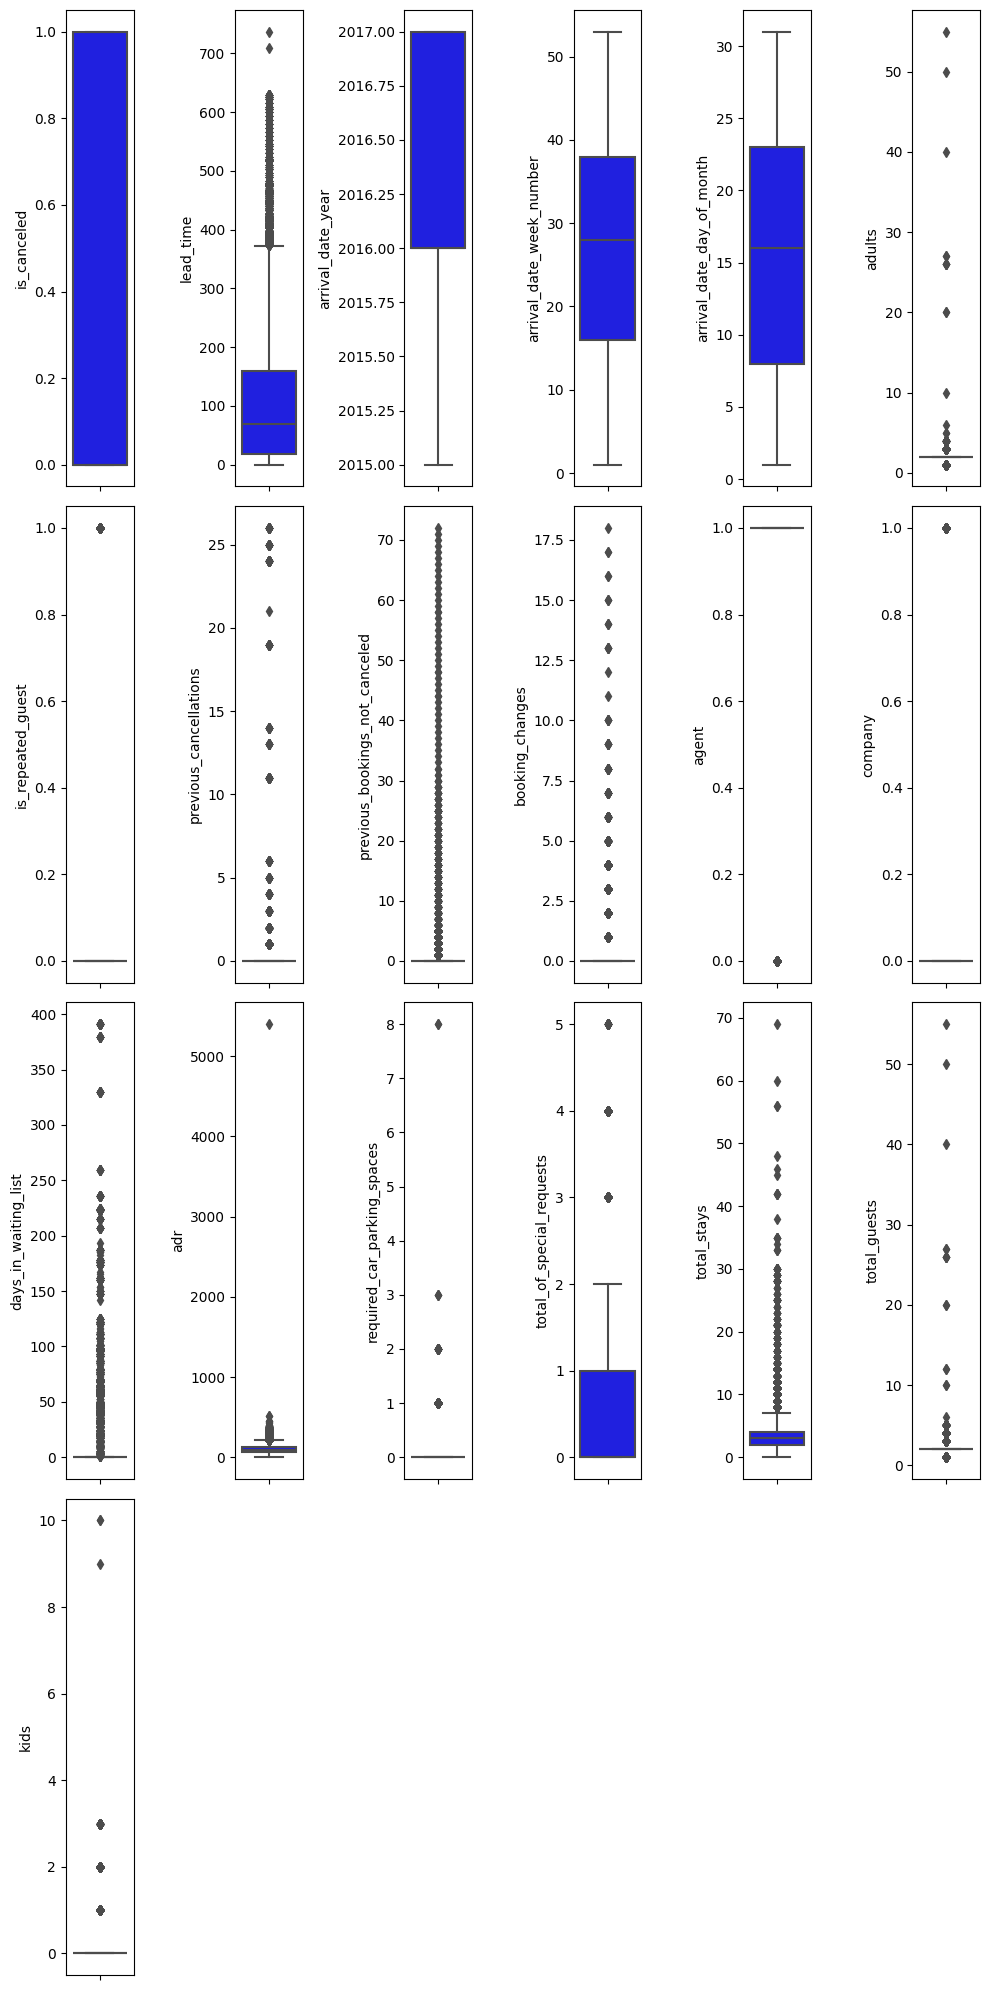

In [43]:
plt.figure(figsize=(10, 20))
for i in range(0, len(numerical_columns)):
    plt.subplot(4, int(len(numerical_columns)/3), i+1)
    sns.boxplot(y=df_clean[numerical_columns[i]], color='blue', orient='v')
    plt.tight_layout()

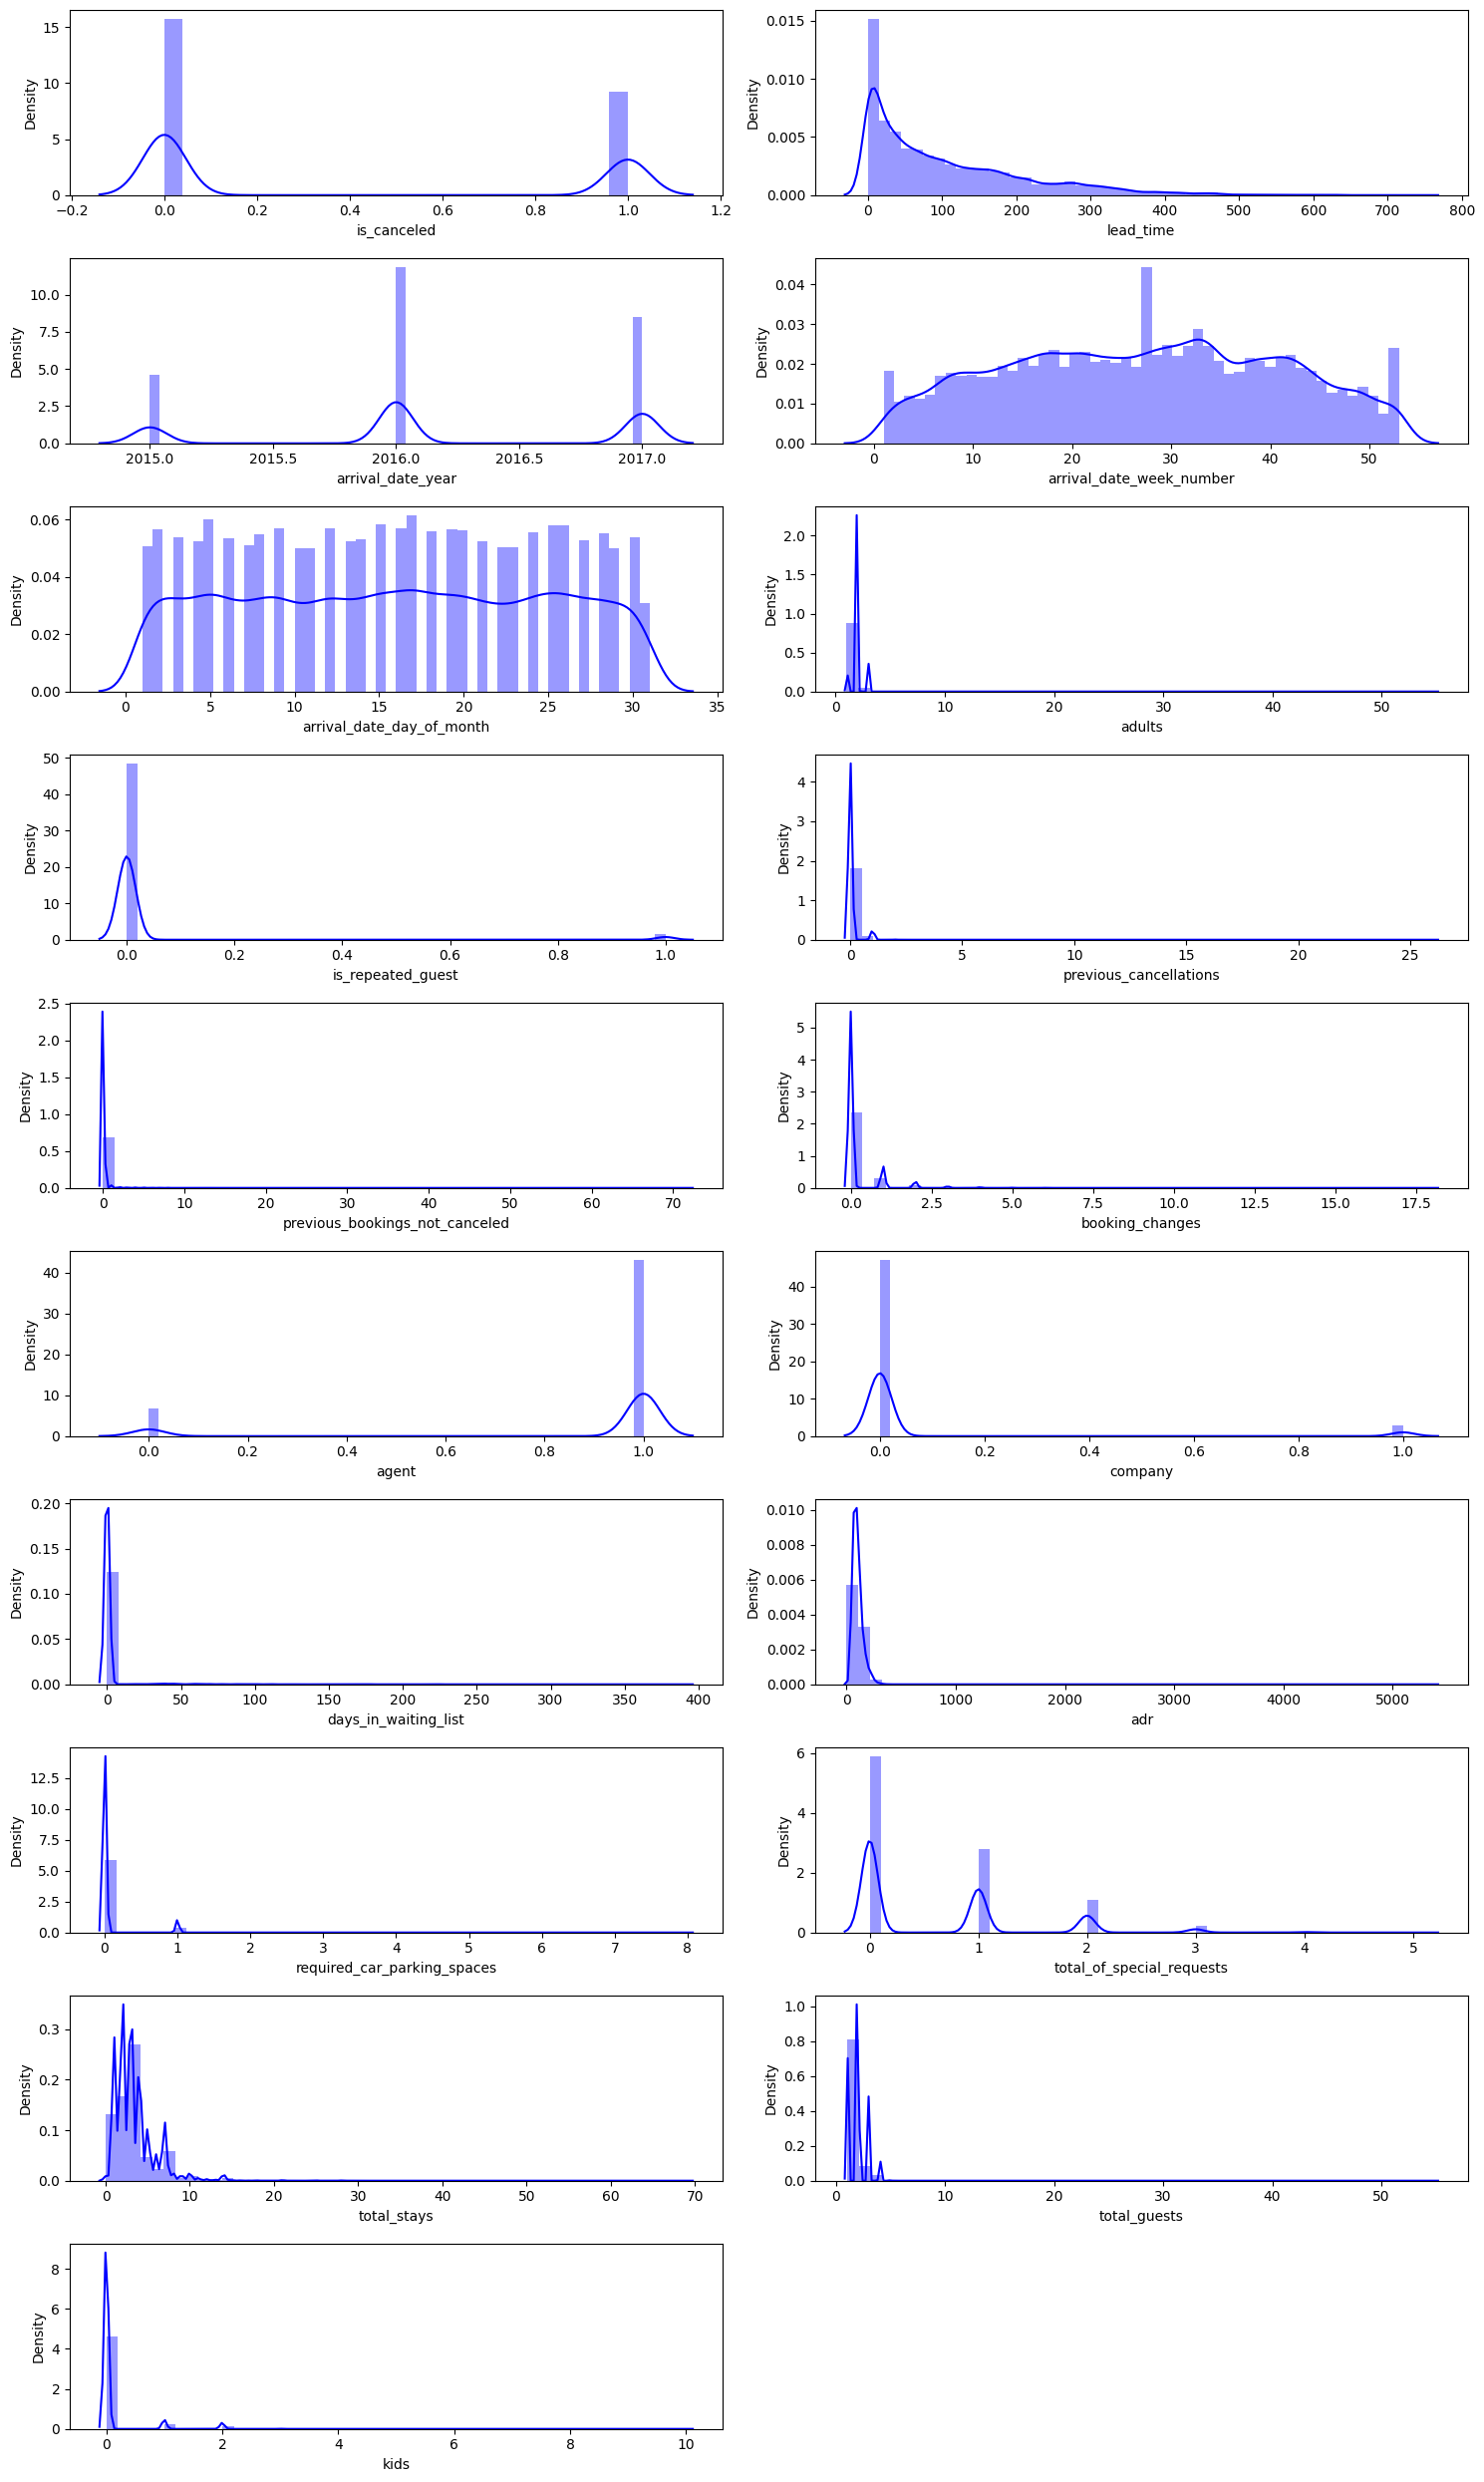

In [44]:

cols = max(int(len(numerical_columns)/9), 1)
plt.figure(figsize=(15, 25))
for i in range(0, len(numerical_columns)):
    plt.subplot(10, cols, i+1)
    sns.distplot(df_clean[numerical_columns[i]], color='blue')
    plt.tight_layout()

ValueError: Could not interpret input 'guest_location'

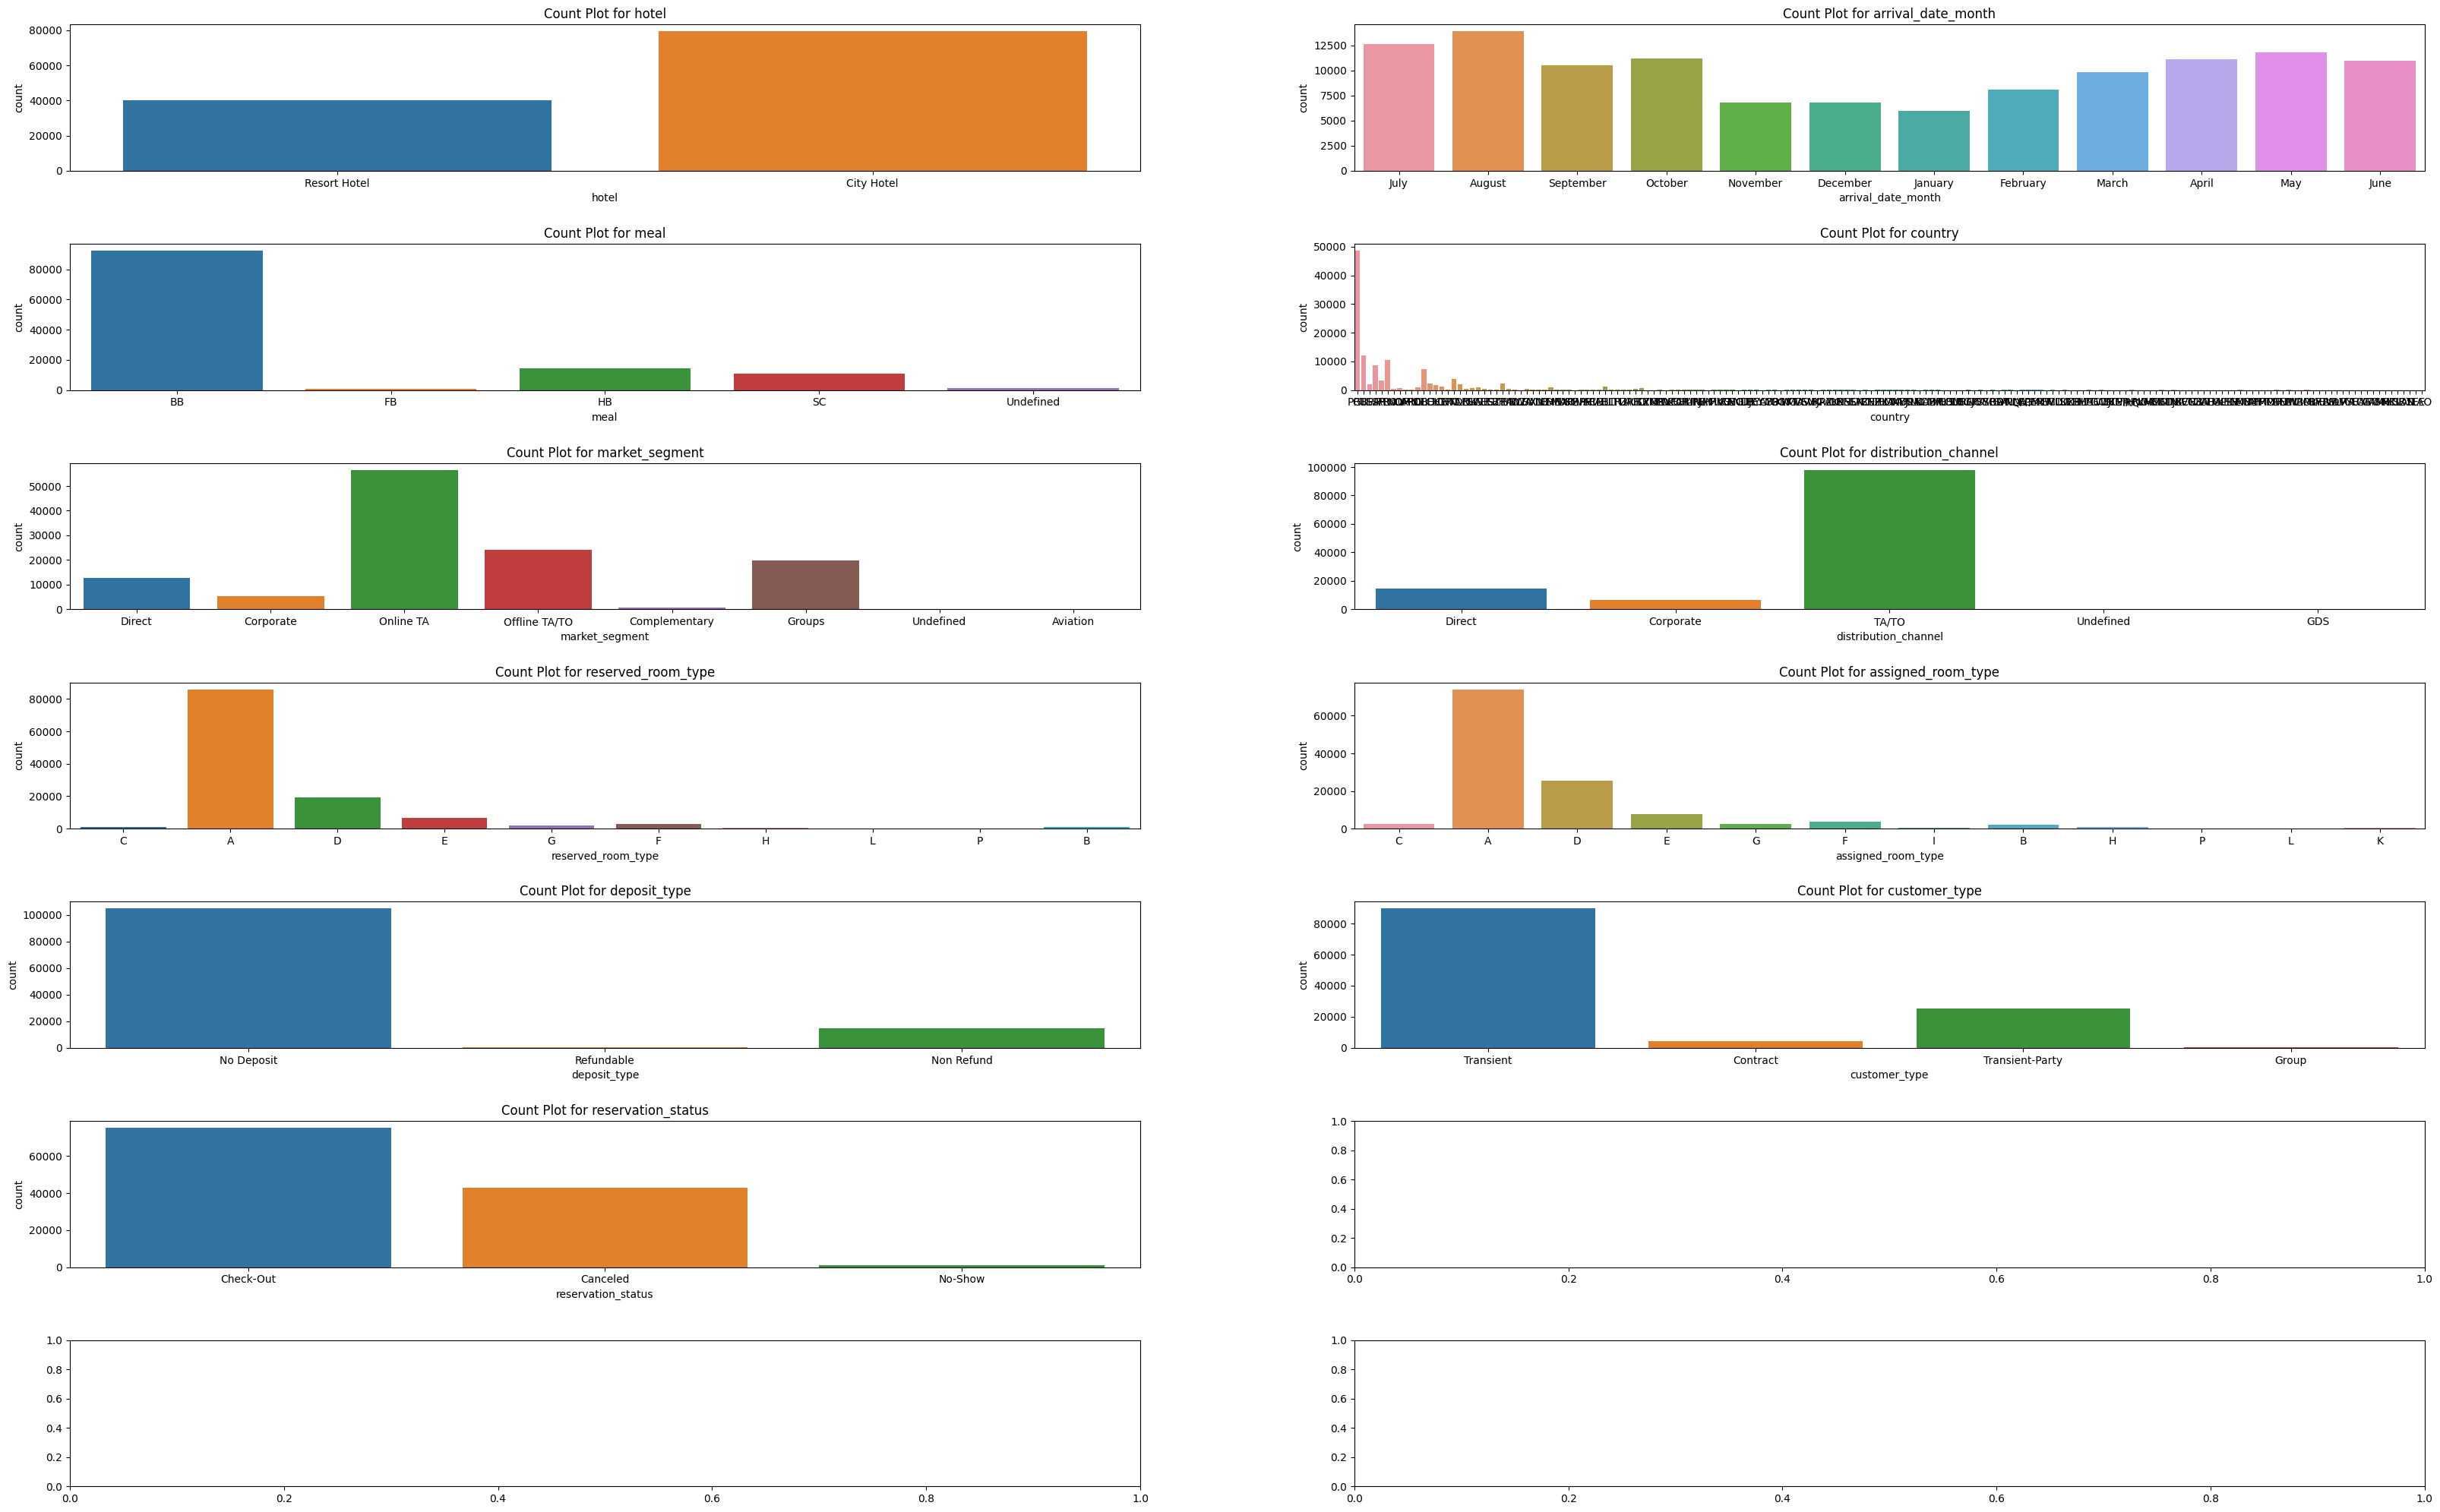

In [45]:
# Set up the figure with subplots
fig, axes = plt.subplots(7, len(categorical_columns)//6, figsize=(40, 25))
fig.subplots_adjust(hspace=0.5)

# Loop through the categorical columns and create count plots
for i, col in enumerate(categorical_columns):
    row, col_position = divmod(i, len(categorical_columns)//6)
    sns.countplot(data=df, x=col, ax=axes[row, col_position])
    axes[row, col_position].set_title(f'Count Plot for {col}')

plt.tight_layout()
plt.show()


In [46]:
pip install dython --no-cache-dir

  Obtaining dependency information for psutil>=5.9.1 from https://files.pythonhosted.org/packages/c5/b2/699c50fe0b0402a1ccb64ad71313bcb740e735008dd3ab9abeddbe148e45/psutil-5.9.6-cp37-abi3-win_amd64.whl.metadata
   ---------------------------------------- 0.0/252.3 kB ? eta -:--:--
   ----------------- ---------------------- 112.6/252.3 kB 3.3 MB/s eta 0:00:01
   ------------------------------------- -- 235.5/252.3 kB 2.9 MB/s eta 0:00:01
   ---------------------------------------- 252.3/252.3 kB 2.6 MB/s eta 0:00:00
  Attempting uninstall: psutil
    Found existing installation: psutil 5.9.0
    Uninstalling psutil-5.9.0:
      Successfully uninstalled psutil-5.9.0
Note: you may need to restart the kernel to use updated packages.


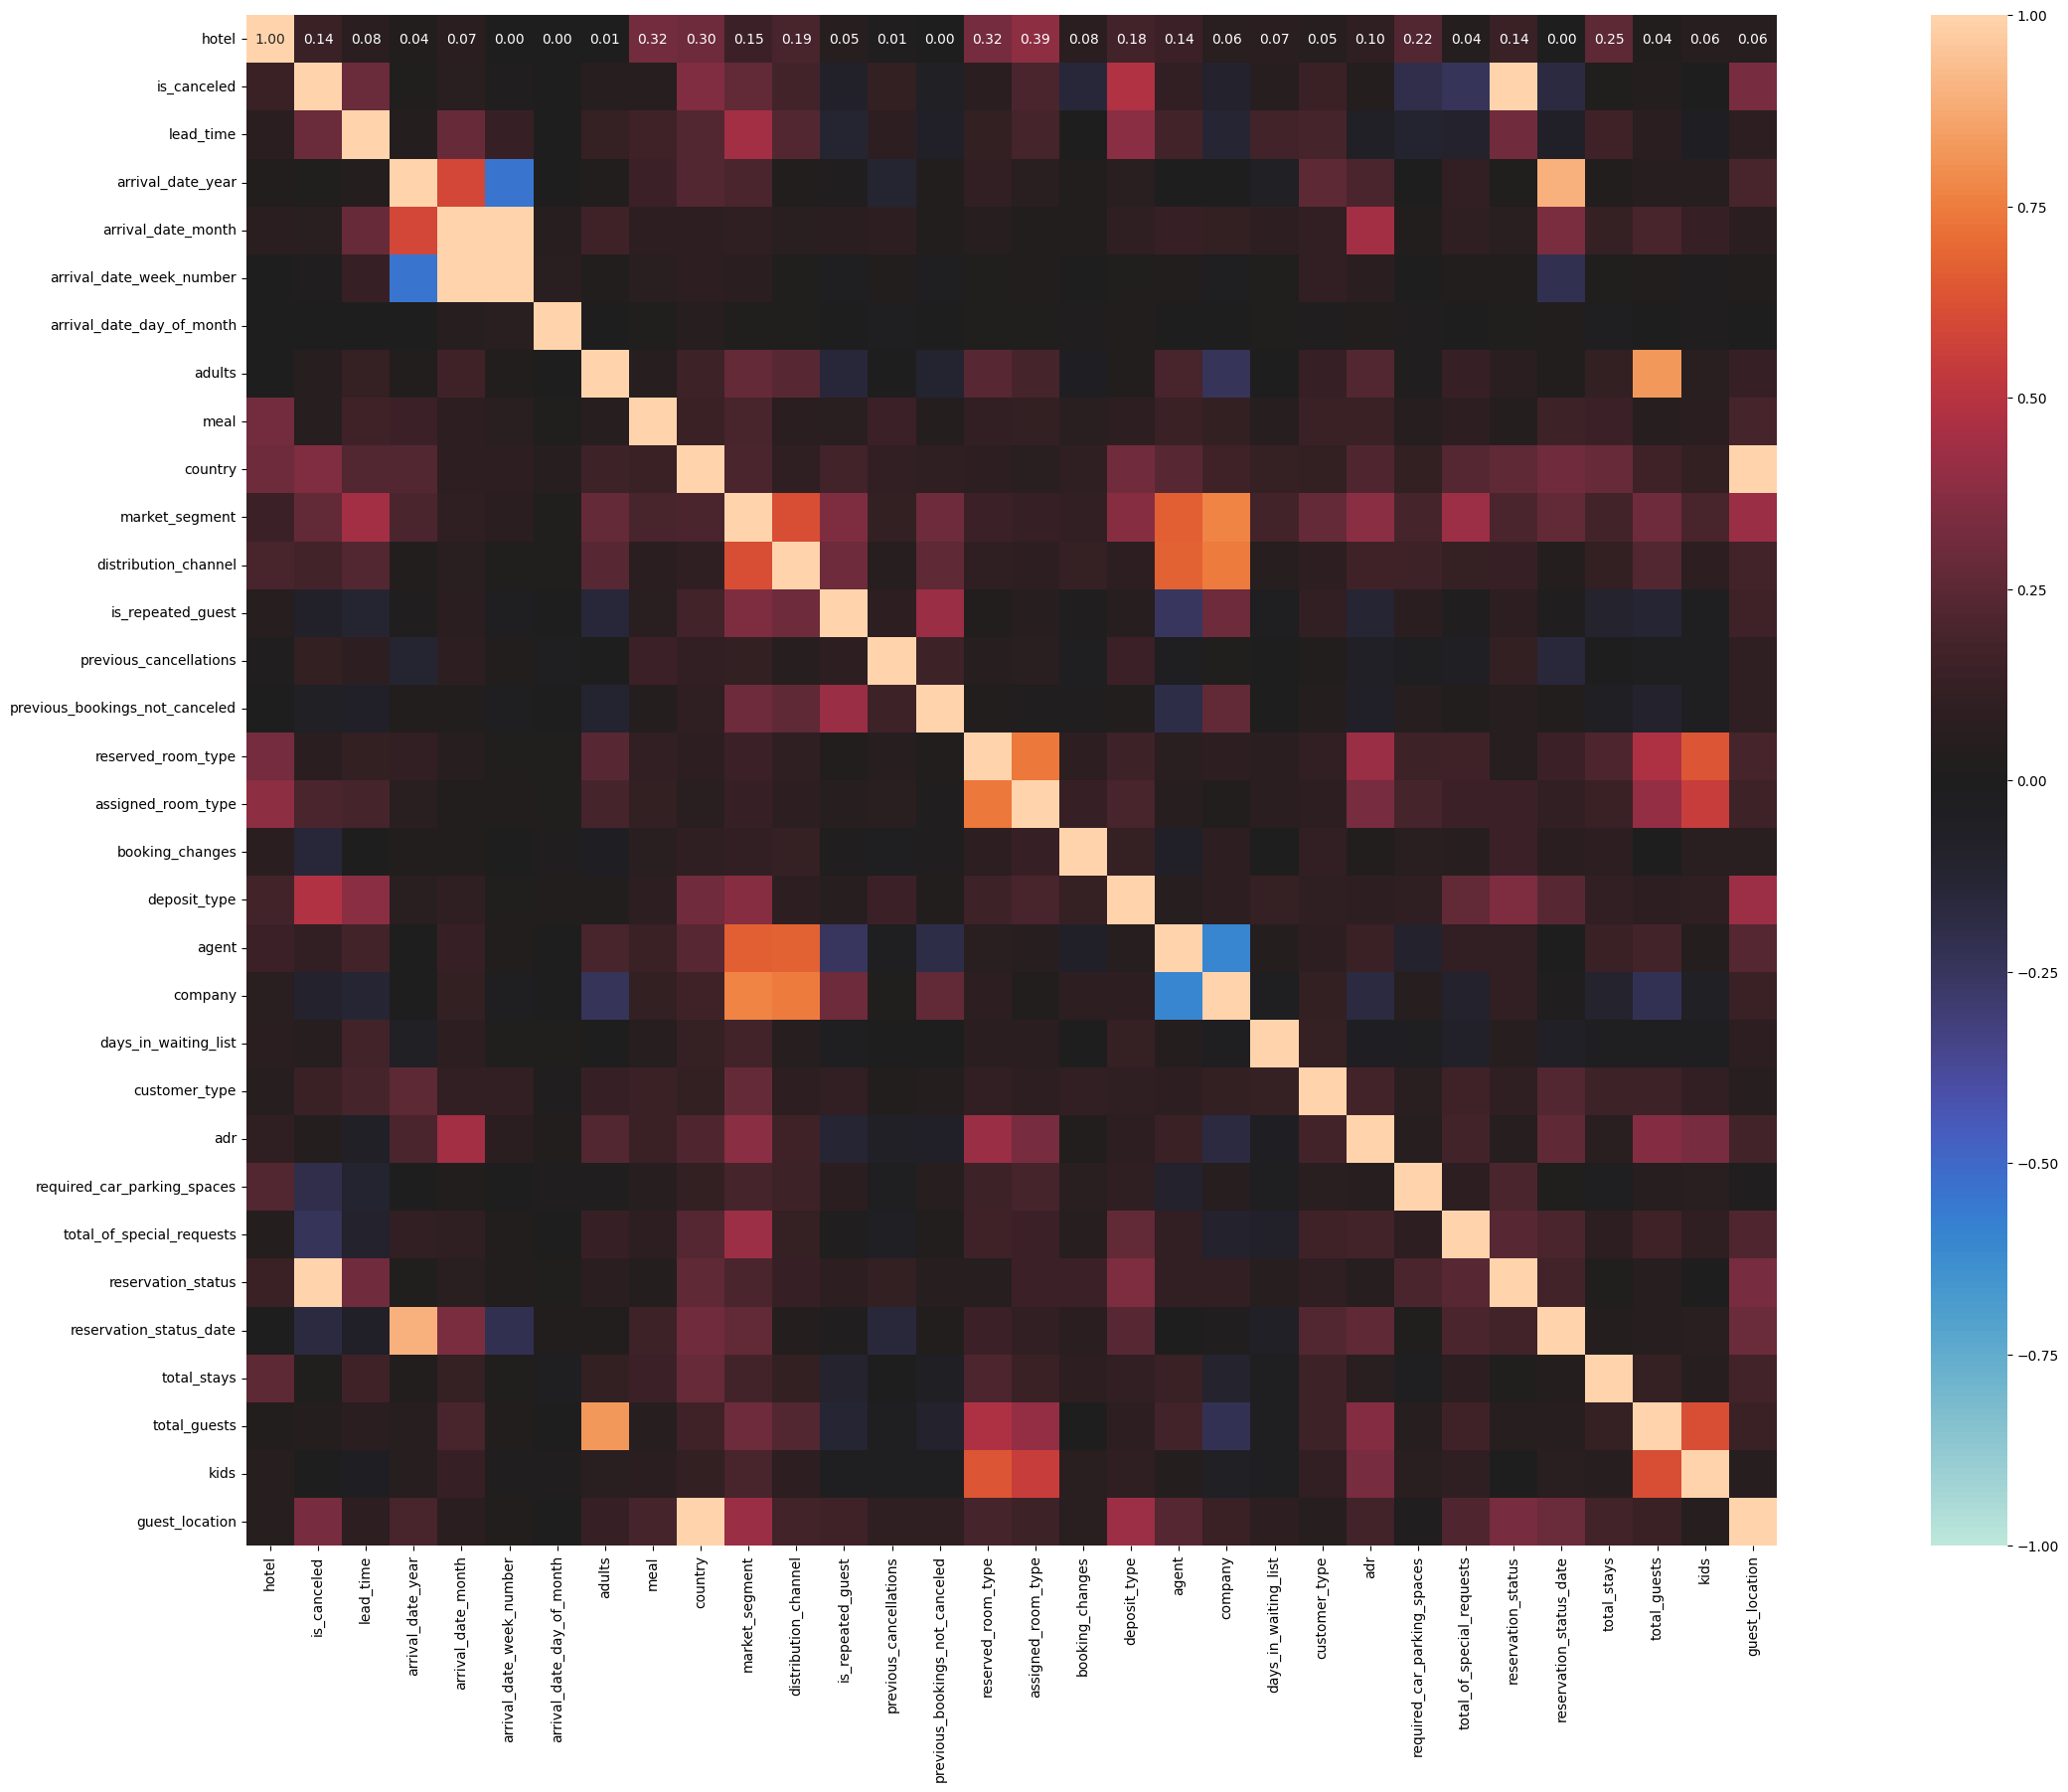

In [48]:
from dython.nominal import associations

associations(df_clean, figsize = (40, 20))
plt.show()

<Figure size 4000x2000 with 0 Axes>

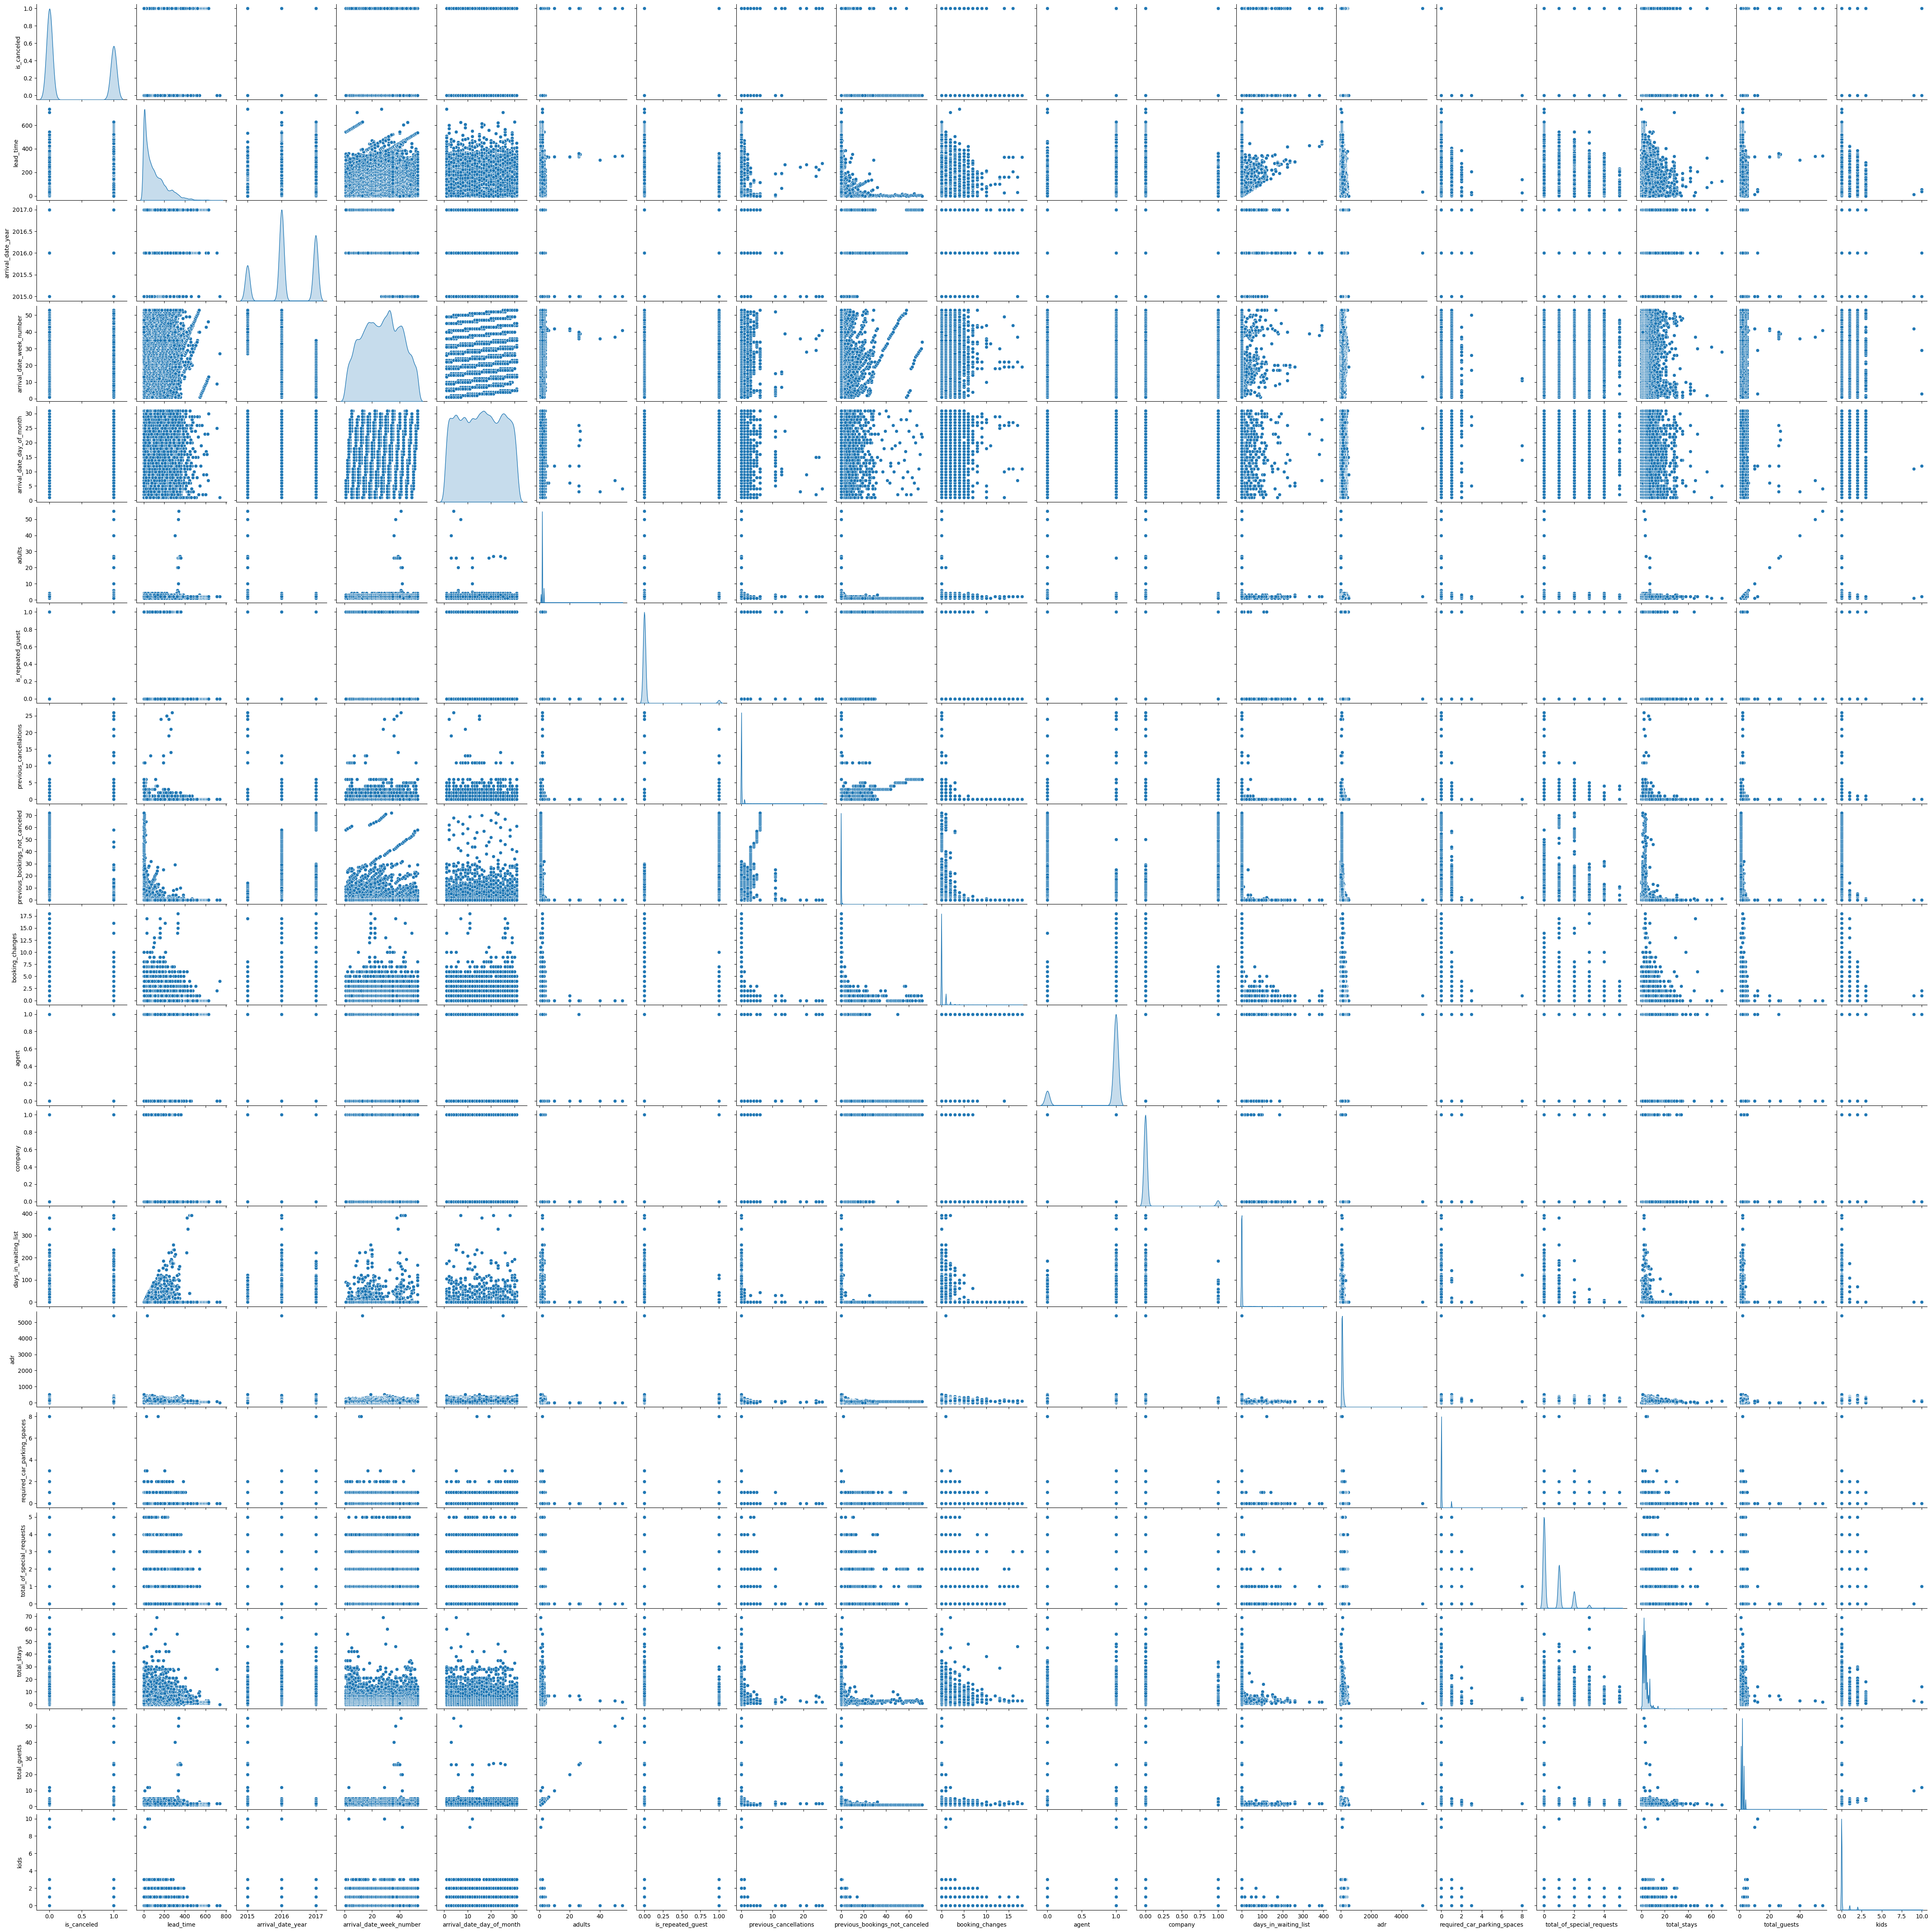

In [49]:
plt.figure(figsize=(40, 20))
sns.pairplot(df_clean[numerical_columns], diag_kind='kde')
plt.show()

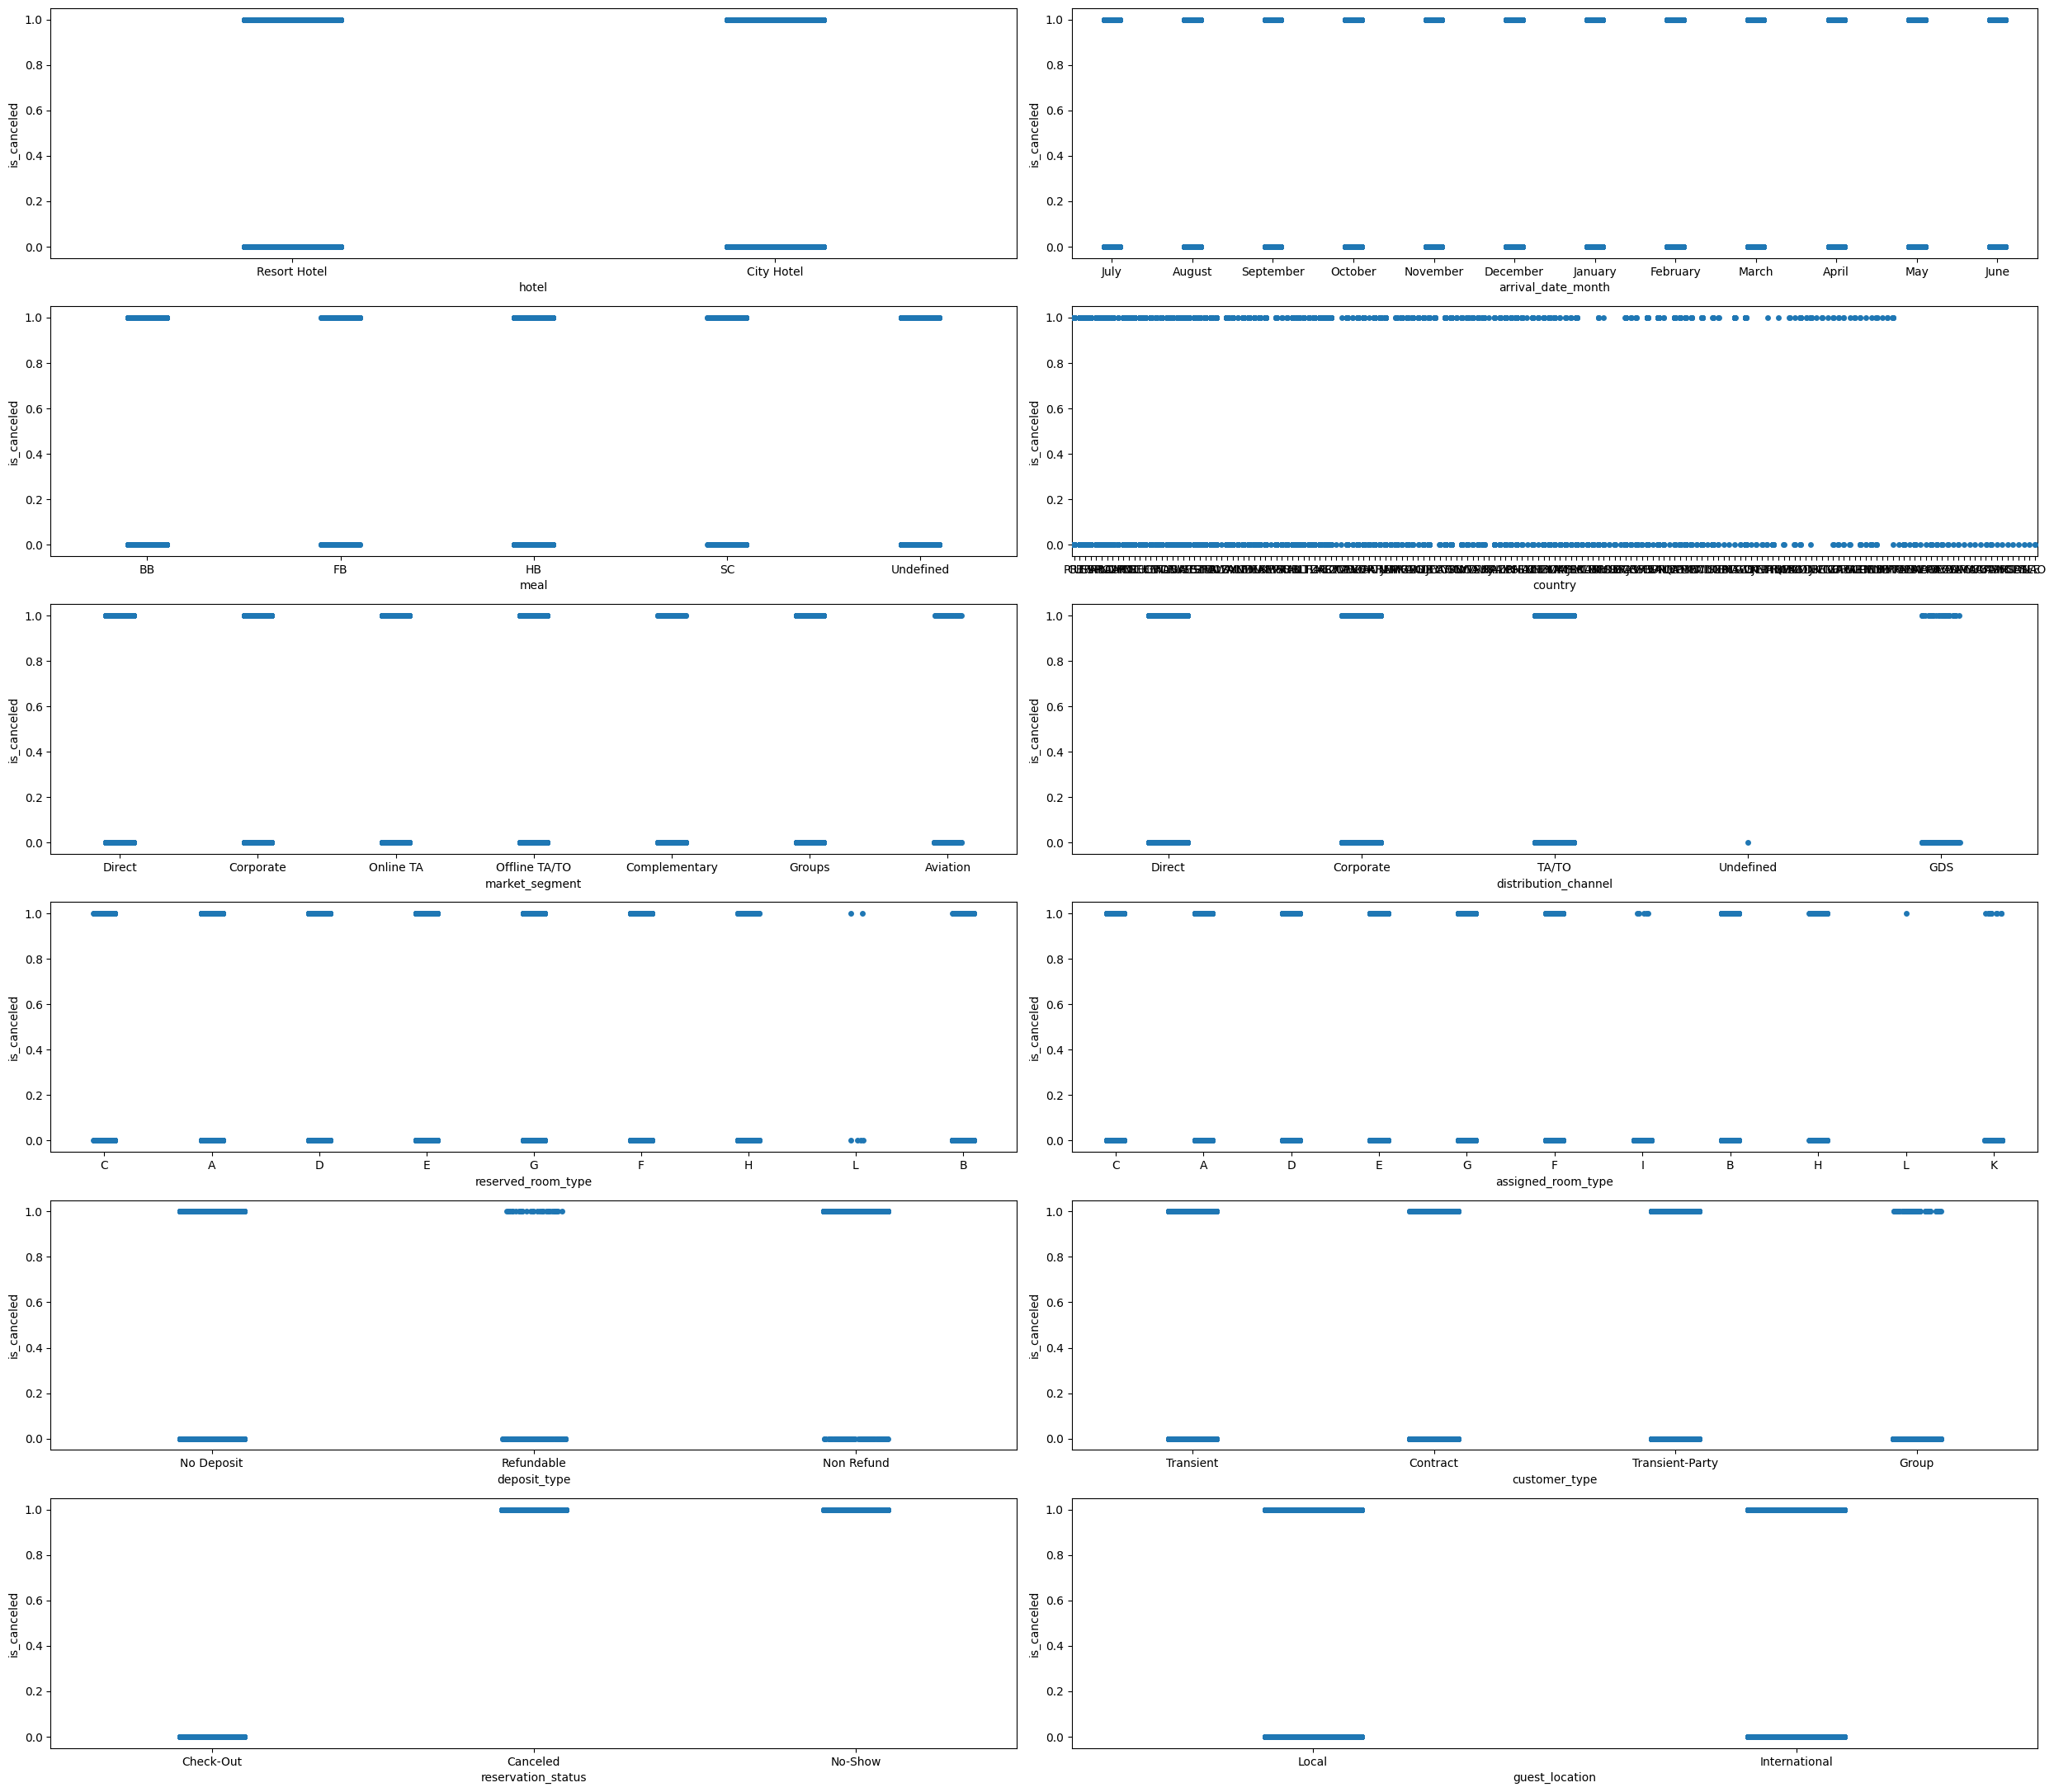

In [50]:
fig = plt.figure(figsize=(25, 25))
for i in range(0, len(categorical_columns)): 
    ax = fig.add_subplot(7, int(len(categorical_columns)/6), i+1) 
    sns.stripplot(ax=ax, data=df_clean, x=categorical_columns[i], y='is_canceled') 
    plt.tight_layout()

In [51]:
#Data Preprosessing 
#Removing Outiers
#Remove outlier in adr with value > 5000                                                                                   ===
df_clean.drop(df_clean[df_clean['adr'] > 5000].index, inplace = True)

In [52]:
#Reformatting Feauture
#0 indicates no previous cancellation
#1 indicated previous cancellation
df_clean['previous_cancellations'] = df_clean['previous_cancellations'].apply(lambda x: 0 if x == 0 else 1)
df_clean['previous_cancellations'].value_counts()

previous_cancellations
0    112504
1      6477
Name: count, dtype: int64

In [53]:
#changing values for booking changes as well
df_clean['booking_changes'] = df_clean['booking_changes'].apply(lambda x: 0 if x == 0 else 1)
df_clean['booking_changes'].value_counts()

booking_changes
0    101062
1     17919
Name: count, dtype: int64

In [54]:
#Normalization of the data
from sklearn.preprocessing import MinMaxScaler

df_clean['lead_time_norm'] = MinMaxScaler().fit_transform(df_clean['lead_time'].values.reshape(len(df_clean), 1))
df_clean['adr_norm'] = MinMaxScaler().fit_transform(df_clean['adr'].values.reshape(len(df_clean), 1))
df_clean['required_car_parking_spaces_norm'] = MinMaxScaler().fit_transform(df_clean['required_car_parking_spaces'].values.reshape(len(df_clean), 1))
df_clean['total_of_special_requests_norm'] = MinMaxScaler().fit_transform(df_clean['total_of_special_requests'].values.reshape(len(df_clean), 1))
df_clean['total_stays_norm'] = MinMaxScaler().fit_transform(df_clean['total_stays'].values.reshape(len(df_clean), 1))
df_clean['total_guests_norm'] = MinMaxScaler().fit_transform(df_clean['total_guests'].values.reshape(len(df_clean), 1))

In [55]:
#Feature Encoding
encode_cat = ['hotel',
 'meal',
 'market_segment',
 'distribution_channel',
 'deposit_type',
 'customer_type',
 'guest_location']


In [56]:
for cat in encode_cat:
    onehots = pd.get_dummies(df_clean[cat], prefix=cat)
    df_clean = df_clean.join(onehots)

In [57]:
df_clean.columns = df_clean.columns.str.replace(' ', '')

In [58]:
df_clean.columns = df_clean.columns.str.replace('/', '')

In [59]:
df_clean

hotel  is_canceled  lead_time  arrival_date_year  \
0       Resort Hotel            0        342               2015   
1       Resort Hotel            0        737               2015   
2       Resort Hotel            0          7               2015   
3       Resort Hotel            0         13               2015   
4       Resort Hotel            0         14               2015   
...              ...          ...        ...                ...   
119385    City Hotel            0         23               2017   
119386    City Hotel            0        102               2017   
119387    City Hotel            0         34               2017   
119388    City Hotel            0        109               2017   
119389    City Hotel            0        205               2017   

       arrival_date_month  arrival_date_week_number  \
0                    July                        27   
1                    July                        27   
2                    July                        27   
3                    July                        27   
4                    July                        27   
...                   ...                       ...   
119385             August                        35   
119386             August                        35   
119387             August                        35   
119388             August                        35   
119389             August                        35   

        arrival_date_day_of_month  adults meal country  ...  \
0                               1       2   BB     PRT  ...   
1                               1       2   BB     PRT  ...   
2                               1       1   BB     GBR  ...   
3                               1       1   BB     GBR  ...   
4                               1       2   BB     GBR  ...   
...                           ...     ...  ...     ...  ...   
119385                         30       2   BB     BEL  ...   
119386                         31       3   BB     FRA  ...   
119387                         31       2   BB     DEU  ...   
119388                         31       2   BB     GBR  ...   
119389                         29       2   HB     DEU  ...   

       distribution_channel_Undefined deposit_type_NoDeposit  \
0                               False                   True   
1                               False                   True   
2                               False                   True   
3                               False                   True   
4                               False                   True   
...                               ...                    ...   
119385                          False                   True   
119386                          False                   True   
119387                          False                   True   
119388                          False                   True   
119389                          False                   True   

        deposit_type_NonRefund  deposit_type_Refundable  \
0                        False                    False   
1                        False                    False   
2                        False                    False   
3                        False                    False   
4                        False                    False   
...                        ...                      ...   
119385                   False                    False   
119386                   False                    False   
119387                   False                    False   
119388                   False                    False   
119389                   False                    False   

        customer_type_Contract customer_type_Group customer_type_Transient  \
0                        False               False                    True   
1                        False               False                    True   
2                        False               False                    True   
3 

In [60]:
#Class Imbalance
df_clean['is_canceled'].value_counts()

is_canceled
0    74871
1    44110
Name: count, dtype: int64

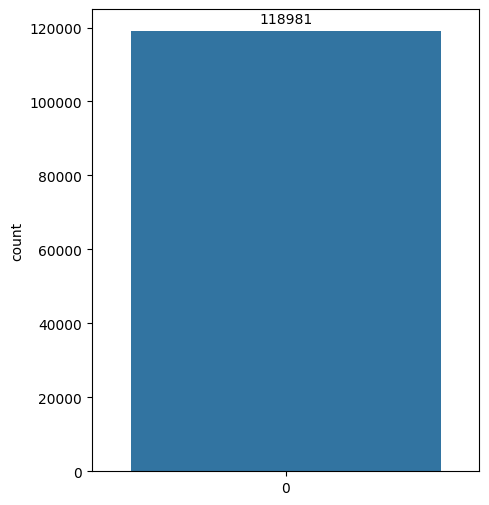

In [61]:
plt.figure(figsize=(5, 6))
cancel_ax = sns.countplot(df_clean['is_canceled'])

for p in cancel_ax.patches:
    cancel_ax.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height
()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

plt.show()

In [62]:
df_clean.columns = df_clean.columns.str.replace('/', '')

In [63]:
df_clean

hotel  is_canceled  lead_time  arrival_date_year  \
0       Resort Hotel            0        342               2015   
1       Resort Hotel            0        737               2015   
2       Resort Hotel            0          7               2015   
3       Resort Hotel            0         13               2015   
4       Resort Hotel            0         14               2015   
...              ...          ...        ...                ...   
119385    City Hotel            0         23               2017   
119386    City Hotel            0        102               2017   
119387    City Hotel            0         34               2017   
119388    City Hotel            0        109               2017   
119389    City Hotel            0        205               2017   

       arrival_date_month  arrival_date_week_number  \
0                    July                        27   
1                    July                        27   
2                    July                        27   
3                    July                        27   
4                    July                        27   
...                   ...                       ...   
119385             August                        35   
119386             August                        35   
119387             August                        35   
119388             August                        35   
119389             August                        35   

        arrival_date_day_of_month  adults meal country  ...  \
0                               1       2   BB     PRT  ...   
1                               1       2   BB     PRT  ...   
2                               1       1   BB     GBR  ...   
3                               1       1   BB     GBR  ...   
4                               1       2   BB     GBR  ...   
...                           ...     ...  ...     ...  ...   
119385                         30       2   BB     BEL  ...   
119386                         31       3   BB     FRA  ...   
119387                         31       2   BB     DEU  ...   
119388                         31       2   BB     GBR  ...   
119389                         29       2   HB     DEU  ...   

       distribution_channel_Undefined deposit_type_NoDeposit  \
0                               False                   True   
1                               False                   True   
2                               False                   True   
3                               False                   True   
4                               False                   True   
...                               ...                    ...   
119385                          False                   True   
119386                          False                   True   
119387                          False                   True   
119388                          False                   True   
119389                          False                   True   

        deposit_type_NonRefund  deposit_type_Refundable  \
0                        False                    False   
1                        False                    False   
2                        False                    False   
3                        False                    False   
4                        False                    False   
...                        ...                      ...   
119385                   False                    False   
119386                   False                    False   
119387                   False                    False   
119388                   False                    False   
119389                   False                    False   

        customer_type_Contract customer_type_Group customer_type_Transient  \
0                        False               False                    True   
1                        False               False                    True   
2                        False               False                    True   
3 

In [64]:
df_clean['is_canceled'].value_counts()

is_canceled
0    74871
1    44110
Name: count, dtype: int64

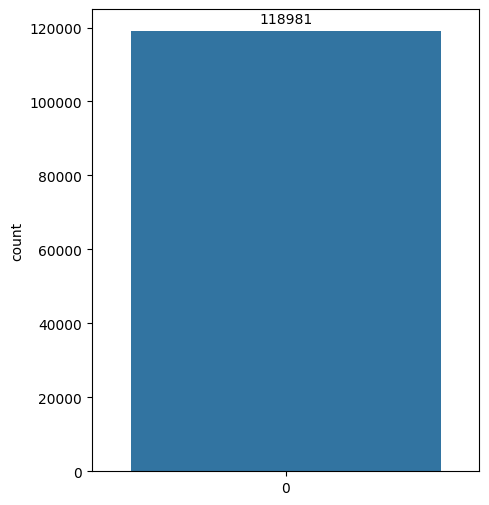

In [65]:
plt.figure(figsize=(5, 6))
cancel_ax = sns.countplot(df_clean['is_canceled'])

for p in cancel_ax.patches:
    cancel_ax.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

plt.show()

In [66]:
df_insight = df_clean.copy()

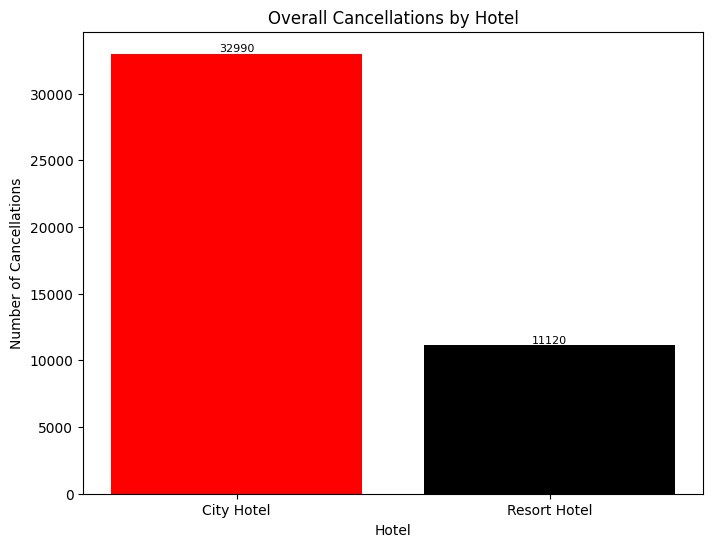

In [92]:
#TOTAL Cancellations
data = {
    'hotel': ['Resort Hotel', 'Resort Hotel', 'City Hotel', 'City Hotel'],
    'is_canceled': [0, 1, 0, 1],
}

df_insight = df_clean.copy()

# Filter data for canceled bookings
canceled_bookings = df_insight[df_insight['is_canceled'] == 1]

# Group by hotel and count cancellations
cancellations_by_hotel = canceled_bookings.groupby('hotel')['is_canceled'].count()

# Plotting the bar graph
plt.figure(figsize=(8, 6))
bars = plt.bar(cancellations_by_hotel.index, cancellations_by_hotel.values, color=['Red', 'Black'])

# Adding numbers on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.1, round(yval, 1), ha='center', va='bottom', fontsize=8)

# Adding labels and title
plt.xlabel('Hotel')
plt.ylabel('Number of Cancellations')
plt.title('Overall Cancellations by Hotel')

# Display the plot
plt.show()

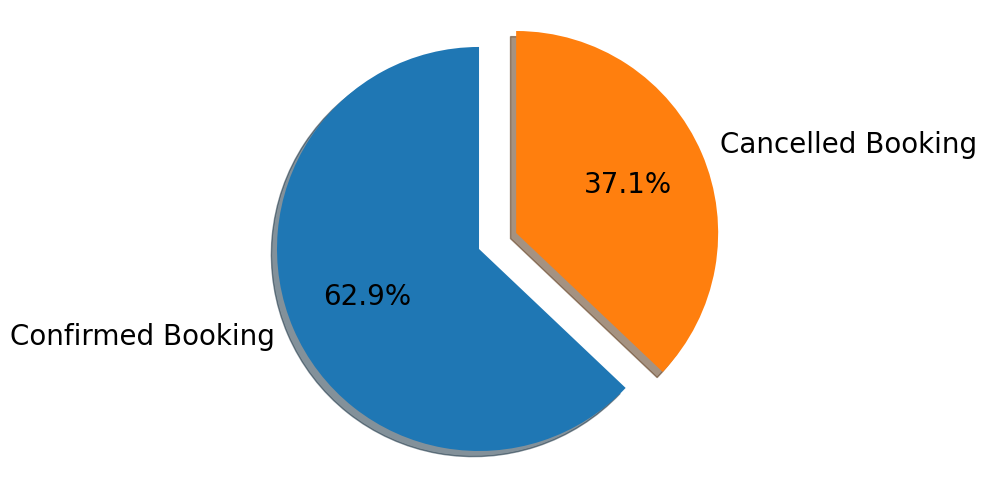

In [93]:
labels = ['Confirmed Booking',  'Cancelled Booking']
myexplode = [0.2, 0]
cancel_fig, cancel_ax = plt.subplots(figsize=[10,6])
cancel_ax.pie(df_insight['is_canceled'].value_counts(), autopct='%1.1f%%',
        shadow=True, startangle=90, explode = myexplode, textprops={'color':"black", 'fontsize':20}, labels=labels)
cancel_ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

#The proportion between classes looks balanced (63% : 37%)

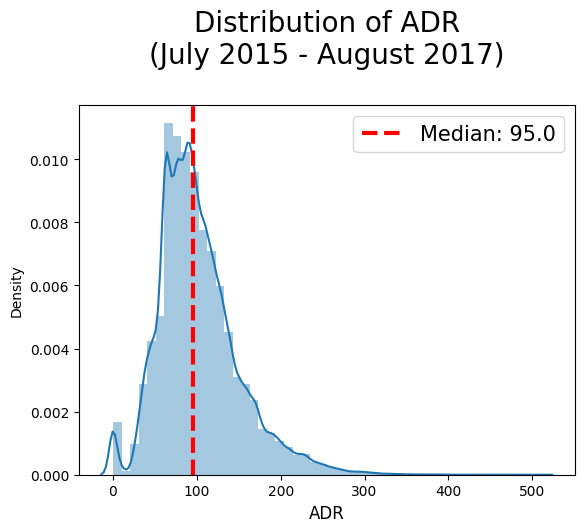

In [94]:
adr_median = df_insight['adr'].median()
sns.distplot(df_insight['adr'])
plt.title('Distribution of ADR\n(July 2015 - August 2017)', fontsize=20, pad=30)
plt.axvline(adr_median, color='red', linestyle='dashed', linewidth=3, label='Median: ' + str(round(adr_median, 2))) 
plt.xlabel('ADR', fontsize=12)
plt.legend(fontsize=15)
plt.show()

In [95]:
df_insight['arrival_date'] = df_insight['arrival_date_year'].astype(str) + "-" + df_insight['arrival_date_month'].map({'January':1, 'February':2, 'March':3, 'April':4, 'May':5, 'June':6, 'July':7, 'August':8, 'September':9, 'October':10, 'November':11, 'December':12}).astype(str) + "-" + df_insight['arrival_date_day_of_month'].astype(str)

In [96]:
df_insight['arrival_date'] = pd.to_datetime(df_insight['arrival_date'], format="%Y-%m-%d")
df_insight['reservation_status_date'] = pd.to_datetime(df_insight['reservation_status_date'], format="%Y-%m-%d")

In [97]:
df_insight['cancel_or_stay_length'] = abs((df_insight['arrival_date'] - df_insight['reservation_status_date']).dt.days)


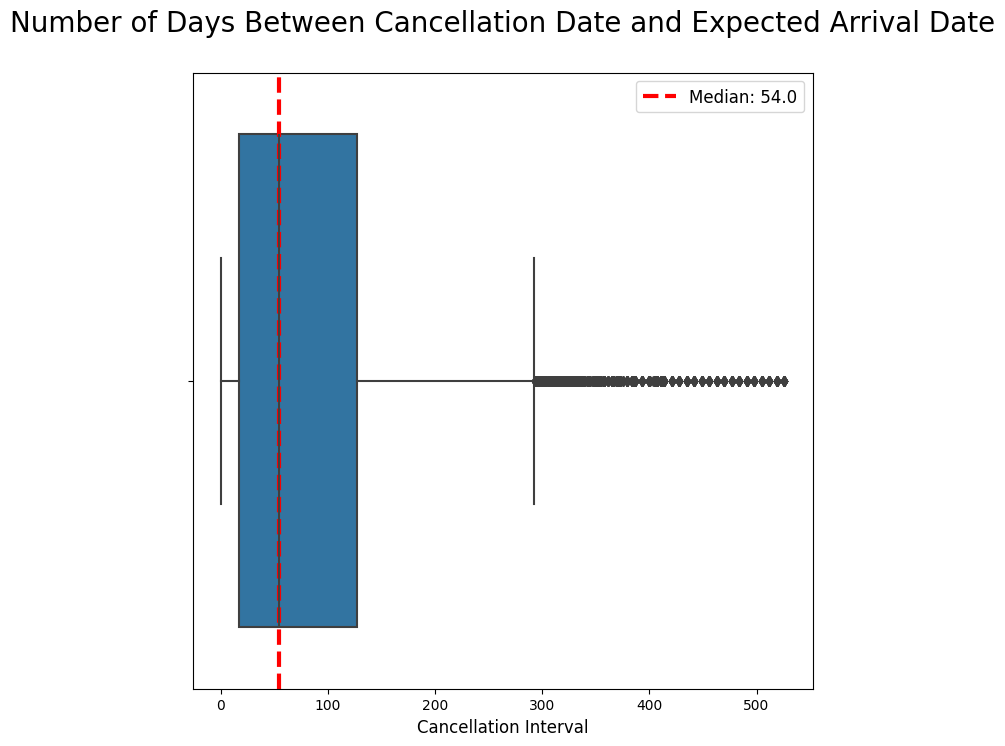

In [98]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the median for canceled instances
cancel_median = df_insight['cancel_or_stay_length'][df_insight['is_canceled'] == 1].median()

# Create a boxplot
plt.figure(figsize=(8, 8))
sns.boxplot(x=df_insight['cancel_or_stay_length'][df_insight['is_canceled'] == 1])

# Add a vertical line for the median
plt.axvline(cancel_median, color='red', linestyle='dashed', linewidth=3, label='Median: ' + str(round(cancel_median, 2)))

# Set labels and title
plt.xlabel('Cancellation Interval', fontsize=12)
plt.title('Number of Days Between Cancellation Date and Expected Arrival Date', fontsize=20, pad=30)

# Add legend
plt.legend(fontsize=12)

# Show the plot
plt.show()
#EDITED


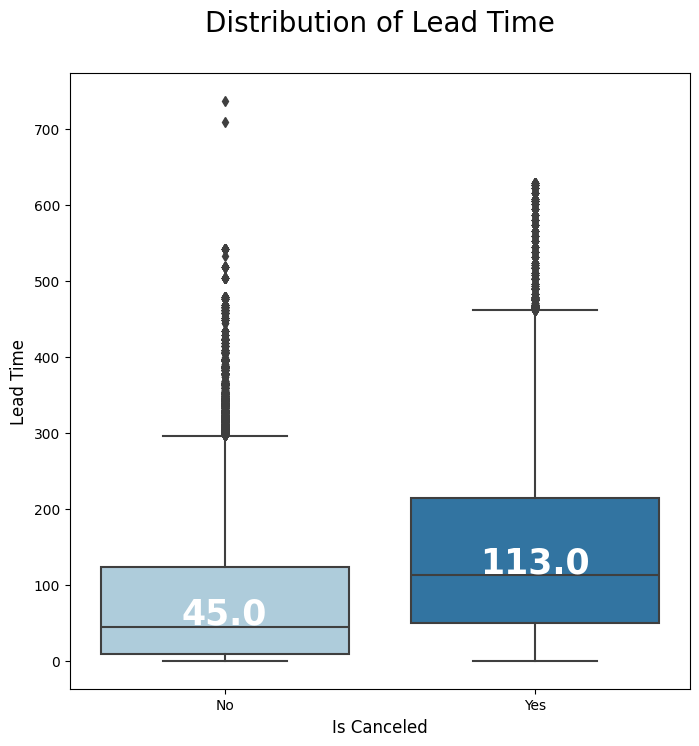

In [99]:
plt.figure(figsize=(8, 8))
lead_time_ax = sns.boxplot(x='is_canceled', y='lead_time', data=df_insight, palette='Paired')
lead_time_ax.set_xticklabels(['No', 'Yes'])
plt.ylabel('Lead Time', fontsize=12)
plt.xlabel('Is Canceled', fontsize=12)
plt.title('Distribution of Lead Time', fontsize=20, pad=30)
medians = df_insight.groupby(['is_canceled'])['lead_time'].median()
vertical_offset = df_insight['lead_time'].median() * 0.05
for xtick in lead_time_ax.get_xticks():
    lead_time_ax.text(xtick,medians[xtick] + vertical_offset,medians[xtick], 
            horizontalalignment='center',fontsize=25,color='w',weight='semibold')

plt.show()


In [100]:
df_lead_time = df_insight.copy()
df_lead_time['lead_time_month'] = df_lead_time['lead_time'] // 30
df_lead_time = df_lead_time.groupby(['lead_time_month','is_canceled']).agg({'hotel':'count'}).reset_index()
df_lead_time = df_lead_time.rename(columns={'hotel':'total'})
df_lead_time['total_guests'] = df_lead_time.groupby(['lead_time_month'])['total'].transform('sum')

TypeError: annotate() missing 1 required positional argument: 'text'

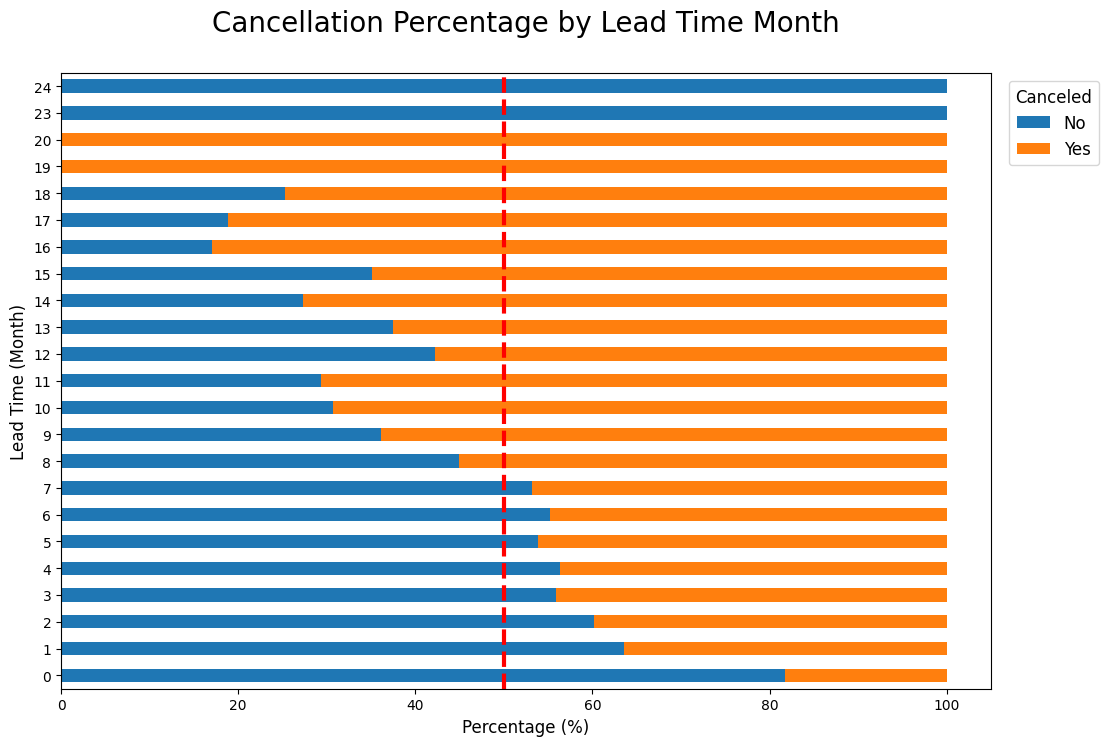

In [101]:
df_lead_time_plot = df_lead_time.copy()
df_lead_time_plot['cancel_percentage'] = (df_lead_time_plot['total'] / df_lead_time_plot['total_guests']) * 100
df_lead_time_plot = df_lead_time_plot.sort_values('cancel_percentage', ascending=False)

df_lead_time_plot = df_lead_time_plot.pivot_table(index='lead_time_month', columns='is_canceled', values='cancel_percentage')

lead_time_ax = df_lead_time_plot.plot(kind='barh', stacked=True, figsize=(12,8))
plt.legend(bbox_to_anchor=(1.01, 1), title='Canceled', fontsize=12, title_fontsize=12, labels=['No','Yes'])
plt.title('Cancellation Percentage by Lead Time Month', fontsize=20, pad=30)
plt.xlabel('Percentage (%)', fontsize=12)
plt.ylabel('Lead Time (Month)', fontsize=12)
plt.axvline(50, color='red', linestyle='dashed', linewidth=3, label='50%')
plt.annotate(s='',xy=(100,8), xytext=(110,8), arrowprops=dict(arrowstyle='<-', color='black'))
plt.text(110, 7, 'Cancellation Ratio > 50%\nFor Lead Times\nStarting From 8 Months', horizontalalignment='left', size='medium', color='black')
lead_time_ax.set_xticks([50])
plt.show()

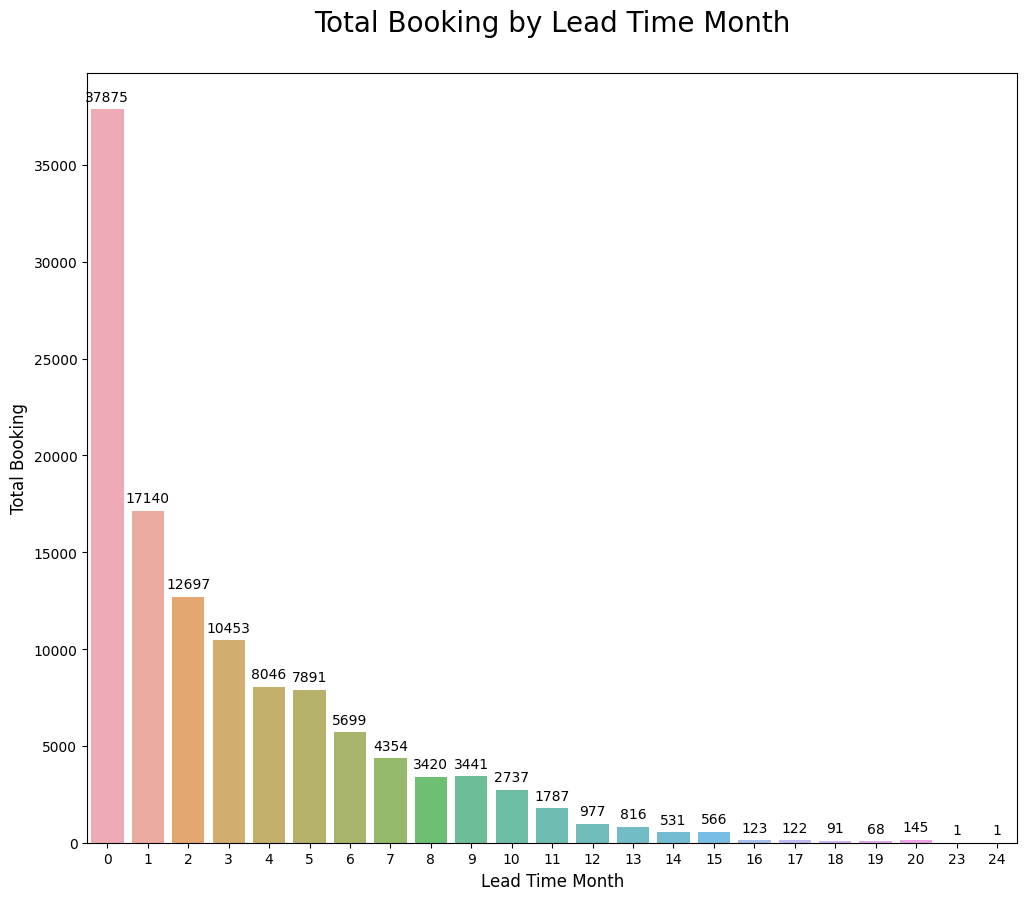

In [76]:
df_lead_time_pop = df_lead_time.copy()
df_lead_time_pop = df_lead_time_pop.drop_duplicates('lead_time_month', keep='first')
plt.figure(figsize=(12, 10))
lead_time_pop_ax = sns.barplot(x=df_lead_time_pop['lead_time_month'], y=df_lead_time_pop['total_guests'], alpha=0.8)
for p in lead_time_pop_ax.patches:
    lead_time_pop_ax.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points', fontsize=10)
plt.xlabel('Lead Time Month', fontsize=12)
plt.ylabel('Total Booking', fontsize=12)
plt.title('Total Booking by Lead Time Month', fontsize=20, pad=30)
plt.show()

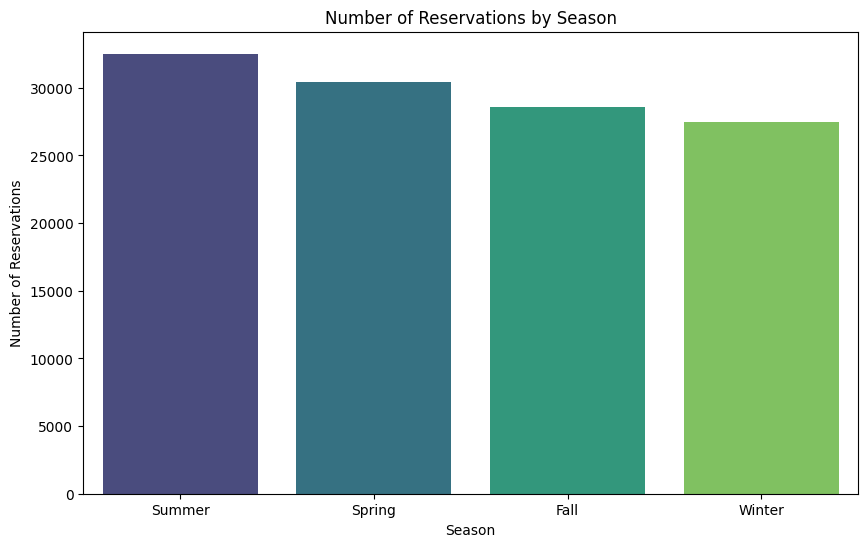

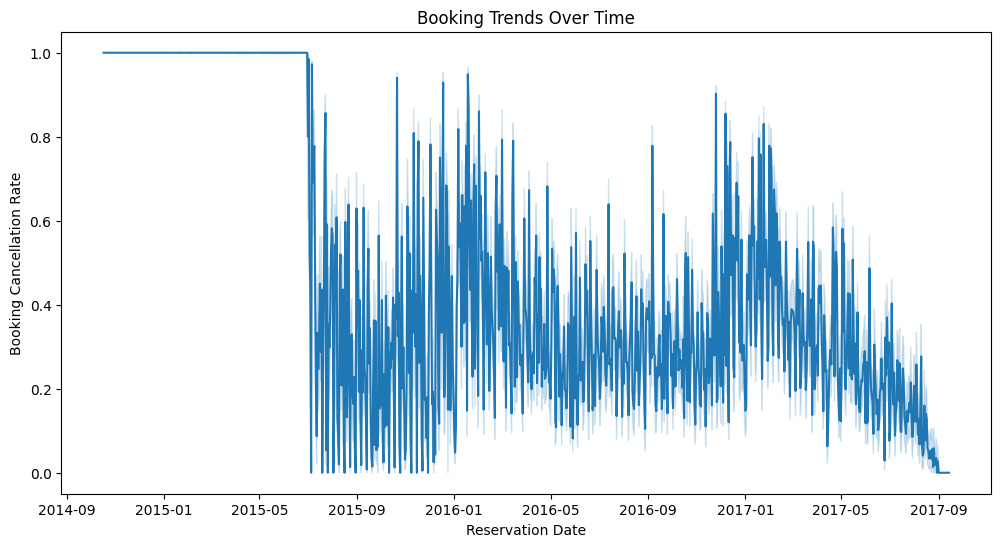

In [102]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df_insight = df_clean.copy()

# Convert 'reservation_status_date' to datetime format
df_insight['reservation_status_date'] = pd.to_datetime(df_insight['reservation_status_date'])

# Extract month and year from 'reservation_status_date'
df_insight['reservation_month'] = df_insight['reservation_status_date'].dt.month
df_insight['reservation_year'] = df_insight['reservation_status_date'].dt.year

# Mapping months to seasons
season_mapping = {1: 'Winter', 2: 'Winter', 3: 'Spring', 4: 'Spring', 5: 'Spring', 6: 'Summer',
                  7: 'Summer', 8: 'Summer', 9: 'Fall', 10: 'Fall', 11: 'Fall', 12: 'Winter'}
df_insight['reservation_season'] = df_insight['reservation_month'].map(season_mapping)

# Plotting the number of reservations by season
plt.figure(figsize=(10, 6))
sns.countplot(x='reservation_season', data=df_insight, palette='viridis')
plt.title('Number of Reservations by Season')
plt.xlabel('Season')
plt.ylabel('Number of Reservations')
plt.show()

# Plotting the trend of reservations over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='reservation_status_date', y='is_canceled', data=df_insight)
plt.title('Booking Trends Over Time')
plt.xlabel('Reservation Date')
plt.ylabel('Booking Cancellation Rate')
plt.show()


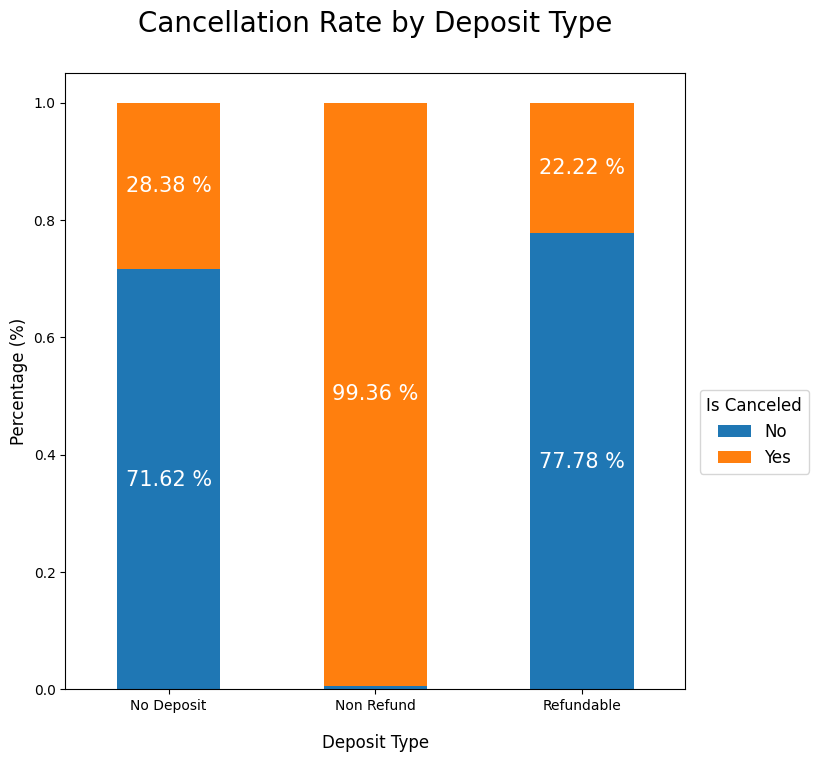

In [103]:
deposit_ax = pd.crosstab(df_insight['deposit_type'], df_insight['is_canceled'], normalize = 'index').plot.bar(stacked=True, figsize=(8,8))
plt.legend(bbox_to_anchor=(1.01, 0.5), title='Is Canceled', fontsize=12, title_fontsize=12, labels=['No','Yes'])

j = 1    
for p in deposit_ax.patches:
    if j != 2:
      width, height = p.get_width(), p.get_height()
      x, y = p.get_xy() 
      deposit_ax.text(x+width/2, 
              y+height/2, 
              '{:.2f} %'.format(height*100), 
              horizontalalignment='center', 
              verticalalignment='center',
              color='white', fontsize=15)
    j += 1
    
plt.title('Cancellation Rate by Deposit Type', fontsize=20, pad=30)  
plt.xticks(rotation=360)  
plt.xlabel('Deposit Type', fontsize=12, labelpad=15)
plt.ylabel('Percentage (%)', fontsize=12)
plt.show()

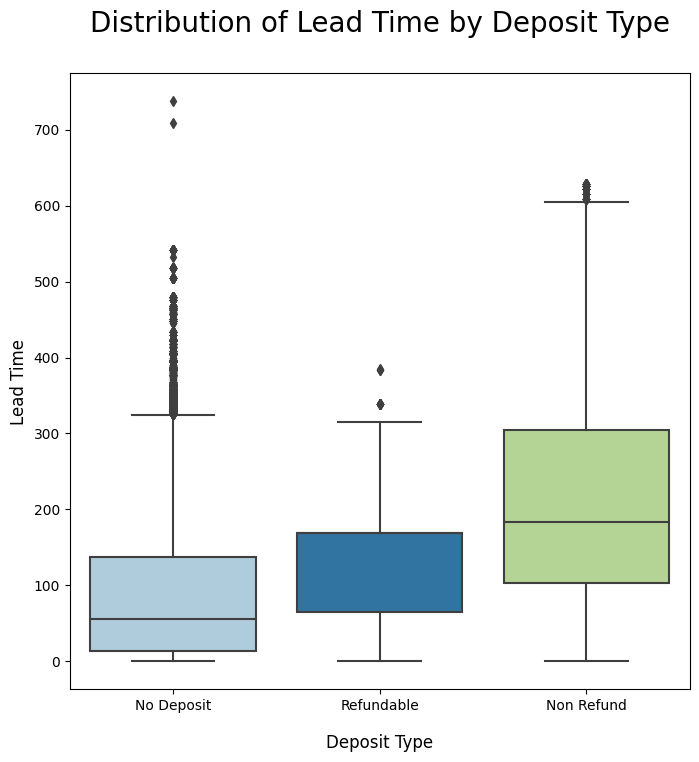

In [104]:
plt.figure(figsize=(8, 8))
deposit_ax2 = sns.boxplot(x='deposit_type', y='lead_time', data=df_insight, palette='Paired')
plt.ylabel('Lead Time', fontsize=12)
plt.xlabel('Deposit Type', fontsize=12, labelpad=15)
plt.title('Distribution of Lead Time by Deposit Type', fontsize=20, pad=30)
plt.show()

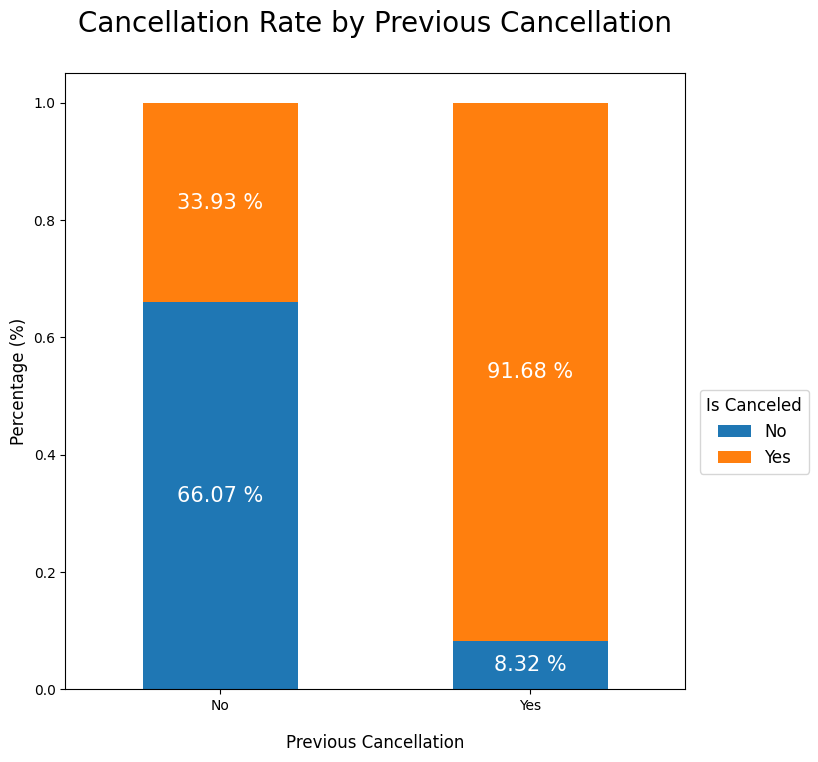

In [105]:
previous_ax = pd.crosstab(df_insight['previous_cancellations'], df_insight['is_canceled'], normalize = 'index').plot.bar(stacked=True, figsize=(8,8))
plt.legend(bbox_to_anchor=(1.01, 0.5), title='Is Canceled', fontsize=12, title_fontsize=12, labels=['No','Yes'])
    
for p in previous_ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    previous_ax.text(x+width/2, 
            y+height/2, 
            '{:.2f} %'.format(height*100), 
            horizontalalignment='center', 
            verticalalignment='center',
            color='white', fontsize=15)
plt.title('Cancellation Rate by Previous Cancellation', fontsize=20, pad=30)   
previous_ax.set_xticklabels(['No','Yes'], rotation=360) 
plt.xlabel('Previous Cancellation', fontsize=12, labelpad=15)
plt.ylabel('Percentage (%)', fontsize=12)
plt.show()

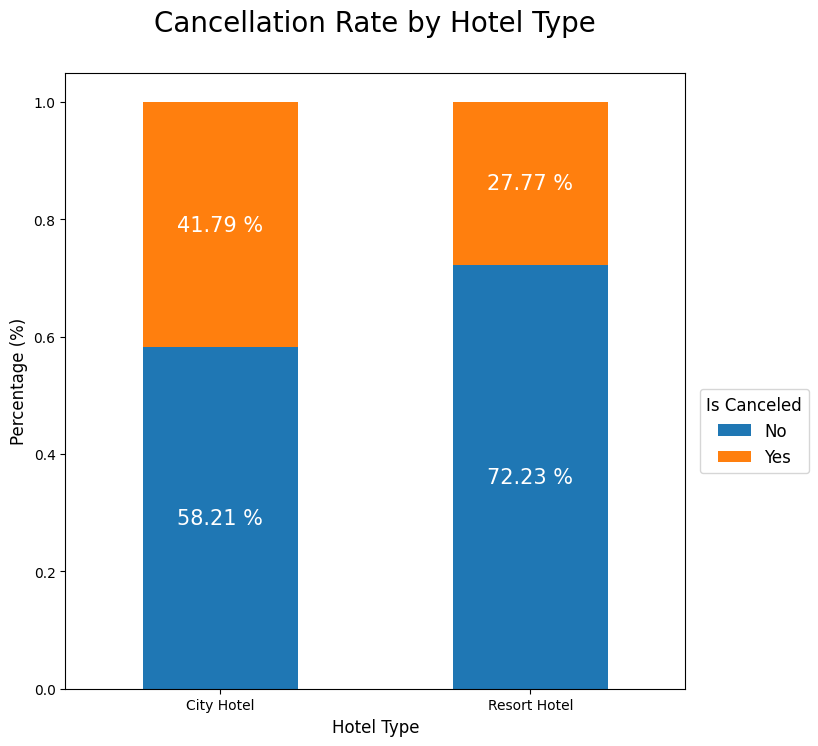

In [106]:
hotel_ax = pd.crosstab(df_insight['hotel'], df_insight['is_canceled'], normalize = 'index').plot.bar(stacked=True, figsize=(8,8))
plt.legend(bbox_to_anchor=(1.01, 0.5), title='Is Canceled', fontsize=12, title_fontsize=12, labels=['No','Yes'])
    
for p in hotel_ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    hotel_ax.text(x+width/2, 
            y+height/2, 
            '{:.2f} %'.format(height*100), 
            horizontalalignment='center', 
            verticalalignment='center',
            color='white', fontsize=15)
plt.title('Cancellation Rate by Hotel Type', fontsize=20, pad=30)    
plt.xticks(rotation=360)
plt.xlabel('Hotel Type', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)
plt.show()

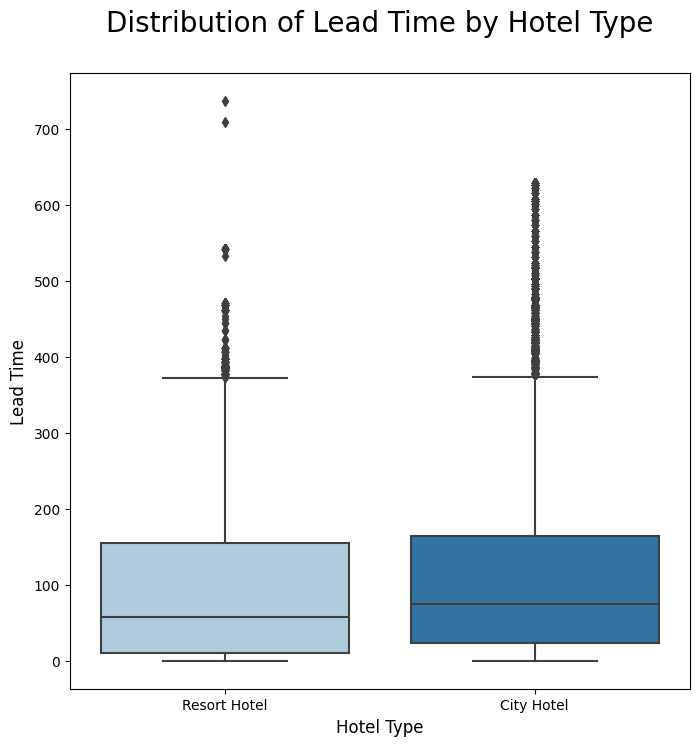

In [107]:
plt.figure(figsize=(8, 8))
sns.boxplot(x='hotel', y='lead_time', data=df_insight, palette='Paired')
plt.ylabel('Lead Time', fontsize=12)
plt.xlabel('Hotel Type', fontsize=12)
plt.title('Distribution of Lead Time by Hotel Type', fontsize=20, pad=30)
plt.show()


Text(0.5, 1.0, 'Total Bookings by Hotel')

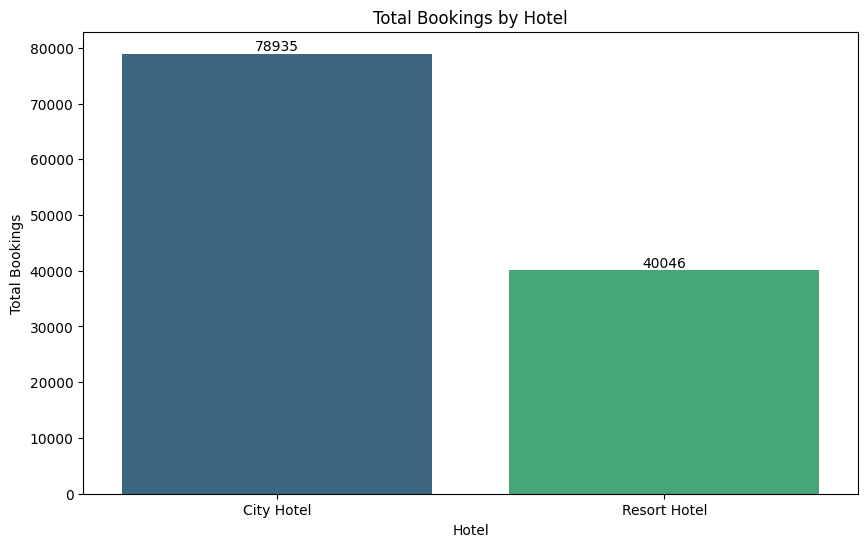

In [108]:
# Group by 'hotel' and sum the 'is_canceled' column to get total bookings for each hotel
total_bookings_by_hotel = df_insight.groupby('hotel')['is_canceled'].count().reset_index()

# Set up the figure
plt.figure(figsize=(10, 6))

# Create a bar plot
sns.barplot(data=total_bookings_by_hotel, x='hotel', y='is_canceled', palette='viridis')

# Display the exact numbers on top of the bars
for index, value in enumerate(total_bookings_by_hotel['is_canceled']):
    plt.text(index, value + 0.1, str(value), ha='center', va='bottom')

# Set labels and title
plt.xlabel('Hotel')
plt.ylabel('Total Bookings')
plt.title('Total Bookings by Hotel')

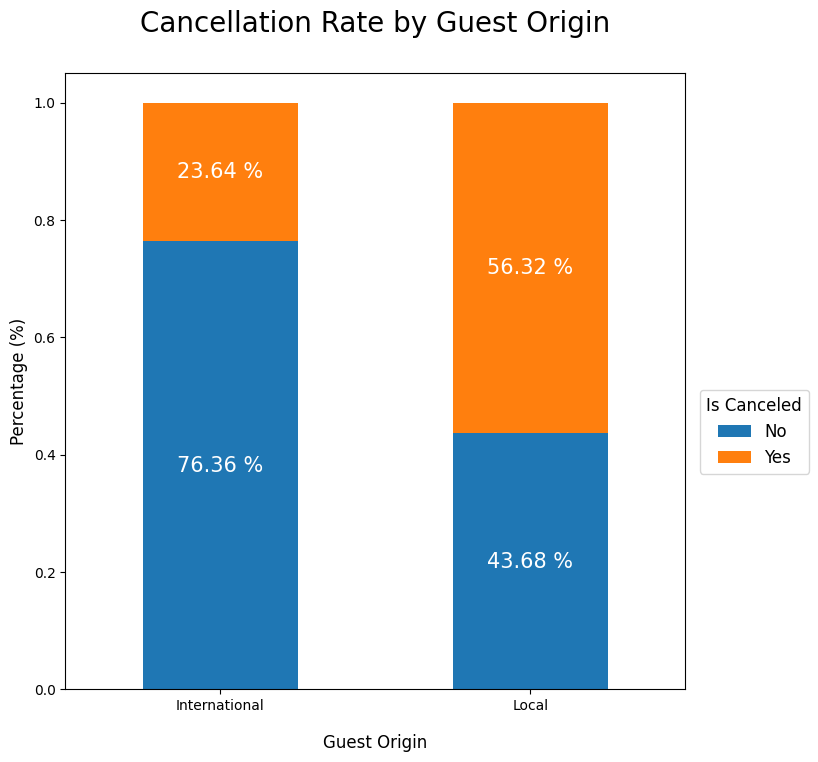

In [109]:
guest_ax = pd.crosstab(df_insight['guest_location'], df_insight['is_canceled'], normalize = 'index').plot.bar(stacked=True, figsize=(8,8))
plt.legend(bbox_to_anchor=(1.01, 0.5), title='Is Canceled', fontsize=12, title_fontsize=12, labels=['No','Yes'])
    
for p in guest_ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    guest_ax.text(x+width/2, 
            y+height/2, 
            '{:.2f} %'.format(height*100), 
            horizontalalignment='center', 
            verticalalignment='center',
            color='white', fontsize=15)
plt.title('Cancellation Rate by Guest Origin', fontsize=20, pad=30)   
plt.xticks(rotation=360) 
plt.xlabel('Guest Origin', fontsize=12, labelpad=15)
plt.ylabel('Percentage (%)', fontsize=12)
plt.show()

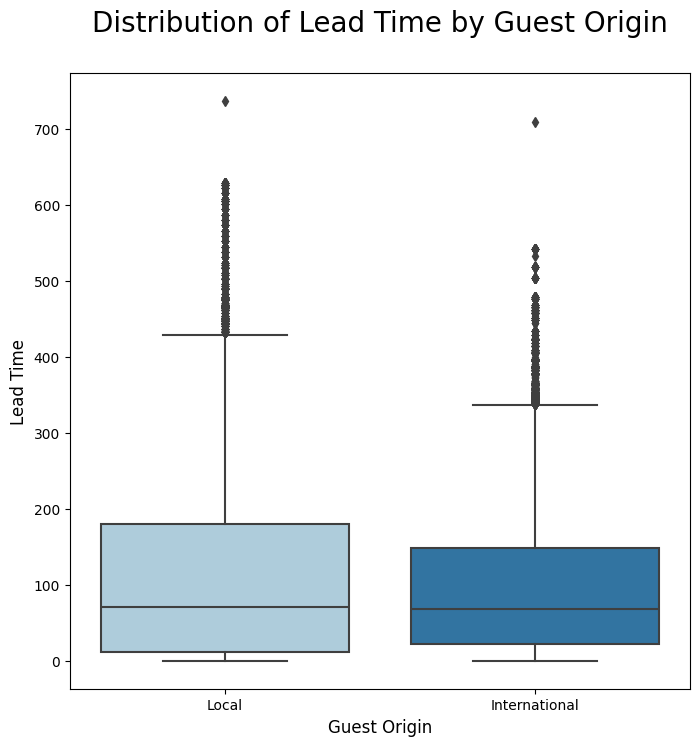

In [110]:
plt.figure(figsize=(8, 8))
sns.boxplot(x='guest_location', y='lead_time', data=df_insight, palette='Paired')
plt.ylabel('Lead Time', fontsize=12)
plt.xlabel('Guest Origin', fontsize=12)
plt.title('Distribution of Lead Time by Guest Origin', fontsize=20, pad=30)
plt.show()

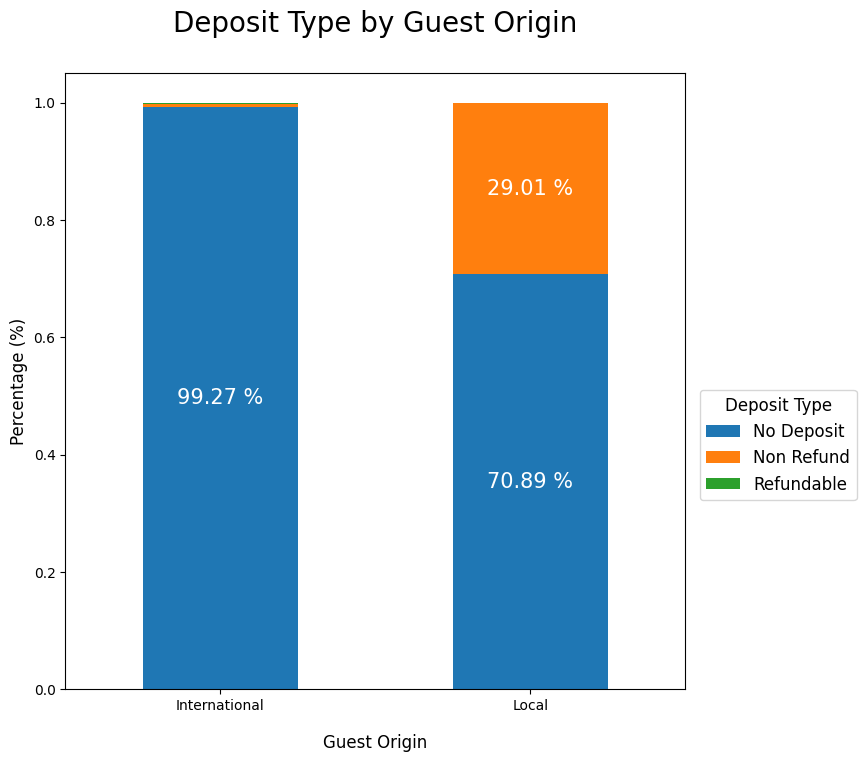

In [111]:
guest_ax2 = pd.crosstab(df_insight['guest_location'], df_insight['deposit_type'], normalize = 'index').plot.bar(stacked=True, figsize=(8,8))
plt.legend(bbox_to_anchor=(1.01, 0.5), title='Deposit Type', fontsize=12, title_fontsize=12)

j = 1
for p in guest_ax2.patches:
    if j == 1 or j == 2 or j == 4:
      width, height = p.get_width(), p.get_height()
      x, y = p.get_xy() 
      guest_ax2.text(x+width/2, 
              y+height/2, 
              '{:.2f} %'.format(height*100), 
              horizontalalignment='center', 
              verticalalignment='center',
              color='white',
              fontsize=15)
    j += 1
plt.title('Deposit Type by Guest Origin', fontsize=20, pad=30)   
plt.xticks(rotation=360) 
plt.xlabel('Guest Origin', fontsize=12, labelpad=15)
plt.ylabel('Percentage (%)', fontsize=12)
plt.show()

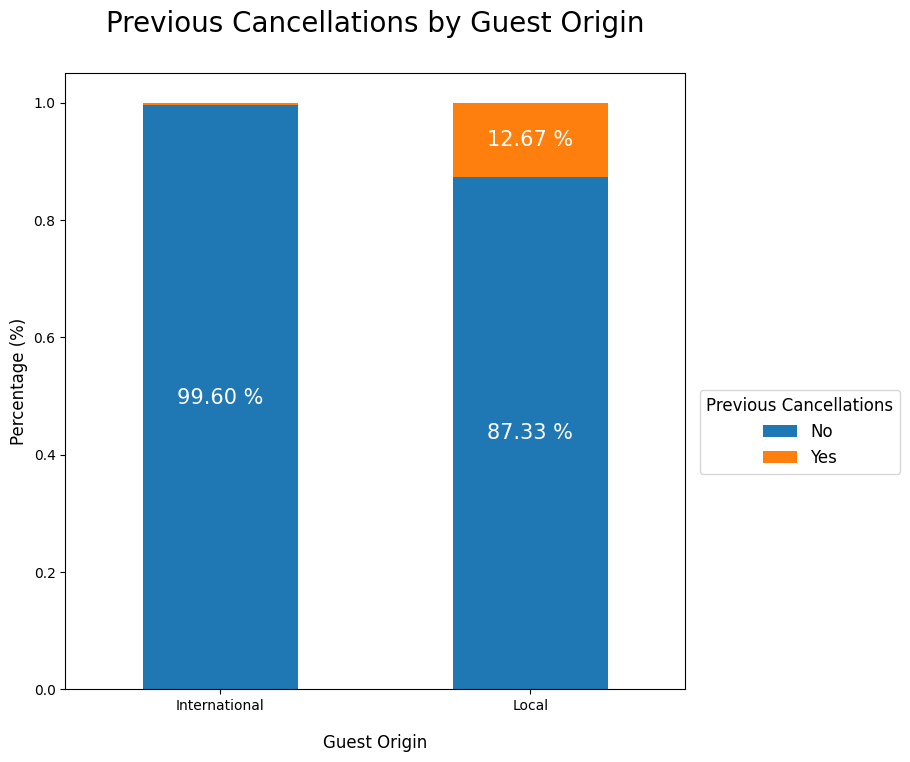

In [112]:
guest_ax3 = pd.crosstab(df_insight['guest_location'], df_insight['previous_cancellations'], normalize = 'index').plot.bar(stacked=True, figsize=(8,8))
plt.legend(bbox_to_anchor=(1.01, 0.5), title='Previous Cancellations', fontsize=12, title_fontsize=12, labels=['No', 'Yes'])

j = 1
for p in guest_ax3.patches:
    if j == 1 or j == 2 or j == 4:
      width, height = p.get_width(), p.get_height()
      x, y = p.get_xy() 
      guest_ax3.text(x+width/2, 
              y+height/2, 
              '{:.2f} %'.format(height*100), 
              horizontalalignment='center', 
              verticalalignment='center',
              color='white',
              fontsize=15)
    j += 1
plt.title('Previous Cancellations by Guest Origin', fontsize=20, pad=30)  
plt.xticks(rotation=360)  
plt.xlabel('Guest Origin', fontsize=12, labelpad=15)
plt.ylabel('Percentage (%)', fontsize=12)
plt.show()

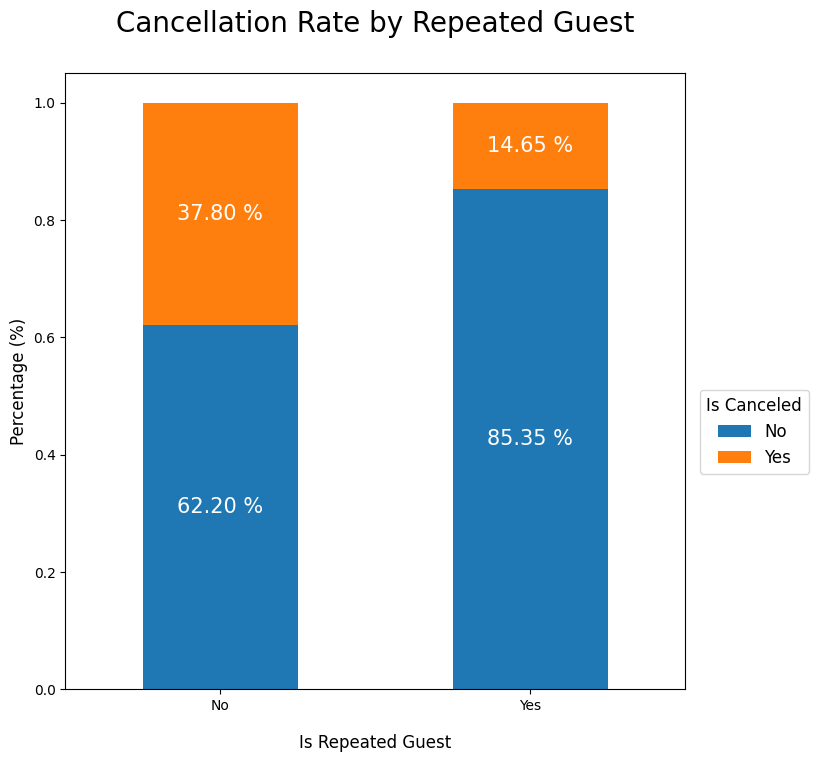

In [113]:
repeat_ax = pd.crosstab(df_insight['is_repeated_guest'], df_insight['is_canceled'], normalize = 'index').plot.bar(stacked=True, figsize=(8,8))
plt.legend(bbox_to_anchor=(1.01, 0.5), title='Is Canceled', fontsize=12, title_fontsize=12, labels=['No','Yes'])

for p in repeat_ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    repeat_ax.text(x+width/2, 
            y+height/2, 
            '{:.2f} %'.format(height*100), 
            horizontalalignment='center', 
            verticalalignment='center',
            color='white', fontsize=15)
plt.title('Cancellation Rate by Repeated Guest', fontsize=20, pad=30)    
repeat_ax.set_xticklabels(['No', 'Yes'], rotation=360)
plt.xlabel('Is Repeated Guest', fontsize=12, labelpad=15)
plt.ylabel('Percentage (%)', fontsize=12)
plt.show()

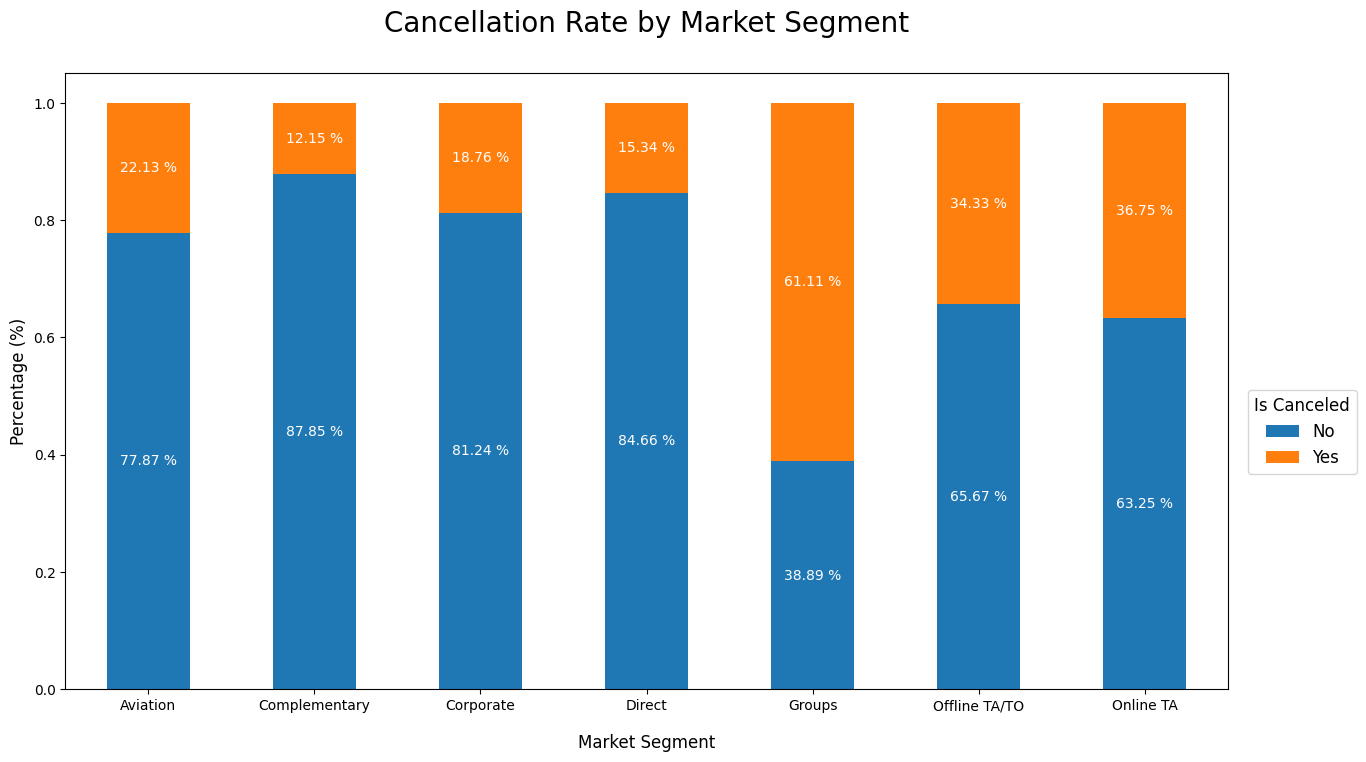

In [114]:
market_ax = pd.crosstab(df_insight['market_segment'], df_insight['is_canceled'], normalize = 'index').plot.bar(stacked=True, figsize=(15,8))
plt.legend(bbox_to_anchor=(1.01, 0.5), title='Is Canceled', fontsize=12, title_fontsize=12, labels=['No','Yes'])
    
for p in market_ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    market_ax.text(x+width/2, 
            y+height/2, 
            '{:.2f} %'.format(height*100), 
            horizontalalignment='center', 
            verticalalignment='center',
            color='white', fontsize=10)

plt.title('Cancellation Rate by Market Segment', fontsize=20, pad=30)    
plt.xticks(rotation=360)
plt.xlabel('Market Segment', fontsize=12, labelpad=15)
plt.ylabel('Percentage (%)', fontsize=12)
plt.show()

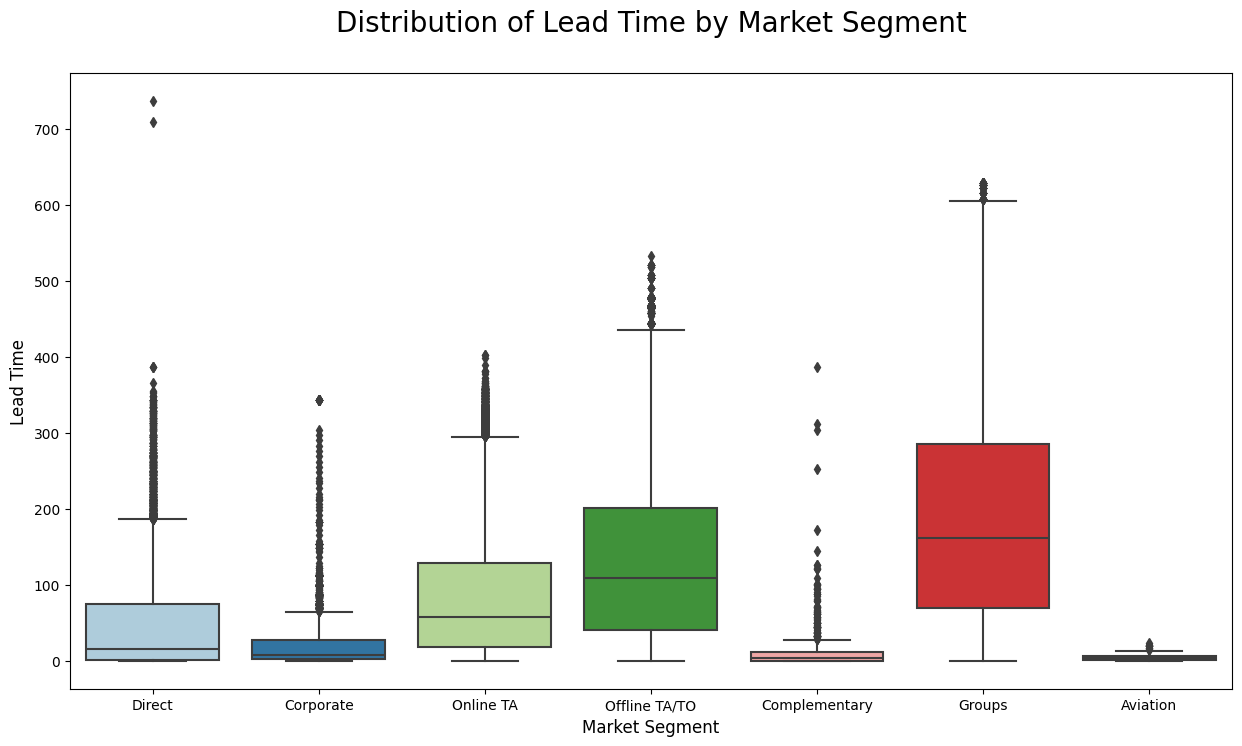

In [115]:
plt.figure(figsize=(15, 8))
sns.boxplot(x='market_segment', y='lead_time', data=df_insight, palette='Paired')
plt.ylabel('Lead Time', fontsize=12)
plt.xlabel('Market Segment', fontsize=12)
plt.title('Distribution of Lead Time by Market Segment', fontsize=20, pad=30)
plt.show()

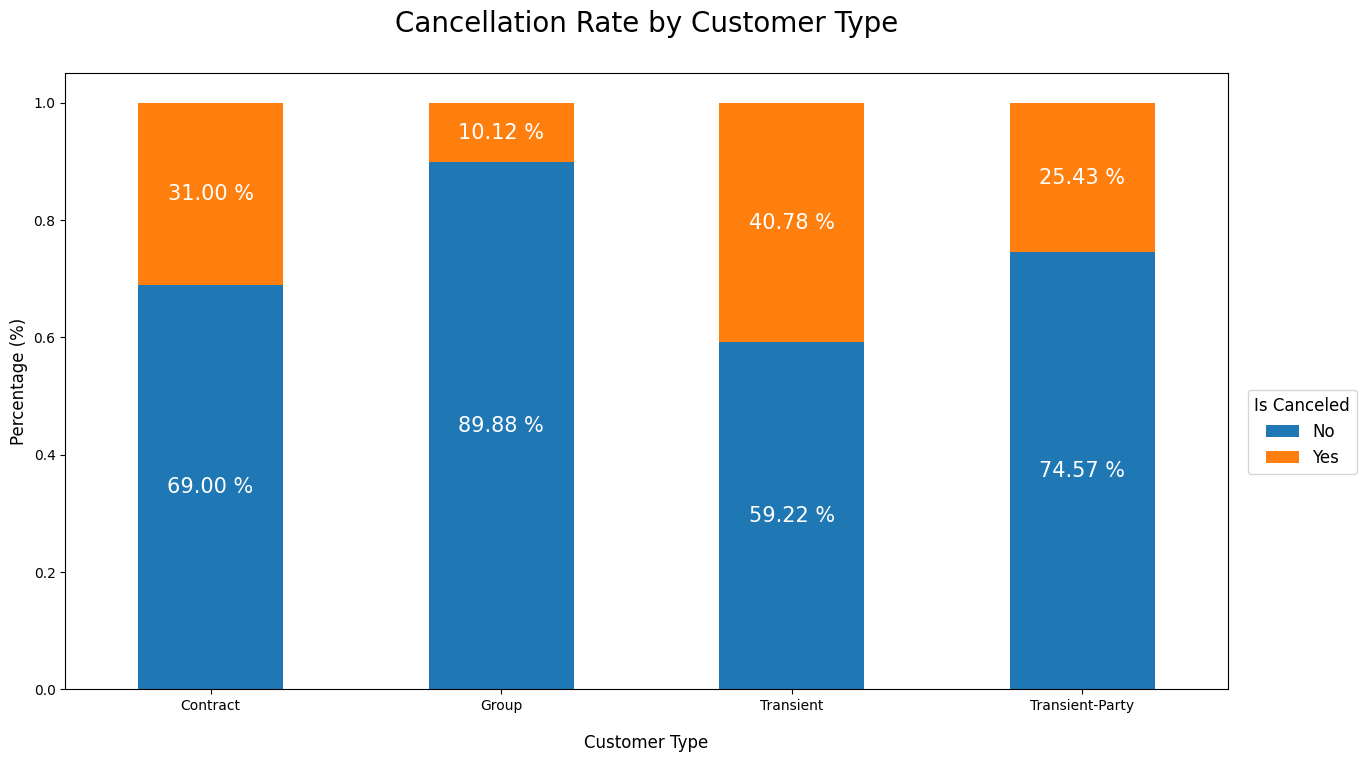

In [116]:
customer_ax = pd.crosstab(df_insight['customer_type'], df_insight['is_canceled'], normalize = 'index').plot.bar(stacked=True, figsize=(15,8))
plt.legend(bbox_to_anchor=(1.01, 0.5), title='Is Canceled', fontsize=12, title_fontsize=12, labels=['No','Yes'])
    
for p in customer_ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    customer_ax.text(x+width/2, 
            y+height/2, 
            '{:.2f} %'.format(height*100), 
            horizontalalignment='center', 
            verticalalignment='center',
            color='white', fontsize=15)

plt.title('Cancellation Rate by Customer Type', fontsize=20, pad=30)    
plt.xticks(rotation=360)
plt.xlabel('Customer Type', fontsize=12, labelpad=15)
plt.ylabel('Percentage (%)', fontsize=12)
plt.show()

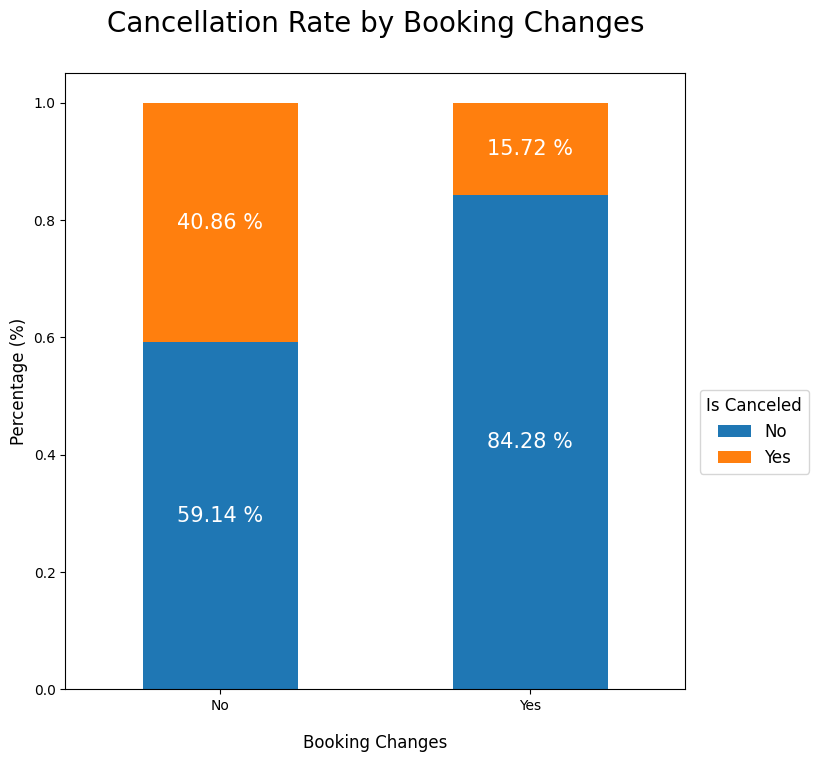

In [117]:
booking_ax = pd.crosstab(df_insight['booking_changes'], df_insight['is_canceled'], normalize = 'index').plot.bar(stacked=True, figsize=(8,8))
plt.legend(bbox_to_anchor=(1.01, 0.5), title='Is Canceled', fontsize=12, title_fontsize=12, labels=['No','Yes'])
    
for p in booking_ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    booking_ax.text(x+width/2, 
            y+height/2, 
            '{:.2f} %'.format(height*100), 
            horizontalalignment='center', 
            verticalalignment='center',
            color='white', fontsize=15)

plt.title('Cancellation Rate by Booking Changes', fontsize=20, pad=30)   
booking_ax.set_xticklabels(['No', 'Yes'], rotation=360)
plt.xlabel('Booking Changes', fontsize=12, labelpad=15)
plt.ylabel('Percentage (%)', fontsize=12)
plt.show()

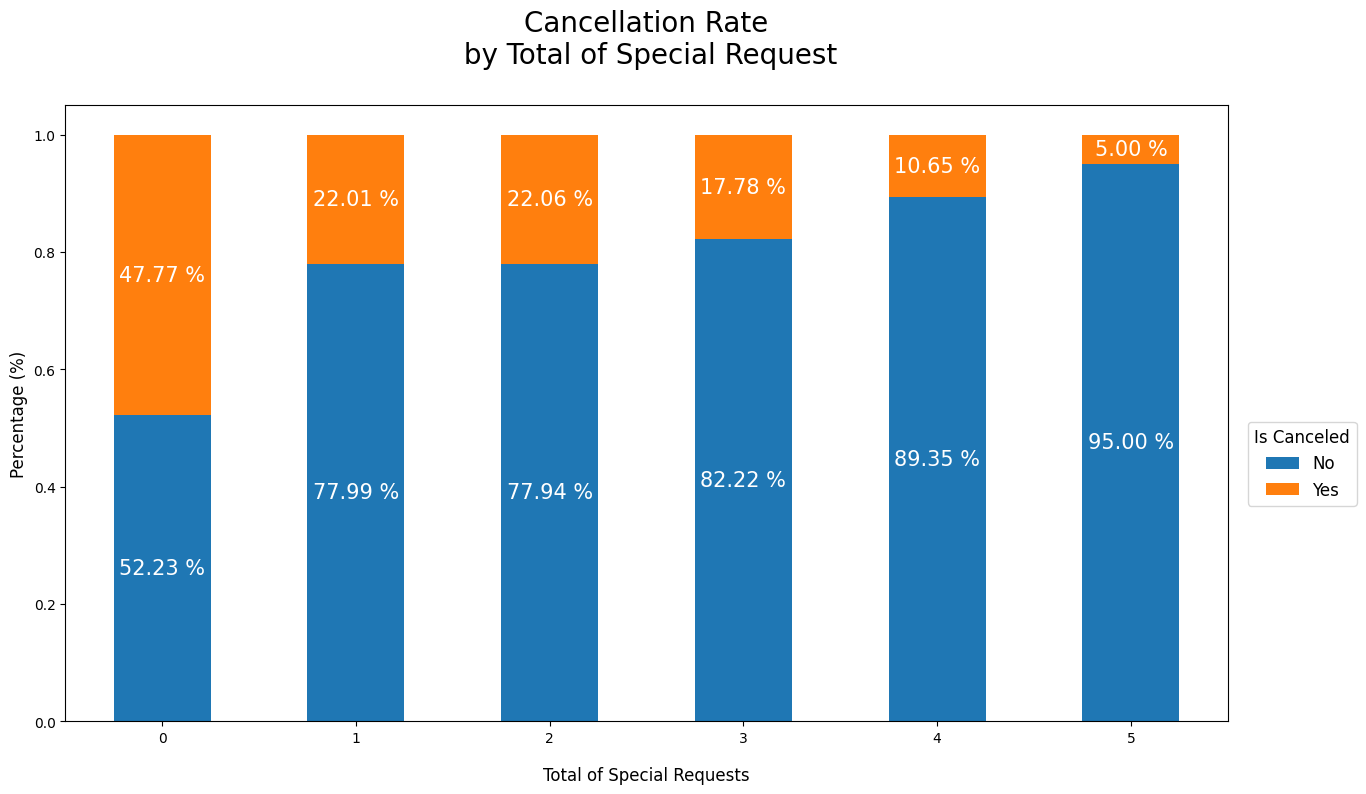

In [118]:
request_ax = pd.crosstab(df_insight['total_of_special_requests'], df_insight['is_canceled'], normalize = 'index').plot.bar(stacked=True, figsize=(15,8))
plt.legend(bbox_to_anchor=(1.01, 0.5), title='Is Canceled', fontsize=12, title_fontsize=12, labels=['No','Yes'])
    
for p in request_ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    request_ax.text(x+width/2, 
            y+height/2, 
            '{:.2f} %'.format(height*100), 
            horizontalalignment='center', 
            verticalalignment='center',
            color='white', fontsize=15)

plt.title('Cancellation Rate\n by Total of Special Request', fontsize=20, pad=30)    
plt.xticks(rotation=360)
plt.xlabel('Total of Special Requests', fontsize=12, labelpad=15)
plt.ylabel('Percentage (%)', fontsize=12)
plt.show()

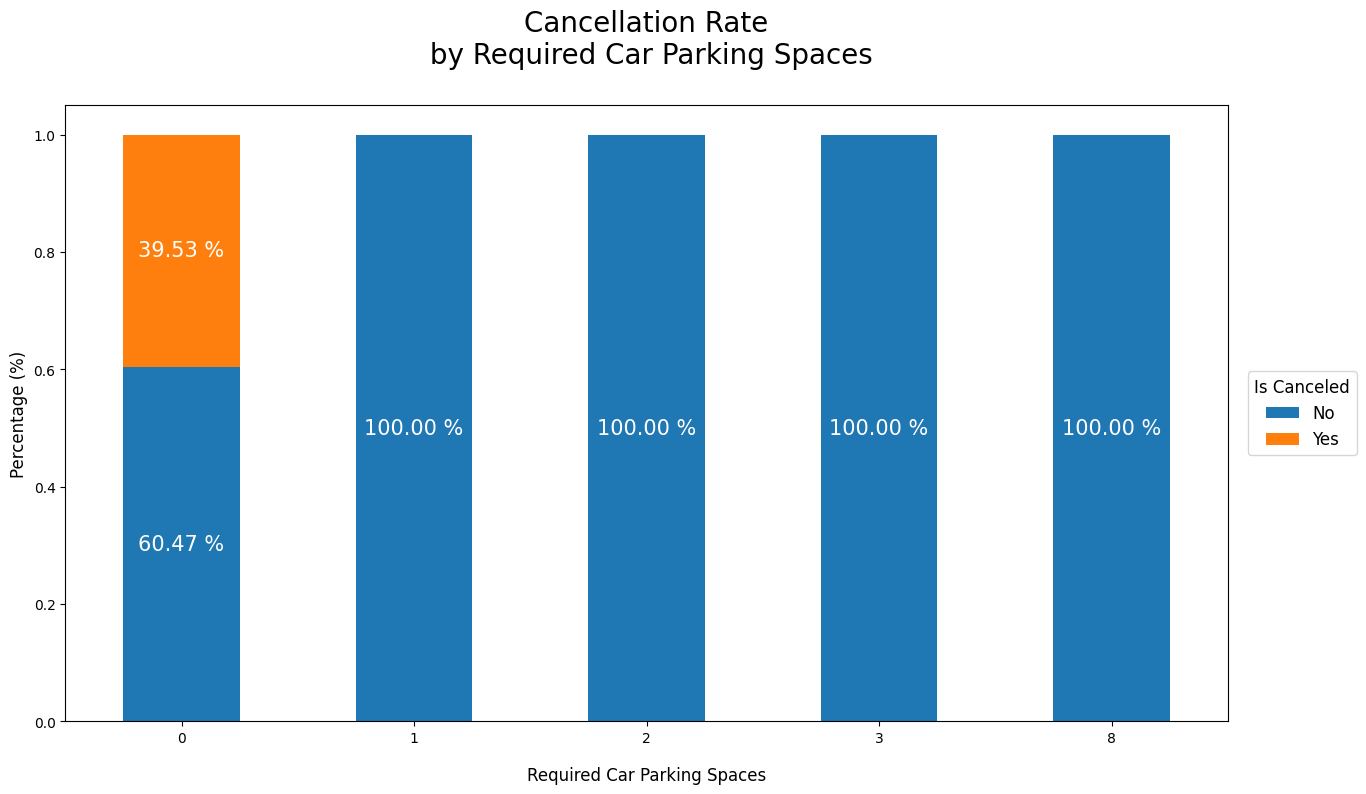

In [119]:
parking_ax = pd.crosstab(df_insight['required_car_parking_spaces'], df_insight['is_canceled'], normalize = 'index').plot.bar(stacked=True, figsize=(15,8))
plt.legend(loc='center left', bbox_to_anchor=(1.01, 0.5), title='Is Canceled', fontsize=12, title_fontsize=12, labels=['No','Yes'])

j = 1    
for p in parking_ax.patches:
    if j < 7:
      width, height = p.get_width(), p.get_height()
      x, y = p.get_xy() 
      parking_ax.text(x+width/2, 
              y+height/2, 
              '{:.2f} %'.format(height*100), 
              horizontalalignment='center', 
              verticalalignment='center',
              color='white', fontsize=15)
    j += 1
plt.title('Cancellation Rate\n by Required Car Parking Spaces', fontsize=20, pad=30)    
plt.xticks(rotation=360)
plt.xlabel('Required Car Parking Spaces', fontsize=12, labelpad=15)
plt.ylabel('Percentage (%)', fontsize=12)
plt.show()

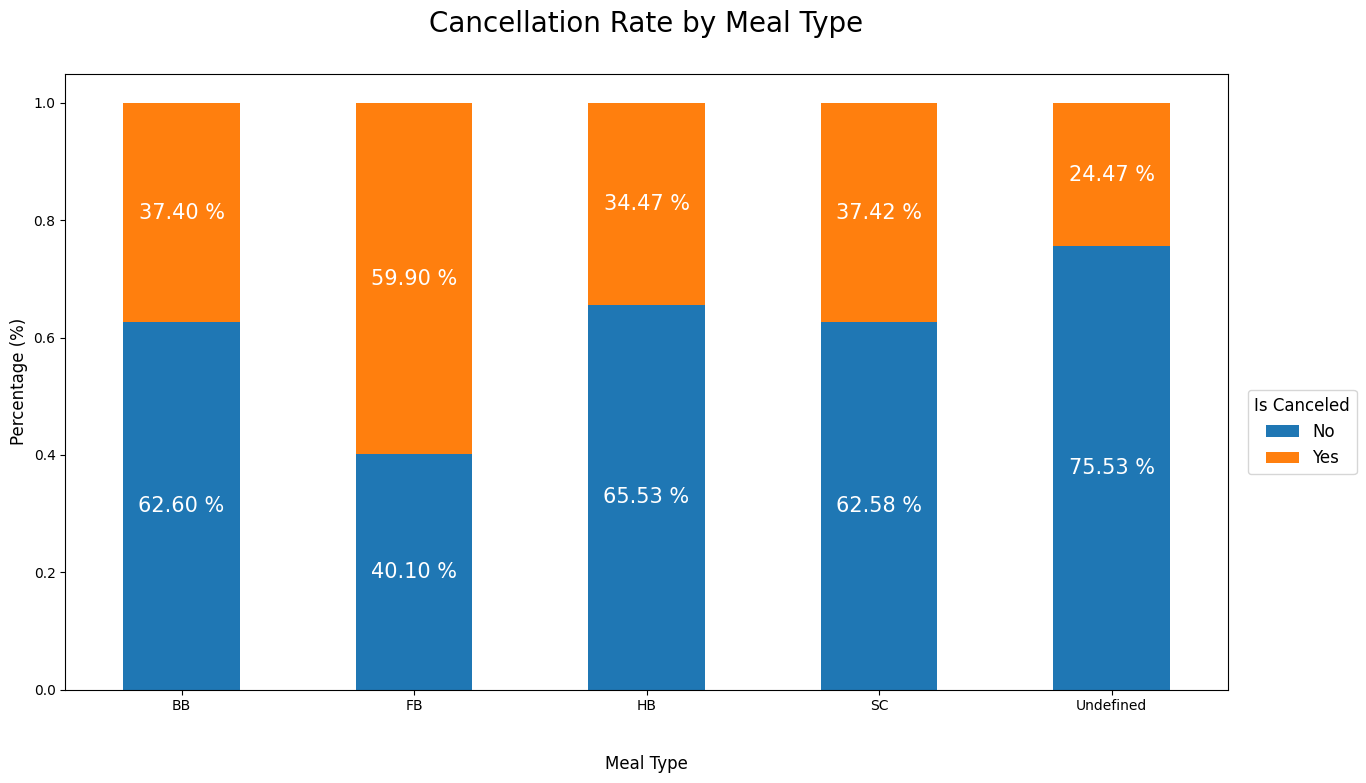

In [120]:
meal_ax = pd.crosstab(df_insight['meal'], df_insight['is_canceled'], normalize = 'index').plot.bar(stacked=True, figsize=(15,8))
plt.legend(bbox_to_anchor=(1.01, 0.5), title='Is Canceled', fontsize=12, title_fontsize=12, labels=['No','Yes'])

for p in meal_ax.patches:
      width, height = p.get_width(), p.get_height()
      x, y = p.get_xy() 
      meal_ax.text(x+width/2, 
              y+height/2, 
              '{:.2f} %'.format(height*100), 
              horizontalalignment='center', 
              verticalalignment='center',
              color='white', fontsize=15)
plt.title('Cancellation Rate by Meal Type', fontsize=20, pad=30) 
plt.xticks(rotation=360)   
plt.xlabel('Meal Type', fontsize=12, labelpad=30)
plt.ylabel('Percentage (%)', fontsize=12)
plt.show()

Text(0.5, 1.0, 'Total Bookings by Meal Type')

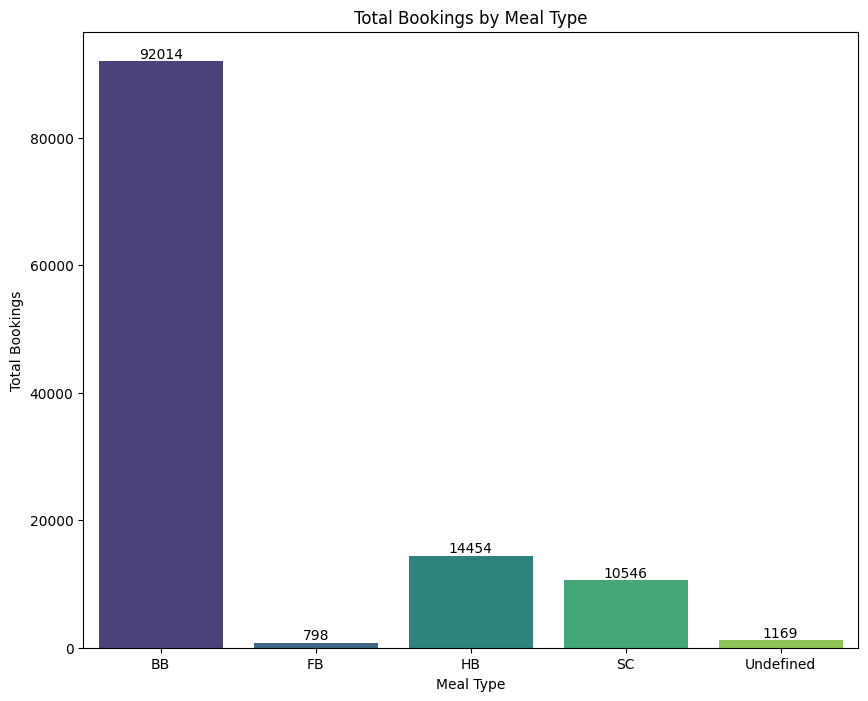

In [121]:
# Group by 'meal' and count the bookings for each meal type
total_bookings_by_meal = df_insight.groupby('meal')['is_canceled'].count().reset_index()

# Set up the figure
plt.figure(figsize=(10, 8))

# Create a bar plot
sns.barplot(data=total_bookings_by_meal, x='meal', y='is_canceled', palette='viridis')

# Display the exact numbers on top of the bars
for index, value in enumerate(total_bookings_by_meal['is_canceled']):
    plt.text(index, value + 0.1, str(value), ha='center', va='bottom')

# Set labels and title
plt.xlabel('Meal Type')
plt.ylabel('Total Bookings')
plt.title('Total Bookings by Meal Type')

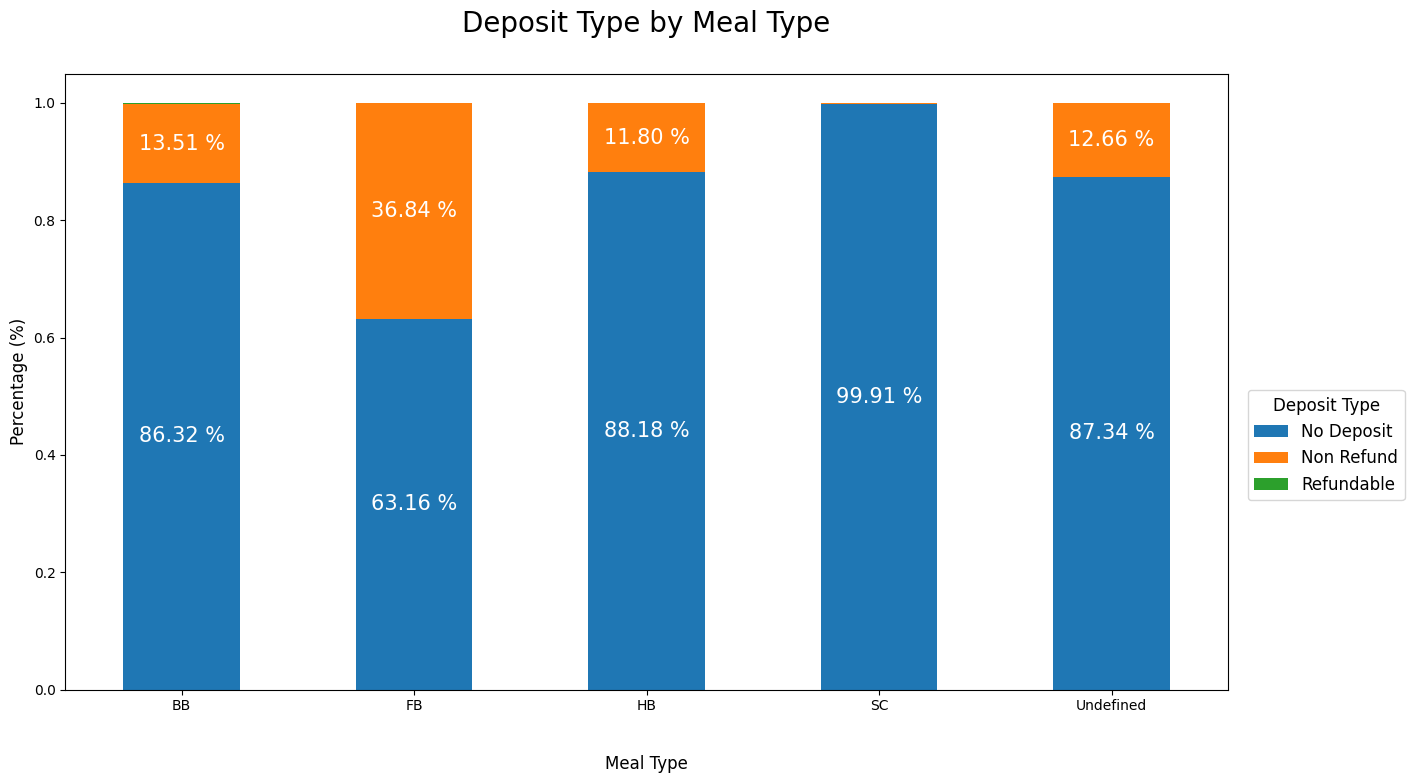

In [122]:
meal_ax3 = pd.crosstab(df_insight['meal'], df_insight['deposit_type'], normalize = 'index').plot.bar(stacked=True, figsize=(15,8))
plt.legend(bbox_to_anchor=(1.01, 0.5), title='Deposit Type', fontsize=12, title_fontsize=12)

j = 1
for p in meal_ax3.patches:
      if j < 9 or j == 10: 
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy() 
        meal_ax3.text(x+width/2, 
                y+height/2, 
                '{:.2f} %'.format(height*100), 
                horizontalalignment='center', 
                verticalalignment='center',
                color='white',
                fontsize=15)
      j += 1
plt.title('Deposit Type by Meal Type', fontsize=20, pad=30)    
plt.xticks(rotation=360)
plt.xlabel('Meal Type', fontsize=12, labelpad=30)
plt.ylabel('Percentage (%)', fontsize=12)
plt.show()

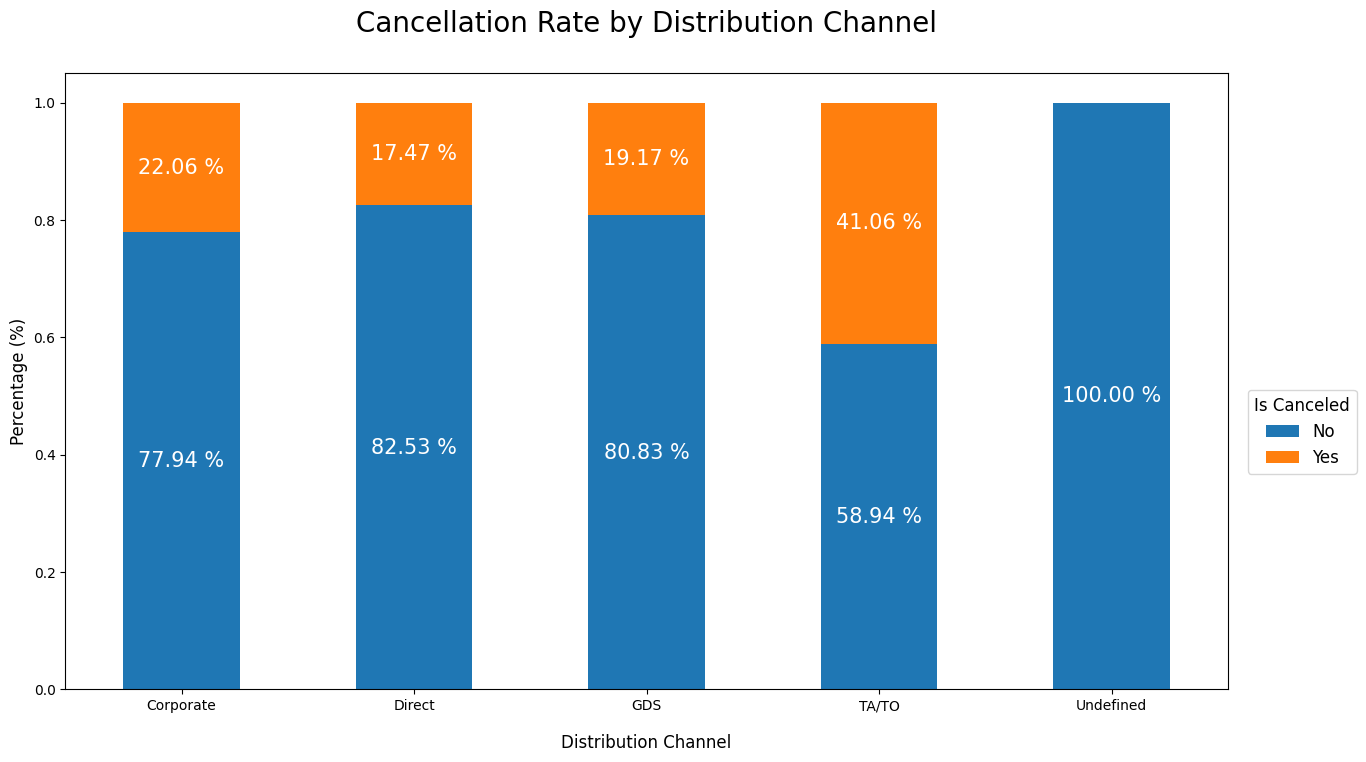

In [123]:
distribution_ax = pd.crosstab(df_insight['distribution_channel'], df_insight['is_canceled'], normalize = 'index').plot.bar(stacked=True, figsize=(15,8))
plt.legend(bbox_to_anchor=(1.01, 0.5), title='Is Canceled', fontsize=12, title_fontsize=12, labels=['No','Yes'])

j = 1   
for p in distribution_ax.patches:
      if j != 10:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy() 
        distribution_ax.text(x+width/2, 
                y+height/2, 
                '{:.2f} %'.format(height*100), 
                horizontalalignment='center', 
                verticalalignment='center',
                color='white', fontsize=15)
      j += 1
plt.title('Cancellation Rate by Distribution Channel', fontsize=20, pad=30)    
plt.xticks(rotation=360)
plt.xlabel('Distribution Channel', fontsize=12, labelpad=15)
plt.ylabel('Percentage (%)', fontsize=12)
plt.show()

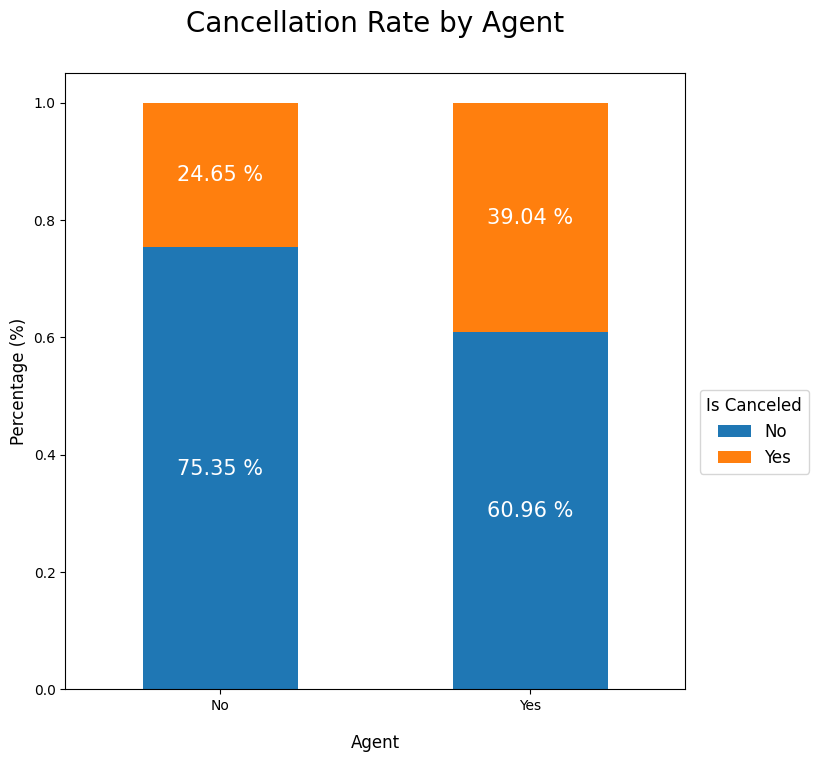

In [124]:
agent_ax = pd.crosstab(df_insight['agent'], df_insight['is_canceled'], normalize = 'index').plot.bar(stacked=True, figsize=(8,8))
plt.legend(bbox_to_anchor=(1.01, 0.5), title='Is Canceled', fontsize=12, title_fontsize=12, labels=['No','Yes'])
   
for p in agent_ax.patches:
      width, height = p.get_width(), p.get_height()
      x, y = p.get_xy() 
      agent_ax.text(x+width/2, 
              y+height/2, 
              '{:.2f} %'.format(height*100), 
              horizontalalignment='center', 
              verticalalignment='center',
              color='white', fontsize=15)
plt.title('Cancellation Rate by Agent', fontsize=20, pad=30)    
agent_ax.set_xticklabels(['No', 'Yes'], rotation=360)
plt.xlabel('Agent', fontsize=12, labelpad=15)
plt.ylabel('Percentage (%)', fontsize=12)
plt.show()

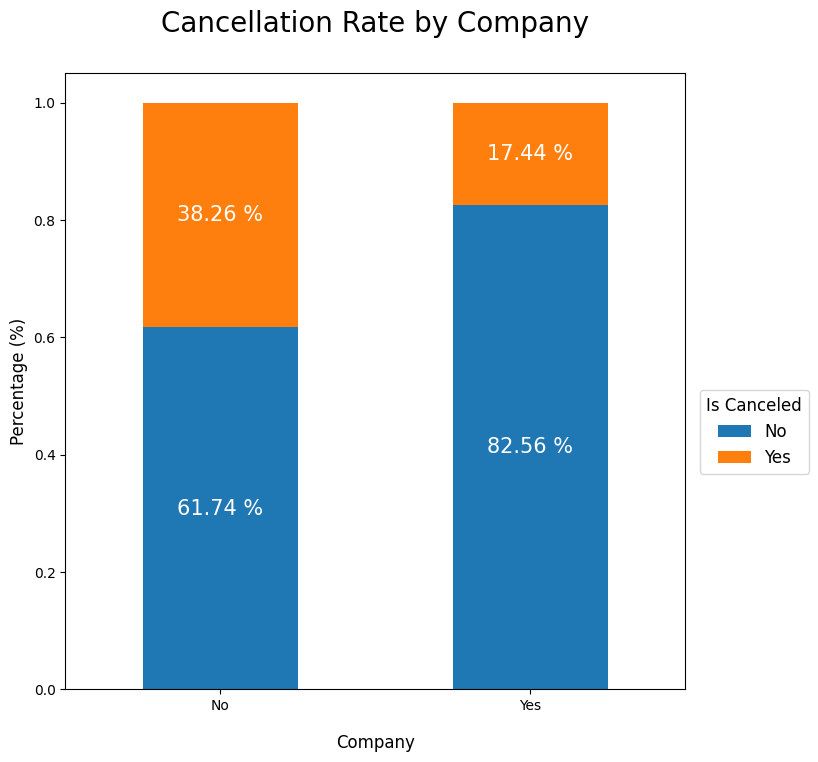

In [125]:
company_ax = pd.crosstab(df_insight['company'], df_insight['is_canceled'], normalize = 'index').plot.bar(stacked=True, figsize=(8,8))
plt.legend(bbox_to_anchor=(1.01, 0.5), title='Is Canceled', fontsize=12, title_fontsize=12, labels=['No','Yes'])
   
for p in company_ax.patches:
      width, height = p.get_width(), p.get_height()
      x, y = p.get_xy() 
      company_ax.text(x+width/2, 
              y+height/2, 
              '{:.2f} %'.format(height*100), 
              horizontalalignment='center', 
              verticalalignment='center',
              color='white', fontsize=15)
plt.title('Cancellation Rate by Company', fontsize=20, pad=30) 
company_ax.set_xticklabels(['No', 'Yes'], rotation=360)   
plt.xlabel('Company', fontsize=12, labelpad=15)
plt.ylabel('Percentage (%)', fontsize=12)
plt.show()

In [126]:
#MODELLING 
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix, classification_report

def eval_classification(model, pred, xtrain, ytrain, xtest, ytest):
    print("Accuracy (Test Set): %.2f" % accuracy_score(ytest, pred))
    print("Precision (Test Set): %.2f" % precision_score(ytest, pred))
    print("Recall (Test Set): %.2f" % recall_score(ytest, pred))
    print("F1-Score (Test Set): %.2f" % f1_score(ytest, pred))
    
    fpr, tpr, thresholds = roc_curve(ytest, pred, pos_label=1) # pos_label: label yang kita anggap positive
    print("AUC: %.2f" % auc(fpr, tpr))

def show_best_hyperparameter(model, hyperparameters):
    for key, value in hyperparameters.items() :
        print('Best '+key+':', model.get_params()[key])

def show_cmatrix(ytest, pred):
    # Creating confusion matrix 
    cm = confusion_matrix(ytest, pred)

    # Putting the matrix a dataframe form  
    cm_df = pd.DataFrame(cm, index=['Actually Not Canceled', 'Actually Canceled'],
                 columns=['Predicted Not Canceled', 'Predicted Canceled'])
    
    # visualizing the confusion matrix
    sns.set(font_scale=1.2)
    plt.figure(figsize=(10,4))
        
    sns.heatmap(cm, annot=True, fmt='g', cmap="Blues",xticklabels=cm_df.columns, yticklabels=cm_df.index, annot_kws={"size": 20})
    plt.title("Confusion Matrix", size=20)
    plt.xlabel('Predicted Class')
    plt.ylabel('True Class');

def show_feature_importance(model):
  feat_importances = pd.Series(model.feature_importances_, index=X.columns)
  ax = feat_importances.nlargest(20).plot(kind='barh', figsize=(10, 8))
  ax.invert_yaxis()

  plt.xlabel('score')
  plt.ylabel('feature')
  plt.title('feature importance score')

In [127]:
# Split Feature and Label Train and Test Setup
X = df_clean[['is_repeated_guest', 'previous_cancellations', 'booking_changes', 'lead_time_norm', 'adr_norm',
       'required_car_parking_spaces_norm', 'total_of_special_requests_norm',
       'total_stays_norm', 'total_guests_norm', 'agent', 'company',
       'hotel_CityHotel', 'hotel_ResortHotel', 'meal_BB', 'meal_FB', 'meal_HB', 'meal_SC',
       'meal_Undefined', 'market_segment_Aviation',
       'market_segment_Complementary', 'market_segment_Corporate',
       'market_segment_Direct', 'market_segment_Groups',
       'market_segment_OfflineTATO', 'market_segment_OnlineTA',
       'distribution_channel_Corporate', 'distribution_channel_Direct',
       'distribution_channel_GDS', 'distribution_channel_TATO',
       'distribution_channel_Undefined',
       'deposit_type_NoDeposit', 'deposit_type_NonRefund',
       'deposit_type_Refundable', 'customer_type_Contract',
       'customer_type_Group', 'customer_type_Transient',
       'customer_type_Transient-Party', 'guest_location_International',
       'guest_location_Local']]
y = df_clean['is_canceled'] # target / label

#Splitting the data into Train and Test
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [128]:
pip install --upgrade matplotlib

Note: you may need to restart the kernel to use updated packages.


In [129]:
!pip install ipython-autotime

%load_ext autotime

  Obtaining dependency information for ipython-autotime from https://files.pythonhosted.org/packages/d1/6b/c668b9d6a3552eeb4d82c0e6f1e79debc9cfaecc2d59ddb5b2f38c24cdfc/ipython_autotime-0.3.2-py2.py3-none-any.whl.metadata
  Using cached ipython_autotime-0.3.2-py2.py3-none-any.whl.metadata (1.4 kB)
Using cached ipython_autotime-0.3.2-py2.py3-none-any.whl (7.0 kB)
time: 0 ns (started: 2023-11-29 23:44:54 -06:00)


In [130]:
import time

time: 0 ns (started: 2023-11-29 23:45:03 -06:00)


In [131]:
#Logistical Regresssion
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(solver='liblinear')

tic = time.time()
lr_model.fit(X_train, y_train)
toc = time.time()

y_pred_lr = lr_model.predict(X_test)

lr_time = toc - tic

time: 1.11 s (started: 2023-11-29 23:45:05 -06:00)


In [132]:
eval_classification(lr_model, y_pred_lr, X_train, y_train, X_test, y_test)

Accuracy (Test Set): 0.80
Precision (Test Set): 0.81
Recall (Test Set): 0.62
F1-Score (Test Set): 0.70
AUC: 0.77
time: 62 ms (started: 2023-11-29 23:45:08 -06:00)


In [133]:
print('Train score: ' + str(lr_model.score(X_train, y_train))) #accuracy
print('Test score:' + str(lr_model.score(X_test, y_test))) #accuracy

Train score: 0.806810268232356
Test score:0.8047345566605967
time: 47 ms (started: 2023-11-29 23:45:11 -06:00)


In [134]:
recall_lr = recall_score(y_test, y_pred_lr)
acc_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)
acc_lr_train = lr_model.score(X_train, y_train)

time: 94 ms (started: 2023-11-29 23:45:14 -06:00)


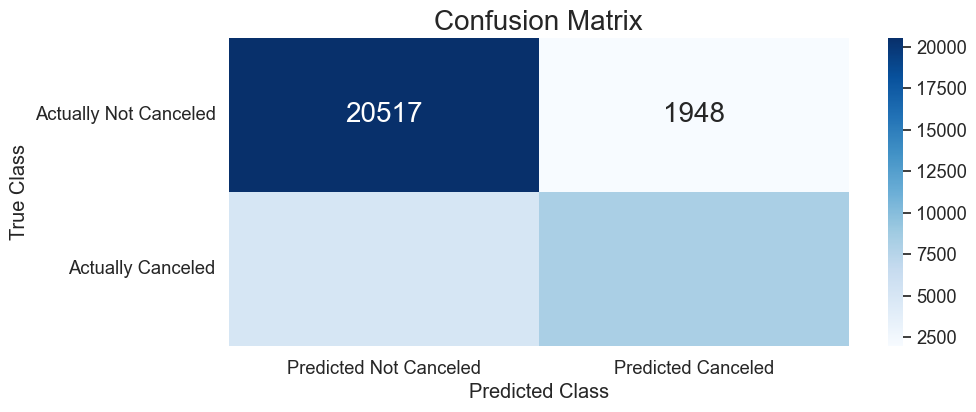

time: 297 ms (started: 2023-11-29 23:45:26 -06:00)


In [136]:
show_cmatrix(y_test, y_pred_lr)

Best Parameters:  {'C': 10, 'penalty': 'l1', 'solver': 'saga'}
Best Model Accuracy: 0.81


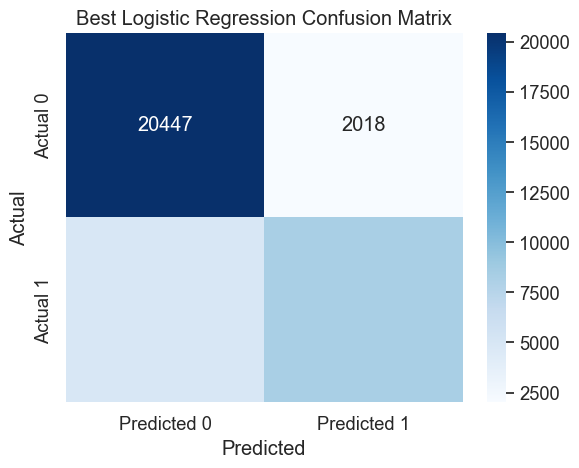

time: 5min 10s (started: 2023-11-29 23:45:37 -06:00)


In [137]:
#Tuned Model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Adjust as needed
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

# Create a Logistic Regression model
logreg_model = LogisticRegression(random_state=42)

# Create GridSearchCV object
grid_search_logreg = GridSearchCV(logreg_model, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search_logreg.fit(X_train, y_train)

# Print the best parameters
print("Best Parameters: ", grid_search_logreg.best_params_)

# Get the best model
best_logreg_model = grid_search_logreg.best_estimator_

# Make predictions using the best model
y_pred_best_logreg = best_logreg_model.predict(X_test)

# Evaluate the best model
accuracy_best_logreg = accuracy_score(y_test, y_pred_best_logreg)
print(f'Best Model Accuracy: {accuracy_best_logreg:.2f}')

# Display the updated confusion matrix
conf_matrix_best_logreg = confusion_matrix(y_test, y_pred_best_logreg)
sns.heatmap(conf_matrix_best_logreg, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Best Logistic Regression Confusion Matrix')
plt.show()


In [305]:
# Identify columns with non-numeric values
non_numeric_columns = X_train.select_dtypes(include='object').columns
print("Columns with non-numeric values:", non_numeric_columns)

Columns with non-numeric values: Index([], dtype='object')
time: 0 ns (started: 2023-11-29 20:35:41 -06:00)


In [306]:
# Assuming df_clean is your original DataFrame
X = df_clean[['is_repeated_guest', 'previous_cancellations', 'booking_changes', 'lead_time_norm', 'adr_norm',
       'required_car_parking_spaces_norm', 'total_of_special_requests_norm',
       'total_stays_norm', 'total_guests_norm', 'agent', 'company',
       'hotel_CityHotel', 'hotel_ResortHotel', 'meal_BB', 'meal_FB', 'meal_HB', 'meal_SC',
       'meal_Undefined', 'market_segment_Aviation',
       'market_segment_Complementary', 'market_segment_Corporate',
       'market_segment_Direct', 'market_segment_Groups',
       'market_segment_OfflineTATO', 'market_segment_OnlineTA',
       'distribution_channel_Corporate', 'distribution_channel_Direct',
       'distribution_channel_GDS', 'distribution_channel_TATO',
       'distribution_channel_Undefined',
       'deposit_type_NoDeposit', 'deposit_type_NonRefund',
       'deposit_type_Refundable', 'customer_type_Contract',
       'customer_type_Group', 'customer_type_Transient',
       'customer_type_Transient-Party', 'guest_location_International',
       'guest_location_Local']]

y = df_clean['is_canceled'] # target / label

#Splitting the data into Train and Test
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)


time: 125 ms (started: 2023-11-29 20:37:56 -06:00)


In [307]:
X = np.ascontiguousarray(X)

time: 281 ms (started: 2023-11-29 20:37:59 -06:00)


In [308]:
print(X.flags.c_contiguous)

True
time: 0 ns (started: 2023-11-29 20:38:02 -06:00)


In [309]:
pip install --user --upgrade scikit-learn

time: 5.5 s (started: 2023-11-29 20:38:05 -06:00)


In [310]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()


time: 15 ms (started: 2023-11-29 20:38:23 -06:00)


In [311]:
model.fit(X_train, y_train)


DecisionTreeClassifier()

time: 1.38 s (started: 2023-11-29 20:38:26 -06:00)


In [312]:
y_pred = model.predict(X_test)


time: 16 ms (started: 2023-11-29 20:38:30 -06:00)


In [313]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

# Assuming you have y_test (true labels) and y_pred (predicted labels)
# y_test and y_pred should be binary (0 or 1) for a binary classification problem

# Precision
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

precision = precision_score(y_test, y_pred)
print(f'Precision: {precision}')

# Recall
recall = recall_score(y_test, y_pred)
print(f'Recall: {recall}')

# F1-score
f1 = f1_score(y_test, y_pred)
print(f'F1-score: {f1}')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{conf_matrix}')


Accuracy: 0.8351870009805294
Precision: 0.7759332982798768
Recall: 0.780801209372638
F1-score: 0.7783596428436876
Confusion Matrix:
[[19482  2983]
 [ 2900 10330]]
time: 93 ms (started: 2023-11-29 20:38:36 -06:00)


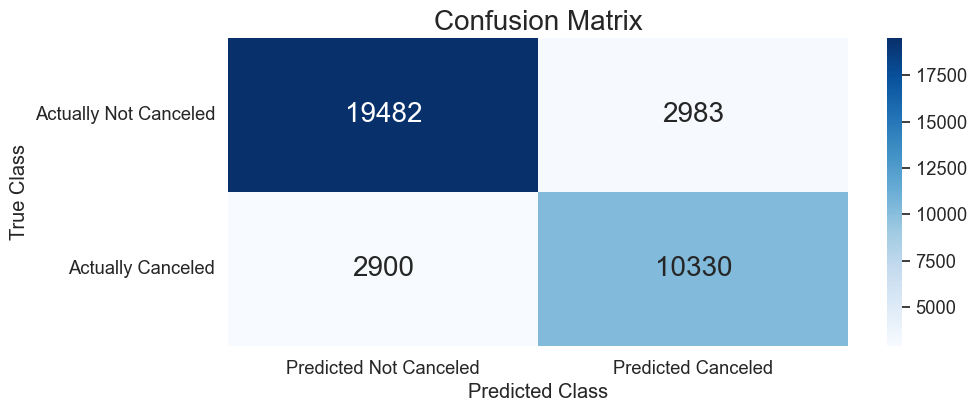

time: 625 ms (started: 2023-11-29 20:38:41 -06:00)


In [314]:
show_cmatrix(y_test, y_pred)


Best Parameters:  {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 10}
Best Model Accuracy: 0.84


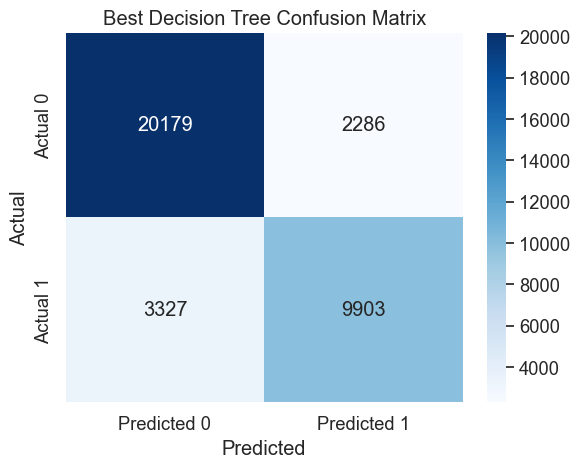

time: 2min 44s (started: 2023-11-29 20:38:46 -06:00)


In [315]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'max_depth': [None, 10, 20, 30],  # Adjust as needed
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a Decision Tree classifier
tree_model = DecisionTreeClassifier(random_state=42)

# Create GridSearchCV object
grid_search = GridSearchCV(tree_model, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters
print("Best Parameters: ", grid_search.best_params_)

# Get the best model
best_tree_model = grid_search.best_estimator_

# Make predictions using the best model
y_pred_best_tree = best_tree_model.predict(X_test)

# Evaluate the best model
accuracy_best_tree = accuracy_score(y_test, y_pred_best_tree)
print(f'Best Model Accuracy: {accuracy_best_tree:.2f}')

# Display the updated confusion matrix
conf_matrix_best_tree = confusion_matrix(y_test, y_pred_best_tree)
sns.heatmap(conf_matrix_best_tree, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Best Decision Tree Confusion Matrix')
plt.show()


In [316]:
#KNN Model 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

time: 0 ns (started: 2023-11-29 20:42:52 -06:00)


In [317]:
X = df_clean[['is_repeated_guest', 'previous_cancellations', 'booking_changes', 'lead_time_norm', 'adr_norm',
       'required_car_parking_spaces_norm', 'total_of_special_requests_norm',
       'total_stays_norm', 'total_guests_norm', 'agent', 'company',
       'hotel_CityHotel', 'hotel_ResortHotel', 'meal_BB', 'meal_FB', 'meal_HB', 'meal_SC',
       'meal_Undefined', 'market_segment_Aviation',
       'market_segment_Complementary', 'market_segment_Corporate',
       'market_segment_Direct', 'market_segment_Groups',
       'market_segment_OfflineTATO', 'market_segment_OnlineTA',
       'distribution_channel_Corporate', 'distribution_channel_Direct',
       'distribution_channel_GDS', 'distribution_channel_TATO',
       'distribution_channel_Undefined',
       'deposit_type_NoDeposit', 'deposit_type_NonRefund',
       'deposit_type_Refundable', 'customer_type_Contract',
       'customer_type_Group', 'customer_type_Transient',
       'customer_type_Transient-Party', 'guest_location_International',
       'guest_location_Local']]
y = df_clean['is_canceled']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features (important for KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

time: 485 ms (started: 2023-11-29 20:42:55 -06:00)


In [318]:
#Training the Model
k_value = 5  # You can choose a different value for k
knn_model = KNeighborsClassifier(n_neighbors=k_value)
knn_model.fit(X_train_scaled, y_train)

KNeighborsClassifier()

time: 32 ms (started: 2023-11-29 20:42:59 -06:00)


In [319]:
#Making Preeictions
y_pred_knn = knn_model.predict(X_test_scaled)

time: 24.8 s (started: 2023-11-29 20:43:02 -06:00)


Accuracy: 0.84
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.90      0.88     22465
           1       0.81      0.75      0.78     13230

    accuracy                           0.84     35695
   macro avg       0.84      0.82      0.83     35695
weighted avg       0.84      0.84      0.84     35695



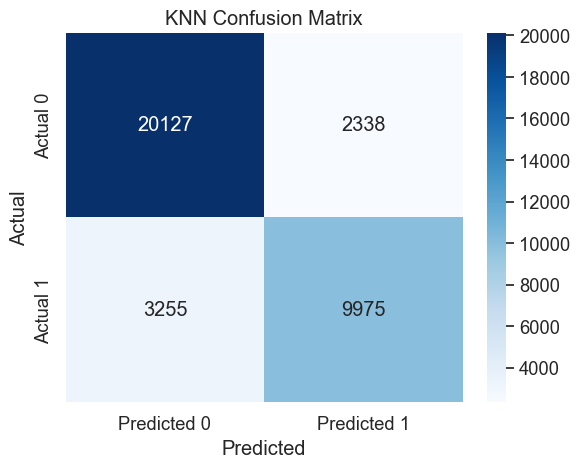

time: 312 ms (started: 2023-11-28 17:37:23 -06:00)


In [170]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred_knn)
print(f'Accuracy: {accuracy:.2f}')

# Classification Report
print('Classification Report:\n', classification_report(y_test, y_pred_knn))

# Confusion Matrix
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('KNN Confusion Matrix')
plt.show()

Best Parameters:  {'n_neighbors': 9}
Best Model Accuracy: 0.85


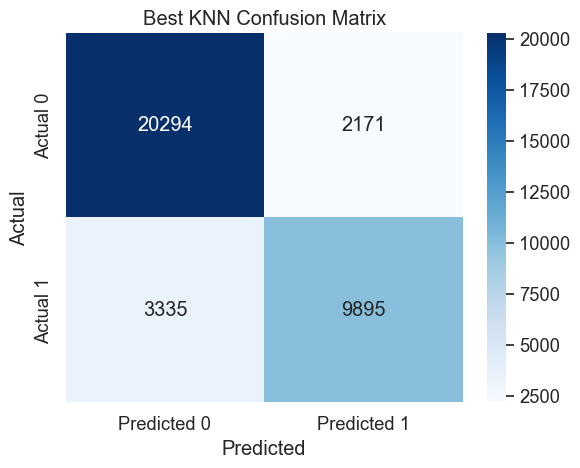

time: 3min 59s (started: 2023-11-29 20:44:18 -06:00)


In [320]:
#TUNED KNN MODEL
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {'n_neighbors': [3, 5, 7, 9, 11]}  # You can expand this range based on your requirements

# Create a KNN classifier
knn_model = KNeighborsClassifier()

# Create GridSearchCV object
grid_search = GridSearchCV(knn_model, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train_scaled, y_train)

# Print the best parameters
print("Best Parameters: ", grid_search.best_params_)

# Get the best model
best_knn_model = grid_search.best_estimator_

# Make predictions using the best model
y_pred_best_knn = best_knn_model.predict(X_test_scaled)

# Evaluate the best model
accuracy_best = accuracy_score(y_test, y_pred_best_knn)
print(f'Best Model Accuracy: {accuracy_best:.2f}')

# Display the updated confusion matrix
conf_matrix_best_knn = confusion_matrix(y_test, y_pred_best_knn)
sns.heatmap(conf_matrix_best_knn, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Best KNN Confusion Matrix')
plt.show()


In [321]:
#Random Forrest
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)  # Adjust hyperparameters as needed

# Train the model on the training data
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

time: 31.7 s (started: 2023-11-29 20:48:31 -06:00)


In [322]:
# Use the trained model to make predictions on the test data
y_pred_rf = rf_model.predict(X_test)

time: 2.28 s (started: 2023-11-29 20:49:10 -06:00)


Accuracy: 0.87
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.91      0.90     22465
           1       0.84      0.79      0.81     13230

    accuracy                           0.87     35695
   macro avg       0.86      0.85      0.85     35695
weighted avg       0.87      0.87      0.87     35695



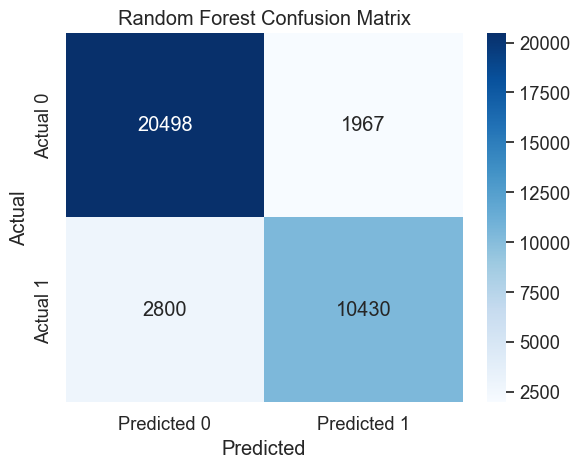

time: 625 ms (started: 2023-11-29 20:49:27 -06:00)


In [324]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Evaluate accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Accuracy: {accuracy_rf:.2f}')

# Display classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))

# Display confusion matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest Confusion Matrix')
plt.show()

In [140]:
pip install xgboost

  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/bc/43/242432efc3f60052a4a534dc4926b21e236ab4ec8d4920c593da3f65c65d/xgboost-2.0.2-py3-none-win_amd64.whl.metadata
  Using cached xgboost-2.0.2-py3-none-win_amd64.whl.metadata (2.0 kB)
Using cached xgboost-2.0.2-py3-none-win_amd64.whl (99.8 MB)
Note: you may need to restart the kernel to use updated packages.
time: 7.62 s (started: 2023-11-29 23:51:46 -06:00)


In [141]:
#XG Boost
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


time: 32 ms (started: 2023-11-29 23:52:00 -06:00)


In [142]:
from xgboost import XGBClassifier
import xgboost as xgb

model = xgb.XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

time: 1.19 s (started: 2023-11-29 23:52:05 -06:00)


In [143]:
y_pred = model.predict(X_test)

time: 78 ms (started: 2023-11-29 23:52:09 -06:00)


Accuracy: 0.8606967264781274
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.92      0.89     14956
           1       0.85      0.76      0.80      8841

    accuracy                           0.86     23797
   macro avg       0.86      0.84      0.85     23797
weighted avg       0.86      0.86      0.86     23797

Confusion Matrix:
[[13722  1234]
 [ 2081  6760]]


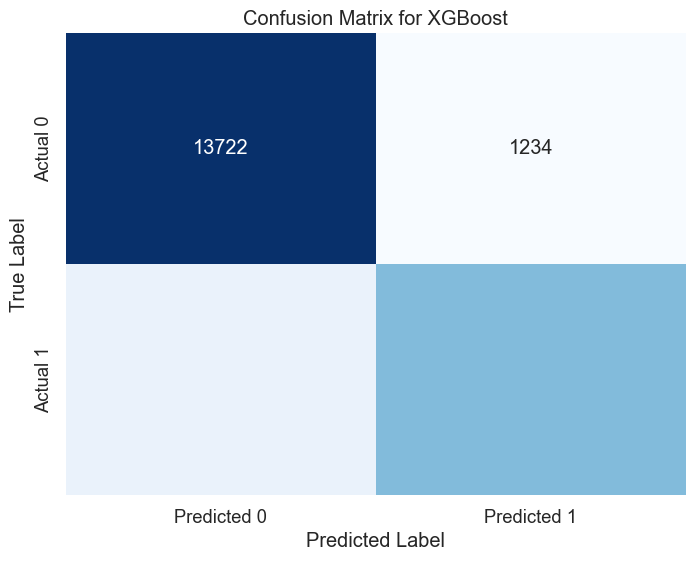

time: 172 ms (started: 2023-11-29 23:52:15 -06:00)


In [144]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Display the confusion matrix as a heatmap
cm_xgb = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_xgb, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Predicted 0", "Predicted 1"],
            yticklabels=["Actual 0", "Actual 1"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for XGBoost")
plt.show()

In [145]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
print("Cross-Validation Accuracy:", scores.mean())

Cross-Validation Accuracy: 0.7533560244216446
time: 5.05 s (started: 2023-11-29 23:52:41 -06:00)


In [146]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators': [100, 200, 300], 'max_depth': [3, 5, 7]}
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_

time: 1min 1s (started: 2023-11-29 23:52:49 -06:00)


In [147]:
feature_importance = model.feature_importances_


time: 0 ns (started: 2023-11-29 23:53:55 -06:00)


In [148]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

# Define the parameter grid
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
}

# Create an XGBoost classifier
xgb_model = XGBClassifier()

# Instantiate GridSearchCV
grid_search = GridSearchCV(
    xgb_model,
    param_grid,
    scoring='accuracy',  # Use an appropriate scoring metric
    cv=5,  # Number of cross-validation folds
    verbose=2,
    n_jobs=-1,  # Use all available CPU cores
)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Get the best model
best_model = grid_search.best_estimator_

# Evaluate the best model on the test set
accuracy = best_model.score(X_test, y_test)
print("Test Accuracy:", accuracy)


Fitting 5 folds for each of 729 candidates, totalling 3645 fits
Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 300, 'subsample': 1.0}
Test Accuracy: 0.8615371685506577
time: 16h 53min 11s (started: 2023-11-29 23:53:58 -06:00)
